In [5]:
import json
import yfinance as yf
import pandas as pd
import finnhub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_json('nsdq_ticks_copy.json')

tickers_nsdq = pd.DataFrame(data)
nsdq_symbols_list = tickers_nsdq['symbol'].tolist()

In [7]:
tickers_nsdq.head()

,symbol,name,lastsale,netchange,pctchange,volume,marketCap,country,ipoyear,industry,sector,url
0,AACG,ATA Creativity Global American Depositary Shares,$0.855,-0.025,-2.841%,25062,27360111,China,2008,Other Consumer Services,Real Estate,/market-activity/stocks/aacg
1,AADI,Aadi Bioscience Inc. Common Stock,$1.94,0.020,1.042%,54737,47752778,United States,,Biotechnology: Pharmaceutical Preparations,Health Care,/market-activity/stocks/aadi
2,AAL,American Airlines Group Inc. Common Stock,$11.51,0.690,6.377%,53707400,7558662039,United States,,Air Freight/Delivery Services,Consumer Discretionary,/market-activity/stocks/aal
3,AAME,Atlantic American Corporation Common Stock,$1.625,-0.035,-2.108%,4821,33149607,United States,,Life Insurance,Finance,/market-activity/stocks/aame
4,AAOI,Applied Optoelectronics Inc. Common Stock,$15.36,1.165,8.207%,2484399,628158182,United States,2013,Semiconductors,Technology,/market-activity/stocks/aaoi


In [8]:
def get_tickers():
    tickers = nsdq_symbols_list
    return tickers  

In [9]:
def get_earnings_and_prices(ticker, year=2023, days_before=1, days_after=1):
    stock = yf.Ticker(ticker)

    try:
        earnings = stock.earnings_dates
        if earnings.empty:
            print(f"No earnings data found for {ticker}")
            return []  
    except Exception as e:
        print(f"Error fetching earnings for {ticker}: {e}")
        return []  

    earnings = earnings[earnings.index.year == year]

    stock_data = []

    for earnings_date in earnings.index:
        start_date = earnings_date - pd.Timedelta(days=days_before)
        end_date = earnings_date + pd.Timedelta(days=days_after)

        try:
            stock_prices = stock.history(start=start_date, end=end_date)
            closing_price_before = stock_prices['Close'].iloc[0] if len(stock_prices) > 0 else None
            closing_price_after = stock_prices['Close'].iloc[-1] if len(stock_prices) > 0 else None
        except Exception as e:
            print(f"Error fetching prices for {ticker} around {earnings_date}: {e}")
            closing_price_before, closing_price_after = None, None

        stock_data.append({
            'ticker': ticker,
            'earnings_date': earnings_date.date(),
            'closing_price_before': closing_price_before,
            'closing_price_after': closing_price_after
        })

    return stock_data

In [10]:
def extract_earnings_data():
    tickers = get_tickers()  
    all_stock_data = []

    for ticker in tickers:
        print(f"Processing {ticker}...")
        stock_data = get_earnings_and_prices(ticker)
        all_stock_data.extend(stock_data)

    df = pd.DataFrame(all_stock_data)
    return df

df_earnings_data = extract_earnings_data()

df_earnings_data['net_margin'] = df_earnings_data['closing_price_after'] - df_earnings_data['closing_price_before']

df_earnings_data

Processing AACG...
Processing AADI...
Processing AAL...
Processing AAME...
Processing AAOI...
Processing AAON...
Processing AAPL...
Processing ABAT...
Processing ABCL...
Processing ABEO...
Processing ABL...
Processing ABLLL...
Processing ABLLW...


ABLLW: No earnings dates found, symbol may be delisted


Error fetching earnings for ABLLW: 'NoneType' object has no attribute 'empty'
Processing ABLV...


ABLV: No earnings dates found, symbol may be delisted


Error fetching earnings for ABLV: 'NoneType' object has no attribute 'empty'
Processing ABNB...
Processing ABOS...
Processing ABSI...
Processing ABTS...


ABTS: No earnings dates found, symbol may be delisted


Error fetching earnings for ABTS: 'NoneType' object has no attribute 'empty'
Processing ABUS...
Processing ABVC...
Processing ABVE...


ABVE: No earnings dates found, symbol may be delisted


Error fetching earnings for ABVE: 'NoneType' object has no attribute 'empty'
Processing ABVEW...


ABVEW: No earnings dates found, symbol may be delisted


Error fetching earnings for ABVEW: 'NoneType' object has no attribute 'empty'
Processing ABVX...
Processing ACAB...


ACAB: No earnings dates found, symbol may be delisted


Error fetching earnings for ACAB: 'NoneType' object has no attribute 'empty'
Processing ACAD...
Processing ACB...
Processing ACCD...
Processing ACDC...
Processing ACET...
Processing ACGL...
Processing ACGLN...
Processing ACGLO...
Processing ACHC...
Processing ACHL...
Processing ACHV...
Processing ACIC...
Processing ACIU...
Processing ACIW...
Processing ACLS...
Processing ACLX...
Processing ACMR...
Processing ACNB...
Processing ACNT...
Processing ACON...
Processing ACONW...


ACONW: No earnings dates found, symbol may be delisted


Error fetching earnings for ACONW: 'NoneType' object has no attribute 'empty'
Processing ACRS...
Processing ACRV...
Processing ACST...
Processing ACT...
Processing ACTG...
Processing ACTU...


ACTU: No earnings dates found, symbol may be delisted


Error fetching earnings for ACTU: 'NoneType' object has no attribute 'empty'
Processing ACVA...
Processing ACXP...
Processing ADAG...
Processing ADAP...
Processing ADBE...
Processing ADD...
Processing ADEA...
Processing ADGM...


ADGM: No earnings dates found, symbol may be delisted


Error fetching earnings for ADGM: 'NoneType' object has no attribute 'empty'
Processing ADI...
Processing ADIL...
Processing ADMA...
Processing ADN...
Processing ADNWW...


ADNWW: No earnings dates found, symbol may be delisted


Error fetching earnings for ADNWW: 'NoneType' object has no attribute 'empty'
Processing ADP...
Processing ADPT...
Processing ADSE...
Processing ADSEW...


ADSEW: No earnings dates found, symbol may be delisted


Error fetching earnings for ADSEW: 'NoneType' object has no attribute 'empty'
Processing ADSK...
Processing ADTN...
Processing ADTX...
Processing ADUS...
Processing ADV...
Processing ADVM...
Processing ADVWW...


ADVWW: No earnings dates found, symbol may be delisted


Error fetching earnings for ADVWW: 'NoneType' object has no attribute 'empty'
Processing ADXN...
Processing AEAEW...


AEAEW: No earnings dates found, symbol may be delisted


Error fetching earnings for AEAEW: 'NoneType' object has no attribute 'empty'
Processing AEHL...
Processing AEHR...
Processing AEI...


AEI: No earnings dates found, symbol may be delisted


Error fetching earnings for AEI: 'NoneType' object has no attribute 'empty'
Processing AEIS...
Processing AEMD...
Processing AENT...
Processing AENTW...


AENTW: No earnings dates found, symbol may be delisted


Error fetching earnings for AENTW: 'NoneType' object has no attribute 'empty'
Processing AEP...
Processing AERT...


AERT: No earnings dates found, symbol may be delisted


Error fetching earnings for AERT: 'NoneType' object has no attribute 'empty'
Processing AERTW...


AERTW: No earnings dates found, symbol may be delisted


Error fetching earnings for AERTW: 'NoneType' object has no attribute 'empty'
Processing AEYE...
Processing AFBI...
Processing AFCG...
Processing AFJK...


AFJK: No earnings dates found, symbol may be delisted


Error fetching earnings for AFJK: 'NoneType' object has no attribute 'empty'
Processing AFJKU...


AFJKU: No earnings dates found, symbol may be delisted


Error fetching earnings for AFJKU: 'NoneType' object has no attribute 'empty'
Processing AFMD...
Processing AFRI...


AFRI: No earnings dates found, symbol may be delisted


Error fetching earnings for AFRI: 'NoneType' object has no attribute 'empty'
Processing AFRIW...


AFRIW: No earnings dates found, symbol may be delisted


Error fetching earnings for AFRIW: 'NoneType' object has no attribute 'empty'
Processing AFRM...
Processing AFYA...
Processing AGAE...
Processing AGBA...
Processing AGBAW...


AGBAW: No earnings dates found, symbol may be delisted


Error fetching earnings for AGBAW: 'NoneType' object has no attribute 'empty'
Processing AGEN...
Processing AGFY...
Processing AGIO...
Processing AGMH...


AGMH: No earnings dates found, symbol may be delisted


Error fetching earnings for AGMH: 'NoneType' object has no attribute 'empty'
Processing AGNC...
Processing AGNCL...
Processing AGNCM...
Processing AGNCN...
Processing AGNCO...
Processing AGNCP...
Processing AGRI...
Processing AGYS...
Processing AHCO...
Processing AHG...
Processing AIEV...


AIEV: No earnings dates found, symbol may be delisted


Error fetching earnings for AIEV: 'NoneType' object has no attribute 'empty'
Processing AIFF...


AIFF: No earnings dates found, symbol may be delisted


Error fetching earnings for AIFF: 'NoneType' object has no attribute 'empty'
Processing AIHS...
Processing AILE...
Processing AILEW...


AILEW: No earnings dates found, symbol may be delisted


Error fetching earnings for AILEW: 'NoneType' object has no attribute 'empty'
Processing AIMAU...


AIMAU: No earnings dates found, symbol may be delisted


Error fetching earnings for AIMAU: 'NoneType' object has no attribute 'empty'
Processing AIMD...
Processing AIOT...
Processing AIP...
Processing AIRE...


AIRE: No earnings dates found, symbol may be delisted


Error fetching earnings for AIRE: 'NoneType' object has no attribute 'empty'
Processing AIRG...
Processing AIRJ...


AIRJ: No earnings dates found, symbol may be delisted


Error fetching earnings for AIRJ: 'NoneType' object has no attribute 'empty'
Processing AIRJW...


AIRJW: No earnings dates found, symbol may be delisted


Error fetching earnings for AIRJW: 'NoneType' object has no attribute 'empty'
Processing AIRS...
Processing AIRT...
Processing AIRTP...


AIRTP: No earnings dates found, symbol may be delisted


Error fetching earnings for AIRTP: 'NoneType' object has no attribute 'empty'
Processing AISP...
Processing AISPW...


AISPW: No earnings dates found, symbol may be delisted


Error fetching earnings for AISPW: 'NoneType' object has no attribute 'empty'
Processing AITR...


AITR: No earnings dates found, symbol may be delisted


Error fetching earnings for AITR: 'NoneType' object has no attribute 'empty'
Processing AITRU...


AITRU: No earnings dates found, symbol may be delisted


Error fetching earnings for AITRU: 'NoneType' object has no attribute 'empty'
Processing AIXI...
Error fetching earnings for AIXI: 'Earnings Date'
Processing AKAM...
Error fetching earnings for AKAM: 'Earnings Date'
Processing AKAN...
Error fetching earnings for AKAN: 'Earnings Date'
Processing AKBA...
Error fetching earnings for AKBA: 'Earnings Date'
Processing AKRO...
Error fetching earnings for AKRO: 'Earnings Date'
Processing AKTS...
Error fetching earnings for AKTS: 'Earnings Date'
Processing AKTX...
Error fetching earnings for AKTX: 'Earnings Date'
Processing AKYA...
Error fetching earnings for AKYA: 'Earnings Date'
Processing ALAB...
Error fetching earnings for ALAB: 'Earnings Date'
Processing ALAR...
Error fetching earnings for ALAR: 'Earnings Date'
Processing ALBT...
Error fetching earnings for ALBT: 'Earnings Date'
Processing ALCE...
Error fetching earnings for ALCE: 'Earnings Date'
Processing ALCO...
Error fetching earnings for ALCO: 'Earnings Date'
Processing ALCY...
Error 

ALSA: No earnings dates found, symbol may be delisted


Error fetching earnings for ALSA: 'NoneType' object has no attribute 'empty'
Processing ALT...
Processing ALTI...
Processing ALTO...
Processing ALTR...
Processing ALTS...
Processing ALVO...
Processing ALVOW...


ALVOW: No earnings dates found, symbol may be delisted


Error fetching earnings for ALVOW: 'NoneType' object has no attribute 'empty'
Processing ALVR...
Processing ALXO...
Processing ALZN...
Processing AMAL...
Processing AMAT...
Processing AMBA...
Processing AMCX...
Processing AMD...
Processing AMED...
Processing AMGN...
Error fetching earnings for AMGN: 'Earnings Date'
Processing AMIX...
Error fetching earnings for AMIX: 'Earnings Date'
Processing AMKR...
Error fetching earnings for AMKR: 'Earnings Date'
Processing AMLI...
Error fetching earnings for AMLI: 'Earnings Date'
Processing AMLX...
Error fetching earnings for AMLX: 'Earnings Date'
Processing AMPG...
Error fetching earnings for AMPG: 'Earnings Date'
Processing AMPH...
Error fetching earnings for AMPH: 'Earnings Date'
Processing AMPL...
Error fetching earnings for AMPL: 'Earnings Date'
Processing AMRK...
Error fetching earnings for AMRK: 'Earnings Date'
Processing AMRN...
Error fetching earnings for AMRN: 'Earnings Date'
Processing AMRX...
Error fetching earnings for AMRX: 'Earnings

ANSC: No earnings dates found, symbol may be delisted


Error fetching earnings for ANSC: 'NoneType' object has no attribute 'empty'
Processing ANSCU...


ANSCU: No earnings dates found, symbol may be delisted


Error fetching earnings for ANSCU: 'NoneType' object has no attribute 'empty'
Processing ANSCW...


ANSCW: No earnings dates found, symbol may be delisted


Error fetching earnings for ANSCW: 'NoneType' object has no attribute 'empty'
Processing ANSS...
Processing ANTE...
Processing ANTX...
Processing ANY...
Processing AOSL...
Processing AOUT...
Processing APA...
Processing APCX...
Processing APCXW...


APCXW: No earnings dates found, symbol may be delisted


Error fetching earnings for APCXW: 'NoneType' object has no attribute 'empty'
Processing APDN...
Processing APEI...
Processing APGE...
Processing API...
Processing APLD...
Processing APLM...
Processing APLMW...


APLMW: No earnings dates found, symbol may be delisted


Error fetching earnings for APLMW: 'NoneType' object has no attribute 'empty'
Processing APLS...
Processing APLT...
Processing APM...
Processing APOG...
Processing APP...
Processing APPF...
Processing APPN...
Processing APPS...
Processing APRE...
Processing APTO...
Error fetching earnings for APTO: 'Earnings Date'
Processing APVO...
Error fetching earnings for APVO: 'Earnings Date'
Processing APWC...
Error fetching earnings for APWC: 'Earnings Date'
Processing APXI...
Error fetching earnings for APXI: 'Earnings Date'
Processing APYX...
Error fetching earnings for APYX: 'Earnings Date'
Processing AQB...
Error fetching earnings for AQB: 'Earnings Date'
Processing AQMS...
Error fetching earnings for AQMS: 'Earnings Date'
Processing AQST...
Error fetching earnings for AQST: 'Earnings Date'
Processing AQU...
Error fetching earnings for AQU: 'Earnings Date'
Processing ARAY...
Error fetching earnings for ARAY: 'Earnings Date'
Processing ARBB...
Error fetching earnings for ARBB: 'Earnings Date

ARKOW: No earnings dates found, symbol may be delisted


Error fetching earnings for ARKOW: 'NoneType' object has no attribute 'empty'
Processing ARKR...
Processing ARLP...
Processing ARM...
Processing AROW...
Processing ARQ...
Processing ARQQ...
Processing ARQQW...


ARQQW: No earnings dates found, symbol may be delisted


Error fetching earnings for ARQQW: 'NoneType' object has no attribute 'empty'
Processing ARQT...
Processing ARRY...
Processing ARTL...
Processing ARTNA...
Processing ARTV...
Processing ARTW...
Processing ARVN...
Processing ARWR...
Processing ASLE...
Processing ASMB...
Processing ASML...
Processing ASND...
Processing ASNS...
Processing ASO...
Processing ASPI...
Processing ASPS...
Processing ASRT...
Processing ASRV...
Processing ASST...


ASST: No earnings dates found, symbol may be delisted


Error fetching earnings for ASST: 'NoneType' object has no attribute 'empty'
Processing ASTC...
Processing ASTE...
Processing ASTH...
Processing ASTI...
Processing ASTL...
Processing ASTLW...
Error fetching earnings for ASTLW: 'Earnings Date'
Processing ASTS...
Error fetching earnings for ASTS: 'Earnings Date'
Processing ASUR...
Error fetching earnings for ASUR: 'Earnings Date'
Processing ASYS...
Error fetching earnings for ASYS: 'Earnings Date'
Processing ATAI...
Error fetching earnings for ATAI: 'Earnings Date'
Processing ATAT...
Error fetching earnings for ATAT: 'Earnings Date'
Processing ATCOL...
Error fetching earnings for ATCOL: 'Earnings Date'
Processing ATEC...
Error fetching earnings for ATEC: 'Earnings Date'
Processing ATER...
Error fetching earnings for ATER: 'Earnings Date'
Processing ATEX...
Error fetching earnings for ATEX: 'Earnings Date'
Processing ATGL...
Error fetching earnings for ATGL: 'Earnings Date'
Processing ATHA...
Error fetching earnings for ATHA: 'Earnings Da

ATMCU: No earnings dates found, symbol may be delisted


Error fetching earnings for ATMCU: 'NoneType' object has no attribute 'empty'
Processing ATMV...


ATMV: No earnings dates found, symbol may be delisted


Error fetching earnings for ATMV: 'NoneType' object has no attribute 'empty'
Processing ATMVR...


ATMVR: No earnings dates found, symbol may be delisted


Error fetching earnings for ATMVR: 'NoneType' object has no attribute 'empty'
Processing ATNF...
Processing ATNFW...


ATNFW: No earnings dates found, symbol may be delisted


Error fetching earnings for ATNFW: 'NoneType' object has no attribute 'empty'
Processing ATNI...
Processing ATOM...
Processing ATOS...
Processing ATPC...
Processing ATRA...
Processing ATRC...
Processing ATRO...
Processing ATSG...
Processing ATXG...
Processing ATXI...
Processing ATXS...
Processing ATYR...
Processing AUBN...
Processing AUDC...
Processing AUID...
Processing AUPH...
Processing AUR...
Processing AURA...
Processing AUROW...


AUROW: No earnings dates found, symbol may be delisted


Error fetching earnings for AUROW: 'NoneType' object has no attribute 'empty'
Processing AUTL...
Processing AUUD...
Processing AUUDW...


AUUDW: No earnings dates found, symbol may be delisted


Error fetching earnings for AUUDW: 'NoneType' object has no attribute 'empty'
Processing AVAH...
Processing AVAV...
Processing AVBP...
Processing AVDL...
Processing AVDX...
Processing AVGO...
Processing AVGR...
Processing AVIR...
Processing AVNW...
Error fetching earnings for AVNW: 'Earnings Date'
Processing AVO...
Error fetching earnings for AVO: 'Earnings Date'
Processing AVPT...
Error fetching earnings for AVPT: 'Earnings Date'
Processing AVPTW...
Error fetching earnings for AVPTW: 'Earnings Date'
Processing AVT...
Error fetching earnings for AVT: 'Earnings Date'
Processing AVTE...
Error fetching earnings for AVTE: 'Earnings Date'
Processing AVTX...
Error fetching earnings for AVTX: 'Earnings Date'
Processing AVXL...
Error fetching earnings for AVXL: 'Earnings Date'
Processing AWH...
Error fetching earnings for AWH: 'Earnings Date'
Processing AWRE...
Error fetching earnings for AWRE: 'Earnings Date'
Processing AXDX...
Error fetching earnings for AXDX: 'Earnings Date'
Processing AXGN

BAERW: No earnings dates found, symbol may be delisted


Error fetching earnings for BAERW: 'NoneType' object has no attribute 'empty'
Processing BAFN...


BAFN: No earnings dates found, symbol may be delisted


Error fetching earnings for BAFN: 'NoneType' object has no attribute 'empty'
Processing BAND...
Processing BANF...
Processing BANFP...


BANFP: No earnings dates found, symbol may be delisted


Error fetching earnings for BANFP: 'NoneType' object has no attribute 'empty'
Processing BANL...


BANL: No earnings dates found, symbol may be delisted


Error fetching earnings for BANL: 'NoneType' object has no attribute 'empty'
Processing BANR...
Processing BANX...
Processing BAOS...


BAOS: No earnings dates found, symbol may be delisted


Error fetching earnings for BAOS: 'NoneType' object has no attribute 'empty'
Processing BASE...
Processing BATRA...
Processing BATRK...
Processing BAYA...


BAYA: No earnings dates found, symbol may be delisted


Error fetching earnings for BAYA: 'NoneType' object has no attribute 'empty'
Processing BAYAR...


BAYAR: No earnings dates found, symbol may be delisted


Error fetching earnings for BAYAR: 'NoneType' object has no attribute 'empty'
Processing BBCP...
Processing BBGI...
Processing BBIO...
Processing BBLG...
Processing BBSI...
Processing BCAB...
Processing BCAL...
Processing BCAN...
Processing BCAX...
Processing BCBP...
Processing BCDA...
Processing BCG...


BCG: No earnings dates found, symbol may be delisted


Error fetching earnings for BCG: 'NoneType' object has no attribute 'empty'
Processing BCLI...
Processing BCML...
Processing BCOV...
Processing BCOW...
Processing BCPC...
Processing BCRX...
Processing BCSA...
Error fetching earnings for BCSA: 'Earnings Date'
Processing BCSAU...
Error fetching earnings for BCSAU: 'Earnings Date'
Processing BCSAW...
Error fetching earnings for BCSAW: 'Earnings Date'
Processing BCTX...
Error fetching earnings for BCTX: 'Earnings Date'
Processing BCTXW...
Error fetching earnings for BCTXW: 'Earnings Date'
Processing BCYC...
Error fetching earnings for BCYC: 'Earnings Date'
Processing BDMD...
Error fetching earnings for BDMD: 'Earnings Date'
Processing BDMDW...
Error fetching earnings for BDMDW: 'Earnings Date'
Processing BDRX...
Error fetching earnings for BDRX: 'Earnings Date'
Processing BDSX...
Error fetching earnings for BDSX: 'Earnings Date'
Processing BDTX...
Error fetching earnings for BDTX: 'Earnings Date'
Processing BEAM...
Error fetching earnings 

BFRG: No earnings dates found, symbol may be delisted


Error fetching earnings for BFRG: 'NoneType' object has no attribute 'empty'
Processing BFRGW...


BFRGW: No earnings dates found, symbol may be delisted


Error fetching earnings for BFRGW: 'NoneType' object has no attribute 'empty'
Processing BFRI...
Processing BFRIW...


BFRIW: No earnings dates found, symbol may be delisted


Error fetching earnings for BFRIW: 'NoneType' object has no attribute 'empty'
Processing BFST...
Processing BGC...
Processing BGFV...
Processing BGLC...


BGLC: No earnings dates found, symbol may be delisted


Error fetching earnings for BGLC: 'NoneType' object has no attribute 'empty'
Processing BGM...


BGM: No earnings dates found, symbol may be delisted


Error fetching earnings for BGM: 'NoneType' object has no attribute 'empty'
Processing BGNE...
Processing BHACW...


BHACW: No earnings dates found, symbol may be delisted


Error fetching earnings for BHACW: 'NoneType' object has no attribute 'empty'
Processing BHAT...


BHAT: No earnings dates found, symbol may be delisted


Error fetching earnings for BHAT: 'NoneType' object has no attribute 'empty'
Processing BHF...
Processing BHFAL...


BHFAL: No earnings dates found, symbol may be delisted


Error fetching earnings for BHFAL: 'NoneType' object has no attribute 'empty'
Processing BHFAM...
Processing BHFAN...
Processing BHFAO...
Processing BHFAP...
Processing BHIL...
Processing BHRB...
Processing BIAF...
Processing BIAFW...


BIAFW: No earnings dates found, symbol may be delisted


Error fetching earnings for BIAFW: 'NoneType' object has no attribute 'empty'
Processing BIDU...
Processing BIGC...
Processing BIIB...
Processing BILI...
Processing BIOA...


BIOA: No earnings dates found, symbol may be delisted


Error fetching earnings for BIOA: 'NoneType' object has no attribute 'empty'
Processing BIOR...
Processing BIOX...
Processing BIRD...
Processing BITF...
Processing BIVI...
Processing BJDX...
Processing BJRI...
Processing BKHA...
Error fetching earnings for BKHA: 'Earnings Date'
Processing BKHAR...
Error fetching earnings for BKHAR: 'Earnings Date'
Processing BKHAU...
Error fetching earnings for BKHAU: 'Earnings Date'
Processing BKNG...
Error fetching earnings for BKNG: 'Earnings Date'
Processing BKR...
Error fetching earnings for BKR: 'Earnings Date'
Processing BKYI...
Error fetching earnings for BKYI: 'Earnings Date'
Processing BL...
Error fetching earnings for BL: 'Earnings Date'
Processing BLAC...
Error fetching earnings for BLAC: 'Earnings Date'
Processing BLBD...
Error fetching earnings for BLBD: 'Earnings Date'
Processing BLBX...
Error fetching earnings for BLBX: 'Earnings Date'
Processing BLDE...
Error fetching earnings for BLDE: 'Earnings Date'
Processing BLDEW...
Error fetchin

BMR: No earnings dates found, symbol may be delisted


Error fetching earnings for BMR: 'NoneType' object has no attribute 'empty'
Processing BMRA...
Processing BMRC...
Processing BMRN...
Processing BNAI...
Processing BNAIW...


BNAIW: No earnings dates found, symbol may be delisted


Error fetching earnings for BNAIW: 'NoneType' object has no attribute 'empty'
Processing BNGO...
Processing BNIX...


BNIX: No earnings dates found, symbol may be delisted


Error fetching earnings for BNIX: 'NoneType' object has no attribute 'empty'
Processing BNIXW...


BNIXW: No earnings dates found, symbol may be delisted


Error fetching earnings for BNIXW: 'NoneType' object has no attribute 'empty'
Processing BNOX...
Processing BNR...
Processing BNRG...


BNRG: No earnings dates found, symbol may be delisted


Error fetching earnings for BNRG: 'NoneType' object has no attribute 'empty'
Processing BNTC...
Processing BNTX...
Processing BNZI...
Processing BNZIW...


BNZIW: No earnings dates found, symbol may be delisted


Error fetching earnings for BNZIW: 'NoneType' object has no attribute 'empty'
Processing BOCN...


BOCN: No earnings dates found, symbol may be delisted


Error fetching earnings for BOCN: 'NoneType' object has no attribute 'empty'
Processing BOF...


BOF: No earnings dates found, symbol may be delisted


Error fetching earnings for BOF: 'NoneType' object has no attribute 'empty'
Processing BOKF...
Processing BOLD...
Processing BOLT...
Processing BON...
Processing BOOM...
Processing BOSC...
Processing BOTJ...
Processing BOWN...


BOWN: No earnings dates found, symbol may be delisted


Error fetching earnings for BOWN: 'NoneType' object has no attribute 'empty'
Processing BOWNR...


BOWNR: No earnings dates found, symbol may be delisted


Error fetching earnings for BOWNR: 'NoneType' object has no attribute 'empty'
Processing BOXL...
Processing BPMC...
Processing BPOP...
Processing BPOPM...


BPOPM: No earnings dates found, symbol may be delisted


Error fetching earnings for BPOPM: 'NoneType' object has no attribute 'empty'
Processing BPRN...
Error fetching earnings for BPRN: 'Earnings Date'
Processing BPTH...
Error fetching earnings for BPTH: 'Earnings Date'
Processing BPYPM...
Error fetching earnings for BPYPM: 'Earnings Date'
Processing BPYPN...
Error fetching earnings for BPYPN: 'Earnings Date'
Processing BPYPO...
Error fetching earnings for BPYPO: 'Earnings Date'
Processing BPYPP...
Error fetching earnings for BPYPP: 'Earnings Date'
Processing BRACR...
Error fetching earnings for BRACR: 'Earnings Date'
Processing BRAG...
Error fetching earnings for BRAG: 'Earnings Date'
Processing BREA...
Error fetching earnings for BREA: 'Earnings Date'
Processing BRFH...
Error fetching earnings for BRFH: 'Earnings Date'
Processing BRID...
Error fetching earnings for BRID: 'Earnings Date'
Processing BRKH...
Error fetching earnings for BRKH: 'Earnings Date'
Processing BRKHW...
Error fetching earnings for BRKHW: 'Earnings Date'
Processing BR

BSIIU: No earnings dates found, symbol may be delisted


Error fetching earnings for BSIIU: 'NoneType' object has no attribute 'empty'
Processing BSLK...


BSLK: No earnings dates found, symbol may be delisted


Error fetching earnings for BSLK: 'NoneType' object has no attribute 'empty'
Processing BSLKW...


BSLKW: No earnings dates found, symbol may be delisted


Error fetching earnings for BSLKW: 'NoneType' object has no attribute 'empty'
Processing BSRR...
Processing BSVN...
Processing BSY...
Processing BTAI...
Processing BTBD...


BTBD: No earnings dates found, symbol may be delisted


Error fetching earnings for BTBD: 'NoneType' object has no attribute 'empty'
Processing BTBDW...


BTBDW: No earnings dates found, symbol may be delisted


Error fetching earnings for BTBDW: 'NoneType' object has no attribute 'empty'
Processing BTBT...
Processing BTCS...
Processing BTCT...
Processing BTCTW...


BTCTW: No earnings dates found, symbol may be delisted


Error fetching earnings for BTCTW: 'NoneType' object has no attribute 'empty'
Processing BTDR...
Processing BTM...
Processing BTMD...
Processing BTMWW...


BTMWW: No earnings dates found, symbol may be delisted


Error fetching earnings for BTMWW: 'NoneType' object has no attribute 'empty'
Processing BTOC...
Processing BTOG...


BTOG: No earnings dates found, symbol may be delisted


Error fetching earnings for BTOG: 'NoneType' object has no attribute 'empty'
Processing BTSG...
Processing BTSGU...
Processing BUJA...


BUJA: No earnings dates found, symbol may be delisted


Error fetching earnings for BUJA: 'NoneType' object has no attribute 'empty'
Processing BUJAU...


BUJAU: No earnings dates found, symbol may be delisted


Error fetching earnings for BUJAU: 'NoneType' object has no attribute 'empty'
Processing BUJAW...


BUJAW: No earnings dates found, symbol may be delisted


Error fetching earnings for BUJAW: 'NoneType' object has no attribute 'empty'
Processing BUSE...
Processing BVFL...


BVFL: No earnings dates found, symbol may be delisted


Error fetching earnings for BVFL: 'NoneType' object has no attribute 'empty'
Processing BVS...
Processing BWAY...
Processing BWB...
Processing BWBBP...
Processing BWEN...
Processing BWFG...
Processing BWIN...
Error fetching earnings for BWIN: 'Earnings Date'
Processing BWMN...
Error fetching earnings for BWMN: 'Earnings Date'
Processing BYFC...
Error fetching earnings for BYFC: 'Earnings Date'
Processing BYND...
Error fetching earnings for BYND: 'Earnings Date'
Processing BYRN...
Error fetching earnings for BYRN: 'Earnings Date'
Processing BYSI...
Error fetching earnings for BYSI: 'Earnings Date'
Processing BZ...
Error fetching earnings for BZ: 'Earnings Date'
Processing BZFD...
Error fetching earnings for BZFD: 'Earnings Date'
Processing BZFDW...
Error fetching earnings for BZFDW: 'Earnings Date'
Processing BZUN...
Error fetching earnings for BZUN: 'Earnings Date'
Processing CAAS...
Error fetching earnings for CAAS: 'Earnings Date'
Processing CABA...
Error fetching earnings for CABA: 

CAPT: No earnings dates found, symbol may be delisted


Error fetching earnings for CAPT: 'NoneType' object has no attribute 'empty'
Processing CAR...
Processing CARA...
Processing CARE...
Processing CARG...
Processing CARM...
Processing CART...
Processing CARV...
Processing CASH...
Processing CASI...
Processing CASS...
Processing CASY...
Processing CATY...
Processing CBAN...
Processing CBAT...
Processing CBFV...
Processing CBNK...
Processing CBRG...


CBRG: No earnings dates found, symbol may be delisted


Error fetching earnings for CBRG: 'NoneType' object has no attribute 'empty'
Processing CBRL...
Processing CBSH...
Processing CBUS...
Processing CCAP...
Processing CCB...
Processing CCBG...
Processing CCCC...
Processing CCCS...
Processing CCD...


CCD: No earnings dates found, symbol may be delisted


Error fetching earnings for CCD: 'NoneType' object has no attribute 'empty'
Processing CCEC...
Processing CCEP...
Processing CCG...
Processing CCIX...


CCIX: No earnings dates found, symbol may be delisted


Error fetching earnings for CCIX: 'NoneType' object has no attribute 'empty'
Processing CCLD...
Processing CCLDO...
Processing CCLDP...
Processing CCNE...
Processing CCNEP...
Error fetching earnings for CCNEP: 'Earnings Date'
Processing CCOI...
Error fetching earnings for CCOI: 'Earnings Date'
Processing CCRN...
Error fetching earnings for CCRN: 'Earnings Date'
Processing CCSI...
Error fetching earnings for CCSI: 'Earnings Date'
Processing CCTG...
Error fetching earnings for CCTG: 'Earnings Date'
Processing CCTS...
Error fetching earnings for CCTS: 'Earnings Date'
Processing CCTSW...
Error fetching earnings for CCTSW: 'Earnings Date'
Processing CDAQ...
Error fetching earnings for CDAQ: 'Earnings Date'
Processing CDAQU...
Error fetching earnings for CDAQU: 'Earnings Date'
Processing CDIO...
Error fetching earnings for CDIO: 'Earnings Date'
Processing CDIOW...
Error fetching earnings for CDIOW: 'Earnings Date'
Processing CDLX...
Error fetching earnings for CDLX: 'Earnings Date'
Processin

CEADW: No earnings dates found, symbol may be delisted


Error fetching earnings for CEADW: 'NoneType' object has no attribute 'empty'
Processing CECO...
Processing CEG...
Processing CELC...
Processing CELH...
Processing CELU...
Processing CELUW...


CELUW: No earnings dates found, symbol may be delisted


Error fetching earnings for CELUW: 'NoneType' object has no attribute 'empty'
Processing CELZ...
Processing CENN...


CENN: No earnings dates found, symbol may be delisted


Error fetching earnings for CENN: 'NoneType' object has no attribute 'empty'
Processing CENT...
Processing CENTA...
Processing CENX...
Processing CEP...


CEP: No earnings dates found, symbol may be delisted


Error fetching earnings for CEP: 'NoneType' object has no attribute 'empty'
Processing CERO...


CERO: No earnings dates found, symbol may be delisted


Error fetching earnings for CERO: 'NoneType' object has no attribute 'empty'
Processing CEROW...


CEROW: No earnings dates found, symbol may be delisted


Error fetching earnings for CEROW: 'NoneType' object has no attribute 'empty'
Processing CERS...
Processing CERT...
Processing CETX...
Processing CETY...
Processing CEVA...
Processing CFB...
Processing CFBK...
Processing CFFI...
Processing CFFN...
Processing CFLT...
Processing CFSB...


CFSB: No earnings dates found, symbol may be delisted


Error fetching earnings for CFSB: 'NoneType' object has no attribute 'empty'
Processing CG...
Processing CGABL...


CGABL: No earnings dates found, symbol may be delisted


Error fetching earnings for CGABL: 'NoneType' object has no attribute 'empty'
Processing CGBD...
Processing CGBDL...


CGBDL: No earnings dates found, symbol may be delisted


Error fetching earnings for CGBDL: 'NoneType' object has no attribute 'empty'
Processing CGBS...


CGBS: No earnings dates found, symbol may be delisted


Error fetching earnings for CGBS: 'NoneType' object has no attribute 'empty'
Processing CGBSW...


CGBSW: No earnings dates found, symbol may be delisted


Error fetching earnings for CGBSW: 'NoneType' object has no attribute 'empty'
Processing CGC...
Error fetching earnings for CGC: 'Earnings Date'
Processing CGEM...
Error fetching earnings for CGEM: 'Earnings Date'
Processing CGEN...
Error fetching earnings for CGEN: 'Earnings Date'
Processing CGNT...
Error fetching earnings for CGNT: 'Earnings Date'
Processing CGNX...
Error fetching earnings for CGNX: 'Earnings Date'
Processing CGO...
Error fetching earnings for CGO: 'Earnings Date'
Processing CGON...
Error fetching earnings for CGON: 'Earnings Date'
Processing CGTX...
Error fetching earnings for CGTX: 'Earnings Date'
Processing CHCI...
Error fetching earnings for CHCI: 'Earnings Date'
Processing CHCO...
Error fetching earnings for CHCO: 'Earnings Date'
Processing CHDN...
Error fetching earnings for CHDN: 'Earnings Date'
Processing CHEF...
Error fetching earnings for CHEF: 'Earnings Date'
Processing CHEK...
Error fetching earnings for CHEK: 'Earnings Date'
Processing CHI...
Error fetch

CHSN: No earnings dates found, symbol may be delisted


Error fetching earnings for CHSN: 'NoneType' object has no attribute 'empty'
Processing CHTR...
Processing CHUY...
Processing CHW...


CHW: No earnings dates found, symbol may be delisted


Error fetching earnings for CHW: 'NoneType' object has no attribute 'empty'
Processing CHX...
Processing CHY...


CHY: No earnings dates found, symbol may be delisted


Error fetching earnings for CHY: 'NoneType' object has no attribute 'empty'
Processing CIFR...
Processing CIFRW...


CIFRW: No earnings dates found, symbol may be delisted


Error fetching earnings for CIFRW: 'NoneType' object has no attribute 'empty'
Processing CIGI...
Processing CINF...
Processing CING...
Processing CINGW...


CINGW: No earnings dates found, symbol may be delisted


Error fetching earnings for CINGW: 'NoneType' object has no attribute 'empty'
Processing CISO...
Processing CISS...


CISS: No earnings dates found, symbol may be delisted


Error fetching earnings for CISS: 'NoneType' object has no attribute 'empty'
Processing CITE...


CITE: No earnings dates found, symbol may be delisted


Error fetching earnings for CITE: 'NoneType' object has no attribute 'empty'
Processing CIVB...
Processing CJET...


CJET: No earnings dates found, symbol may be delisted


Error fetching earnings for CJET: 'NoneType' object has no attribute 'empty'
Processing CJJD...
Processing CKPT...
Processing CLAR...
Processing CLBK...
Processing CLBT...
Processing CLDX...
Processing CLEU...


CLEU: No earnings dates found, symbol may be delisted


Error fetching earnings for CLEU: 'NoneType' object has no attribute 'empty'
Processing CLFD...
Processing CLGN...
Processing CLIR...
Processing CLLS...
Processing CLMB...
Processing CLMT...
Processing CLNE...
Processing CLNN...
Error fetching earnings for CLNN: 'Earnings Date'
Processing CLOV...
Error fetching earnings for CLOV: 'Earnings Date'
Processing CLPS...
Error fetching earnings for CLPS: 'Earnings Date'
Processing CLPT...
Error fetching earnings for CLPT: 'Earnings Date'
Processing CLRB...
Error fetching earnings for CLRB: 'Earnings Date'
Processing CLRC...
Error fetching earnings for CLRC: 'Earnings Date'
Processing CLRCR...
Error fetching earnings for CLRCR: 'Earnings Date'
Processing CLRO...
Error fetching earnings for CLRO: 'Earnings Date'
Processing CLSD...
Error fetching earnings for CLSD: 'Earnings Date'
Processing CLSK...
Error fetching earnings for CLSK: 'Earnings Date'
Processing CLST...
Error fetching earnings for CLST: 'Earnings Date'
Processing CLWT...
Error fetc

CMND: No earnings dates found, symbol may be delisted


Error fetching earnings for CMND: 'NoneType' object has no attribute 'empty'
Processing CMPO...
Processing CMPOW...


CMPOW: No earnings dates found, symbol may be delisted


Error fetching earnings for CMPOW: 'NoneType' object has no attribute 'empty'
Processing CMPR...
Processing CMPS...
Processing CMPX...
Processing CMRX...
Processing CMTL...
Processing CNDT...
Processing CNET...
Processing CNEY...


CNEY: No earnings dates found, symbol may be delisted


Error fetching earnings for CNEY: 'NoneType' object has no attribute 'empty'
Processing CNFR...
Processing CNFRZ...
Processing CNOB...
Processing CNOBP...
Processing CNSL...
Processing CNSP...
Processing CNTA...
Processing CNTB...
Processing CNTM...


CNTM: No earnings dates found, symbol may be delisted


Error fetching earnings for CNTM: 'NoneType' object has no attribute 'empty'
Processing CNTX...
Processing CNTY...
Processing CNVS...
Processing CNXC...
Processing CNXN...
Processing COCH...
Processing COCO...
Processing COCP...
Processing CODA...
Processing CODX...
Processing COEP...
Processing COEPW...


COEPW: No earnings dates found, symbol may be delisted


Error fetching earnings for COEPW: 'NoneType' object has no attribute 'empty'
Processing COFS...
Processing COGT...
Processing COHU...
Processing COIN...
Error fetching earnings for COIN: 'Earnings Date'
Processing COKE...
Error fetching earnings for COKE: 'Earnings Date'
Processing COLB...
Error fetching earnings for COLB: 'Earnings Date'
Processing COLL...
Error fetching earnings for COLL: 'Earnings Date'
Processing COLM...
Error fetching earnings for COLM: 'Earnings Date'
Processing COMM...
Error fetching earnings for COMM: 'Earnings Date'
Processing COO...
Error fetching earnings for COO: 'Earnings Date'
Processing COOP...
Error fetching earnings for COOP: 'Earnings Date'
Processing COOT...
Error fetching earnings for COOT: 'Earnings Date'
Processing COOTW...
Error fetching earnings for COOTW: 'Earnings Date'
Processing CORT...
Error fetching earnings for CORT: 'Earnings Date'
Processing CORZ...
Error fetching earnings for CORZ: 'Earnings Date'
Processing CORZW...
Error fetching ea

CPTNW: No earnings dates found, symbol may be delisted


Error fetching earnings for CPTNW: 'NoneType' object has no attribute 'empty'
Processing CPZ...


CPZ: No earnings dates found, symbol may be delisted


Error fetching earnings for CPZ: 'NoneType' object has no attribute 'empty'
Processing CRAI...
Processing CRBP...
Processing CRBU...
Processing CRCT...
Processing CRDF...
Processing CRDL...
Processing CRDO...
Processing CREG...
Processing CRESW...


CRESW: No earnings dates found, symbol may be delisted


Error fetching earnings for CRESW: 'NoneType' object has no attribute 'empty'
Processing CRESY...
Processing CREV...


CREV: No earnings dates found, symbol may be delisted


Error fetching earnings for CREV: 'NoneType' object has no attribute 'empty'
Processing CREVW...


CREVW: No earnings dates found, symbol may be delisted


Error fetching earnings for CREVW: 'NoneType' object has no attribute 'empty'
Processing CREX...
Processing CRGO...
Processing CRGOW...


CRGOW: No earnings dates found, symbol may be delisted


Error fetching earnings for CRGOW: 'NoneType' object has no attribute 'empty'
Processing CRGX...
Processing CRIS...
Processing CRKN...
Processing CRMD...
Processing CRML...


CRML: No earnings dates found, symbol may be delisted


Error fetching earnings for CRML: 'NoneType' object has no attribute 'empty'
Processing CRMLW...


CRMLW: No earnings dates found, symbol may be delisted


Error fetching earnings for CRMLW: 'NoneType' object has no attribute 'empty'
Processing CRMT...
Processing CRNC...
Processing CRNT...
Processing CRNX...
Processing CRON...
Processing CROX...
Processing CRSP...
Processing CRSR...


CRSR: No earnings dates found, symbol may be delisted


Error fetching earnings for CRSR: 'NoneType' object has no attribute 'empty'
Processing CRTO...
Error fetching earnings for CRTO: 'Earnings Date'
Processing CRUS...
Error fetching earnings for CRUS: 'Earnings Date'
Processing CRVL...
Error fetching earnings for CRVL: 'Earnings Date'
Processing CRVO...
Error fetching earnings for CRVO: 'Earnings Date'
Processing CRVS...
Error fetching earnings for CRVS: 'Earnings Date'
Processing CRWD...
Error fetching earnings for CRWD: 'Earnings Date'
Processing CRWS...
Error fetching earnings for CRWS: 'Earnings Date'
Processing CSBR...
Error fetching earnings for CSBR: 'Earnings Date'
Processing CSCI...
Error fetching earnings for CSCI: 'Earnings Date'
Processing CSCO...
Error fetching earnings for CSCO: 'Earnings Date'
Processing CSGP...
Error fetching earnings for CSGP: 'Earnings Date'
Processing CSGS...
Error fetching earnings for CSGS: 'Earnings Date'
Processing CSIQ...
Error fetching earnings for CSIQ: 'Earnings Date'
Processing CSLMR...
Error 

CTCX: No earnings dates found, symbol may be delisted


Error fetching earnings for CTCX: 'NoneType' object has no attribute 'empty'
Processing CTHR...
Processing CTKB...
Processing CTLP...
Processing CTMX...
Processing CTNM...
Processing CTNT...
Processing CTOR...


CTOR: No earnings dates found, symbol may be delisted


Error fetching earnings for CTOR: 'NoneType' object has no attribute 'empty'
Processing CTRM...
Processing CTRN...
Processing CTSH...
Processing CTSO...
Processing CTXR...
Processing CUB...


CUB: No earnings dates found, symbol may be delisted


Error fetching earnings for CUB: 'NoneType' object has no attribute 'empty'
Processing CUBA...


CUBA: No earnings dates found, symbol may be delisted


Error fetching earnings for CUBA: 'NoneType' object has no attribute 'empty'
Processing CUBWU...


CUBWU: No earnings dates found, symbol may be delisted


Error fetching earnings for CUBWU: 'NoneType' object has no attribute 'empty'
Processing CUBWW...


CUBWW: No earnings dates found, symbol may be delisted


Error fetching earnings for CUBWW: 'NoneType' object has no attribute 'empty'
Processing CUE...
Processing CURI...
Processing CURIW...


CURIW: No earnings dates found, symbol may be delisted


Error fetching earnings for CURIW: 'NoneType' object has no attribute 'empty'
Processing CURR...
Processing CUTR...
Processing CVAC...
Processing CVBF...
Processing CVCO...
Processing CVGI...
Processing CVGW...
Processing CVKD...
Processing CVLT...
Processing CVRX...
Processing CVV...
Processing CWBC...
Error fetching earnings for CWBC: 'Earnings Date'
Processing CWCO...
Error fetching earnings for CWCO: 'Earnings Date'
Processing CWD...
Error fetching earnings for CWD: 'Earnings Date'
Processing CWST...
Error fetching earnings for CWST: 'Earnings Date'
Processing CXAI...
Error fetching earnings for CXAI: 'Earnings Date'
Processing CXAIW...
Error fetching earnings for CXAIW: 'Earnings Date'
Processing CXDO...
Error fetching earnings for CXDO: 'Earnings Date'
Processing CYBR...
Error fetching earnings for CYBR: 'Earnings Date'
Processing CYCC...
Error fetching earnings for CYCC: 'Earnings Date'
Processing CYCCP...
Error fetching earnings for CYCCP: 'Earnings Date'
Processing CYCN...
Err

DATS: No earnings dates found, symbol may be delisted


Error fetching earnings for DATS: 'NoneType' object has no attribute 'empty'
Processing DATSW...


DATSW: No earnings dates found, symbol may be delisted


Error fetching earnings for DATSW: 'NoneType' object has no attribute 'empty'
Processing DAVE...
Processing DAVEW...


DAVEW: No earnings dates found, symbol may be delisted


Error fetching earnings for DAVEW: 'NoneType' object has no attribute 'empty'
Processing DAWN...
Processing DBGI...
Processing DBGIW...


DBGIW: No earnings dates found, symbol may be delisted


Error fetching earnings for DBGIW: 'NoneType' object has no attribute 'empty'
Processing DBVT...
Processing DBX...
Processing DCBO...
Processing DCGO...
Processing DCOM...
Processing DCOMG...
Processing DCOMP...
Processing DCTH...
Processing DDI...
Processing DDOG...
Processing DECA...


DECA: No earnings dates found, symbol may be delisted


Error fetching earnings for DECA: 'NoneType' object has no attribute 'empty'
Processing DENN...
Processing DERM...
Processing DFLI...
Processing DFLIW...


DFLIW: No earnings dates found, symbol may be delisted


Error fetching earnings for DFLIW: 'NoneType' object has no attribute 'empty'
Processing DGHI...
Processing DGICA...
Processing DGICB...
Processing DGII...
Processing DGLY...
Processing DH...
Processing DHAI...


DHAI: No earnings dates found, symbol may be delisted


Error fetching earnings for DHAI: 'NoneType' object has no attribute 'empty'
Processing DHAIW...


DHAIW: No earnings dates found, symbol may be delisted


Error fetching earnings for DHAIW: 'NoneType' object has no attribute 'empty'
Processing DHC...
Error fetching earnings for DHC: 'Earnings Date'
Processing DHCNI...
Error fetching earnings for DHCNI: 'Earnings Date'
Processing DHCNL...
Error fetching earnings for DHCNL: 'Earnings Date'
Processing DHIL...
Error fetching earnings for DHIL: 'Earnings Date'
Processing DIBS...
Error fetching earnings for DIBS: 'Earnings Date'
Processing DIOD...
Error fetching earnings for DIOD: 'Earnings Date'
Processing DIST...
Error fetching earnings for DIST: 'Earnings Date'
Processing DJCO...
Error fetching earnings for DJCO: 'Earnings Date'
Processing DJT...
Error fetching earnings for DJT: 'Earnings Date'
Processing DJTWW...
Error fetching earnings for DJTWW: 'Earnings Date'
Processing DKNG...
Error fetching earnings for DKNG: 'Earnings Date'
Processing DLHC...
Error fetching earnings for DLHC: 'Earnings Date'
Processing DLO...
Error fetching earnings for DLO: 'Earnings Date'
Processing DLPN...
Error 

DPCS: No earnings dates found, symbol may be delisted


Error fetching earnings for DPCS: 'NoneType' object has no attribute 'empty'
Processing DPCSW...


DPCSW: No earnings dates found, symbol may be delisted


Error fetching earnings for DPCSW: 'NoneType' object has no attribute 'empty'
Processing DPRO...
Processing DRCT...
Processing DRIO...
Processing DRMA...
Processing DRMAW...


DRMAW: No earnings dates found, symbol may be delisted


Error fetching earnings for DRMAW: 'NoneType' object has no attribute 'empty'
Processing DRRX...
Processing DRS...
Processing DRTS...
Processing DRUG...
Processing DRVN...
Processing DSGN...
Processing DSGR...
Processing DSGX...
Processing DSP...
Processing DSWL...
Processing DSY...


DSY: No earnings dates found, symbol may be delisted


Error fetching earnings for DSY: 'NoneType' object has no attribute 'empty'
Processing DSYWW...


DSYWW: No earnings dates found, symbol may be delisted


Error fetching earnings for DSYWW: 'NoneType' object has no attribute 'empty'
Processing DTCK...


DTCK: No earnings dates found, symbol may be delisted


Error fetching earnings for DTCK: 'NoneType' object has no attribute 'empty'
Processing DTI...
Processing DTIL...
Processing DTSQ...


DTSQ: No earnings dates found, symbol may be delisted


Error fetching earnings for DTSQ: 'NoneType' object has no attribute 'empty'
Processing DTSQU...


DTSQU: No earnings dates found, symbol may be delisted


Error fetching earnings for DTSQU: 'NoneType' object has no attribute 'empty'
Processing DTSS...
Processing DTST...
Processing DTSTW...


DTSTW: No earnings dates found, symbol may be delisted


Error fetching earnings for DTSTW: 'NoneType' object has no attribute 'empty'
Processing DUET...
Error fetching earnings for DUET: 'Earnings Date'
Processing DUETW...
Error fetching earnings for DUETW: 'Earnings Date'
Processing DUO...
Error fetching earnings for DUO: 'Earnings Date'
Processing DUOL...
Error fetching earnings for DUOL: 'Earnings Date'
Processing DUOT...
Error fetching earnings for DUOT: 'Earnings Date'
Processing DVAX...
Error fetching earnings for DVAX: 'Earnings Date'
Processing DWSN...
Error fetching earnings for DWSN: 'Earnings Date'
Processing DXCM...
Error fetching earnings for DXCM: 'Earnings Date'
Processing DXLG...
Error fetching earnings for DXLG: 'Earnings Date'
Processing DXPE...
Error fetching earnings for DXPE: 'Earnings Date'
Processing DXR...
Error fetching earnings for DXR: 'Earnings Date'
Processing DYAI...
Error fetching earnings for DYAI: 'Earnings Date'
Processing DYCQ...
Error fetching earnings for DYCQ: 'Earnings Date'
Processing DYN...
Error fet

ECDA: No earnings dates found, symbol may be delisted


Error fetching earnings for ECDA: 'NoneType' object has no attribute 'empty'
Processing ECOR...
Processing ECPG...
Processing ECX...
Processing EDAP...
Processing EDBL...
Processing EDBLW...


EDBLW: No earnings dates found, symbol may be delisted


Error fetching earnings for EDBLW: 'NoneType' object has no attribute 'empty'
Processing EDIT...
Processing EDRY...
Processing EDSA...
Processing EDTK...


EDTK: No earnings dates found, symbol may be delisted


Error fetching earnings for EDTK: 'NoneType' object has no attribute 'empty'
Processing EDUC...
Processing EEFT...
Processing EEIQ...
Processing EFOI...
Processing EFSC...
Processing EFSCP...
Processing EGAN...
Processing EGBN...
Processing EGHT...
Processing EH...
Processing EHGO...


EHGO: No earnings dates found, symbol may be delisted


Error fetching earnings for EHGO: 'NoneType' object has no attribute 'empty'
Processing EHTH...
Processing EJH...


EJH: No earnings dates found, symbol may be delisted


Error fetching earnings for EJH: 'NoneType' object has no attribute 'empty'
Processing EKSO...
Processing ELAB...


ELAB: No earnings dates found, symbol may be delisted


Error fetching earnings for ELAB: 'NoneType' object has no attribute 'empty'
Processing ELBM...
Processing ELDN...
Processing ELEV...
Processing ELSE...
Processing ELTK...
Processing ELTX...
Processing ELUT...
Processing ELVA...
Processing ELVN...
Processing ELWS...
Error fetching earnings for ELWS: 'Earnings Date'
Processing EM...
Error fetching earnings for EM: 'Earnings Date'
Processing EMBC...
Error fetching earnings for EMBC: 'Earnings Date'
Processing EMCG...
Error fetching earnings for EMCG: 'Earnings Date'
Processing EMKR...
Error fetching earnings for EMKR: 'Earnings Date'
Processing EML...
Error fetching earnings for EML: 'Earnings Date'
Processing ENG...
Error fetching earnings for ENG: 'Earnings Date'
Processing ENGN...
Error fetching earnings for ENGN: 'Earnings Date'
Processing ENGNW...
Error fetching earnings for ENGNW: 'Earnings Date'
Processing ENLT...
Error fetching earnings for ENLT: 'Earnings Date'
Processing ENLV...
Error fetching earnings for ENLV: 'Earnings Date'

EOSEW: No earnings dates found, symbol may be delisted


Error fetching earnings for EOSEW: 'NoneType' object has no attribute 'empty'
Processing EPIX...
Processing EPOW...


EPOW: No earnings dates found, symbol may be delisted


Error fetching earnings for EPOW: 'NoneType' object has no attribute 'empty'
Processing EPRX...
Processing EPSN...
Processing EQ...
Processing EQIX...
Processing ERAS...
Processing ERIC...
Processing ERIE...
Processing ERII...
Processing ERNA...
Processing ESCA...
Processing ESEA...
Processing ESGL...


ESGL: No earnings dates found, symbol may be delisted


Error fetching earnings for ESGL: 'NoneType' object has no attribute 'empty'
Processing ESGLW...


ESGLW: No earnings dates found, symbol may be delisted


Error fetching earnings for ESGLW: 'NoneType' object has no attribute 'empty'
Processing ESGR...
Processing ESGRO...
Processing ESGRP...
Processing ESHA...


ESHA: No earnings dates found, symbol may be delisted


Error fetching earnings for ESHA: 'NoneType' object has no attribute 'empty'
Processing ESLA...


ESLA: No earnings dates found, symbol may be delisted


Error fetching earnings for ESLA: 'NoneType' object has no attribute 'empty'
Processing ESLAW...


ESLAW: No earnings dates found, symbol may be delisted


Error fetching earnings for ESLAW: 'NoneType' object has no attribute 'empty'
Processing ESLT...
Processing ESOA...
Processing ESPR...
Processing ESQ...
Processing ESSA...
Processing ESTA...
Processing ETHA...


ETHA: No earnings dates found, symbol may be delisted


Error fetching earnings for ETHA: 'NoneType' object has no attribute 'empty'
Processing ETNB...
Processing ETON...
Processing ETSY...
Processing EU...
Processing EUDA...
Processing EUDAW...


EUDAW: No earnings dates found, symbol may be delisted


Error fetching earnings for EUDAW: 'NoneType' object has no attribute 'empty'
Processing EURK...
Error fetching earnings for EURK: 'Earnings Date'
Processing EURKR...
Error fetching earnings for EURKR: 'Earnings Date'
Processing EURKU...
Error fetching earnings for EURKU: 'Earnings Date'
Processing EVAX...
Error fetching earnings for EVAX: 'Earnings Date'
Processing EVCM...
Error fetching earnings for EVCM: 'Earnings Date'
Processing EVER...
Error fetching earnings for EVER: 'Earnings Date'
Processing EVGN...
Error fetching earnings for EVGN: 'Earnings Date'
Processing EVGO...
Error fetching earnings for EVGO: 'Earnings Date'
Processing EVGOW...
Error fetching earnings for EVGOW: 'Earnings Date'
Processing EVGR...
Error fetching earnings for EVGR: 'Earnings Date'
Processing EVGRU...
Error fetching earnings for EVGRU: 'Earnings Date'
Processing EVLV...
Error fetching earnings for EVLV: 'Earnings Date'
Processing EVLVW...
Error fetching earnings for EVLVW: 'Earnings Date'
Processing EVO.

EXEEL: No earnings dates found, symbol may be delisted


Error fetching earnings for EXEEL: 'NoneType' object has no attribute 'empty'
Processing EXEEW...


EXEEW: No earnings dates found, symbol may be delisted


Error fetching earnings for EXEEW: 'NoneType' object has no attribute 'empty'
Processing EXEEZ...


EXEEZ: No earnings dates found, symbol may be delisted


Error fetching earnings for EXEEZ: 'NoneType' object has no attribute 'empty'
Processing EXEL...
Processing EXFY...
Processing EXLS...
Processing EXPE...
Processing EXPI...
Processing EXPO...
Processing EXTR...
Processing EYE...
Processing EYEN...
Processing EYPT...
Processing EZFL...
Processing EZGO...
Processing EZPW...
Processing FA...
Processing FAAS...


FAAS: No earnings dates found, symbol may be delisted


Error fetching earnings for FAAS: 'NoneType' object has no attribute 'empty'
Processing FAASW...


FAASW: No earnings dates found, symbol may be delisted


Error fetching earnings for FAASW: 'NoneType' object has no attribute 'empty'
Processing FAMI...


FAMI: No earnings dates found, symbol may be delisted


Error fetching earnings for FAMI: 'NoneType' object has no attribute 'empty'
Processing FANG...
Processing FANH...
Processing FARM...
Processing FARO...
Processing FAST...
Processing FAT...
Processing FATBB...
Processing FATBP...
Processing FATBW...


FATBW: No earnings dates found, symbol may be delisted


Error fetching earnings for FATBW: 'NoneType' object has no attribute 'empty'
Processing FATE...
Processing FBIO...
Processing FBIOP...
Processing FBIZ...
Processing FBLG...
Processing FBNC...
Error fetching earnings for FBNC: 'Earnings Date'
Processing FBRX...
Error fetching earnings for FBRX: 'Earnings Date'
Processing FBYD...
Error fetching earnings for FBYD: 'Earnings Date'
Processing FBYDW...
Error fetching earnings for FBYDW: 'Earnings Date'
Processing FCAP...
Error fetching earnings for FCAP: 'Earnings Date'
Processing FCBC...
Error fetching earnings for FCBC: 'Earnings Date'
Processing FCCO...
Error fetching earnings for FCCO: 'Earnings Date'
Processing FCEL...
Error fetching earnings for FCEL: 'Earnings Date'
Processing FCFS...
Error fetching earnings for FCFS: 'Earnings Date'
Processing FCNCA...
Error fetching earnings for FCNCA: 'Earnings Date'
Processing FCNCO...
Error fetching earnings for FCNCO: 'Earnings Date'
Processing FCNCP...
Error fetching earnings for FCNCP: 'Earni

FFIEW: No earnings dates found, symbol may be delisted


Error fetching earnings for FFIEW: 'NoneType' object has no attribute 'empty'
Processing FFIN...
Processing FFIV...
Processing FFNW...
Processing FGBI...
Processing FGBIP...
Processing FGEN...
Processing FGF...
Processing FGFPP...
Processing FGI...
Processing FGIWW...


FGIWW: No earnings dates found, symbol may be delisted


Error fetching earnings for FGIWW: 'NoneType' object has no attribute 'empty'
Processing FHB...
Processing FHTX...
Processing FIAC...


FIAC: No earnings dates found, symbol may be delisted


Error fetching earnings for FIAC: 'NoneType' object has no attribute 'empty'
Processing FIACU...


FIACU: No earnings dates found, symbol may be delisted


Error fetching earnings for FIACU: 'NoneType' object has no attribute 'empty'
Processing FIACW...


FIACW: No earnings dates found, symbol may be delisted


Error fetching earnings for FIACW: 'NoneType' object has no attribute 'empty'
Processing FIBK...
Processing FINW...
Processing FIP...
Processing FISI...
Processing FITB...
Processing FITBI...
Processing FITBO...
Processing FITBP...
Processing FIVE...
Processing FIVN...
Processing FIZZ...
Processing FKWL...
Processing FLD...
Processing FLDDW...


FLDDW: No earnings dates found, symbol may be delisted


Error fetching earnings for FLDDW: 'NoneType' object has no attribute 'empty'
Processing FLEX...
Error fetching earnings for FLEX: 'Earnings Date'
Processing FLGC...
Error fetching earnings for FLGC: 'Earnings Date'
Processing FLGT...
Error fetching earnings for FLGT: 'Earnings Date'
Processing FLIC...
Error fetching earnings for FLIC: 'Earnings Date'
Processing FLL...
Error fetching earnings for FLL: 'Earnings Date'
Processing FLNC...
Error fetching earnings for FLNC: 'Earnings Date'
Processing FLNT...
Error fetching earnings for FLNT: 'Earnings Date'
Processing FLUX...
Error fetching earnings for FLUX: 'Earnings Date'
Processing FLWS...
Error fetching earnings for FLWS: 'Earnings Date'
Processing FLX...
Error fetching earnings for FLX: 'Earnings Date'
Processing FLXS...
Error fetching earnings for FLXS: 'Earnings Date'
Processing FLYE...
Error fetching earnings for FLYE: 'Earnings Date'
Processing FLYW...
Error fetching earnings for FLYW: 'Earnings Date'
Processing FMAO...
Error fetc

FNVTW: No earnings dates found, symbol may be delisted


Error fetching earnings for FNVTW: 'NoneType' object has no attribute 'empty'
Processing FNWB...
Processing FNWD...
Processing FOLD...
Processing FONR...
Processing FORA...
Processing FORD...
Processing FORL...


FORL: No earnings dates found, symbol may be delisted


Error fetching earnings for FORL: 'NoneType' object has no attribute 'empty'
Processing FORLU...


FORLU: No earnings dates found, symbol may be delisted


Error fetching earnings for FORLU: 'NoneType' object has no attribute 'empty'
Processing FORLW...


FORLW: No earnings dates found, symbol may be delisted


Error fetching earnings for FORLW: 'NoneType' object has no attribute 'empty'
Processing FORM...
Processing FORR...
Processing FORTY...
Processing FOSL...
Processing FOSLL...


FOSLL: No earnings dates found, symbol may be delisted


Error fetching earnings for FOSLL: 'NoneType' object has no attribute 'empty'
Processing FOX...
Processing FOXA...
Processing FOXF...
Processing FOXX...


FOXX: No earnings dates found, symbol may be delisted


Error fetching earnings for FOXX: 'NoneType' object has no attribute 'empty'
Processing FOXXW...


FOXXW: No earnings dates found, symbol may be delisted


Error fetching earnings for FOXXW: 'NoneType' object has no attribute 'empty'
Processing FPAY...
Processing FRAF...
Processing FRBA...
Processing FRES...
Processing FRGT...
Processing FRHC...
Processing FRLA...


FRLA: No earnings dates found, symbol may be delisted


Error fetching earnings for FRLA: 'NoneType' object has no attribute 'empty'
Processing FRLAW...


FRLAW: No earnings dates found, symbol may be delisted


Error fetching earnings for FRLAW: 'NoneType' object has no attribute 'empty'
Processing FRME...
Processing FRMEP...
Processing FROG...
Processing FRPH...
Processing FRPT...
Processing FRSH...
Processing FRST...
Processing FRSX...
Processing FRZA...
Error fetching earnings for FRZA: 'Earnings Date'
Processing FSBC...
Error fetching earnings for FSBC: 'Earnings Date'
Processing FSBW...
Error fetching earnings for FSBW: 'Earnings Date'
Processing FSEA...
Error fetching earnings for FSEA: 'Earnings Date'
Processing FSFG...
Error fetching earnings for FSFG: 'Earnings Date'
Processing FSHP...
Error fetching earnings for FSHP: 'Earnings Date'
Processing FSHPR...
Error fetching earnings for FSHPR: 'Earnings Date'
Processing FSLR...
Error fetching earnings for FSLR: 'Earnings Date'
Processing FSTR...
Error fetching earnings for FSTR: 'Earnings Date'
Processing FSUN...
Error fetching earnings for FSUN: 'Earnings Date'
Processing FSV...
Error fetching earnings for FSV: 'Earnings Date'
Processing

FTII: No earnings dates found, symbol may be delisted


Error fetching earnings for FTII: 'NoneType' object has no attribute 'empty'
Processing FTIIW...


FTIIW: No earnings dates found, symbol may be delisted


Error fetching earnings for FTIIW: 'NoneType' object has no attribute 'empty'
Processing FTLF...
Processing FTNT...
Processing FTRE...
Processing FUFU...


FUFU: No earnings dates found, symbol may be delisted


Error fetching earnings for FUFU: 'NoneType' object has no attribute 'empty'
Processing FUFUW...


FUFUW: No earnings dates found, symbol may be delisted


Error fetching earnings for FUFUW: 'NoneType' object has no attribute 'empty'
Processing FULC...
Processing FULT...
Processing FULTP...
Processing FUNC...
Processing FUND...
Processing FUSB...
Processing FUTU...
Processing FVCB...
Processing FVNNU...


FVNNU: No earnings dates found, symbol may be delisted


Error fetching earnings for FVNNU: 'NoneType' object has no attribute 'empty'
Processing FWONA...
Processing FWONK...
Processing FWRD...
Processing FWRG...
Processing FXNC...
Processing FYBR...
Processing GABC...
Processing GAIA...
Processing GAIN...
Processing GAINL...


GAINL: No earnings dates found, symbol may be delisted


Error fetching earnings for GAINL: 'NoneType' object has no attribute 'empty'
Processing GAINN...


GAINN: No earnings dates found, symbol may be delisted


Error fetching earnings for GAINN: 'NoneType' object has no attribute 'empty'
Processing GAINZ...


GAINZ: No earnings dates found, symbol may be delisted


Error fetching earnings for GAINZ: 'NoneType' object has no attribute 'empty'
Processing GALT...
Processing GAMB...
Processing GAME...
Processing GAN...
Processing GANX...
Processing GAQ...
Processing GASS...
Processing GATE...
Error fetching earnings for GATE: 'Earnings Date'
Processing GAUZ...
Error fetching earnings for GAUZ: 'Earnings Date'
Processing GBBK...
Error fetching earnings for GBBK: 'Earnings Date'
Processing GBBKR...
Error fetching earnings for GBBKR: 'Earnings Date'
Processing GBBKW...
Error fetching earnings for GBBKW: 'Earnings Date'
Processing GBDC...
Error fetching earnings for GBDC: 'Earnings Date'
Processing GBIO...
Error fetching earnings for GBIO: 'Earnings Date'
Processing GBNY...
Error fetching earnings for GBNY: 'Earnings Date'
Processing GCBC...
Error fetching earnings for GCBC: 'Earnings Date'
Processing GCMG...
Error fetching earnings for GCMG: 'Earnings Date'
Processing GCMGW...
Error fetching earnings for GCMGW: 'Earnings Date'
Processing GCT...
Error fe

GECCH: No earnings dates found, symbol may be delisted


Error fetching earnings for GECCH: 'NoneType' object has no attribute 'empty'
Processing GECCI...


GECCI: No earnings dates found, symbol may be delisted


Error fetching earnings for GECCI: 'NoneType' object has no attribute 'empty'
Processing GECCM...


GECCM: No earnings dates found, symbol may be delisted


Error fetching earnings for GECCM: 'NoneType' object has no attribute 'empty'
Processing GECCO...


GECCO: No earnings dates found, symbol may be delisted


Error fetching earnings for GECCO: 'NoneType' object has no attribute 'empty'
Processing GECCZ...


GECCZ: No earnings dates found, symbol may be delisted


Error fetching earnings for GECCZ: 'NoneType' object has no attribute 'empty'
Processing GEG...
Processing GEGGL...


GEGGL: No earnings dates found, symbol may be delisted


Error fetching earnings for GEGGL: 'NoneType' object has no attribute 'empty'
Processing GEHC...
Processing GEN...
Processing GENE...
Processing GENK...
Processing GEOS...
Processing GERN...
Processing GEVO...
Processing GFAI...
Processing GFAIW...


GFAIW: No earnings dates found, symbol may be delisted


Error fetching earnings for GFAIW: 'NoneType' object has no attribute 'empty'
Processing GFS...
Processing GGAL...
Processing GGR...
Processing GGROW...


GGROW: No earnings dates found, symbol may be delisted


Error fetching earnings for GGROW: 'NoneType' object has no attribute 'empty'
Processing GH...
Processing GHIX...


GHIX: No earnings dates found, symbol may be delisted


Error fetching earnings for GHIX: 'NoneType' object has no attribute 'empty'
Processing GHRS...
Processing GHSI...
Processing GIFI...
Processing GIFT...
Processing GIG...


GIG: No earnings dates found, symbol may be delisted


Error fetching earnings for GIG: 'NoneType' object has no attribute 'empty'
Processing GIGGU...


GIGGU: No earnings dates found, symbol may be delisted


Error fetching earnings for GIGGU: 'NoneType' object has no attribute 'empty'
Processing GIGM...
Processing GIII...
Processing GILD...
Processing GILT...
Processing GIPR...
Processing GLAC...


GLAC: No earnings dates found, symbol may be delisted


Error fetching earnings for GLAC: 'NoneType' object has no attribute 'empty'
Processing GLAD...
Error fetching earnings for GLAD: 'Earnings Date'
Processing GLADZ...
Error fetching earnings for GLADZ: 'Earnings Date'
Processing GLBE...
Error fetching earnings for GLBE: 'Earnings Date'
Processing GLBS...
Error fetching earnings for GLBS: 'Earnings Date'
Processing GLBZ...
Error fetching earnings for GLBZ: 'Earnings Date'
Processing GLDD...
Error fetching earnings for GLDD: 'Earnings Date'
Processing GLE...
Error fetching earnings for GLE: 'Earnings Date'
Processing GLLI...
Error fetching earnings for GLLI: 'Earnings Date'
Processing GLLIR...
Error fetching earnings for GLLIR: 'Earnings Date'
Processing GLLIU...
Error fetching earnings for GLLIU: 'Earnings Date'
Processing GLLIW...
Error fetching earnings for GLLIW: 'Earnings Date'
Processing GLMD...
Error fetching earnings for GLMD: 'Earnings Date'
Processing GLNG...
Error fetching earnings for GLNG: 'Earnings Date'
Processing GLPG...
E

GLXG: No earnings dates found, symbol may be delisted


Error fetching earnings for GLXG: 'NoneType' object has no attribute 'empty'
Processing GLYC...
Processing GMAB...
Processing GMGI...
Processing GMM...
Processing GNFT...
Processing GNLN...
Processing GNLX...
Processing GNPX...
Processing GNSS...
Processing GNTA...
Processing GNTX...
Processing GO...
Processing GOCO...
Processing GODN...


GODN: No earnings dates found, symbol may be delisted


Error fetching earnings for GODN: 'NoneType' object has no attribute 'empty'
Processing GOEV...
Processing GOEVW...


GOEVW: No earnings dates found, symbol may be delisted


Error fetching earnings for GOEVW: 'NoneType' object has no attribute 'empty'
Processing GOGL...
Processing GOGO...
Processing GOOD...
Processing GOODN...
Processing GOODO...
Processing GOOG...
Processing GOOGL...
Processing GORV...
Processing GOSS...
Processing GOVX...
Processing GOVXW...


GOVXW: No earnings dates found, symbol may be delisted


Error fetching earnings for GOVXW: 'NoneType' object has no attribute 'empty'
Processing GP...
Processing GPAT...


GPAT: No earnings dates found, symbol may be delisted


Error fetching earnings for GPAT: 'NoneType' object has no attribute 'empty'
Processing GPATU...


GPATU: No earnings dates found, symbol may be delisted


Error fetching earnings for GPATU: 'NoneType' object has no attribute 'empty'
Processing GPATW...


GPATW: No earnings dates found, symbol may be delisted


Error fetching earnings for GPATW: 'NoneType' object has no attribute 'empty'
Processing GPCR...
Processing GPRE...
Processing GPRO...
Processing GRAB...
Error fetching earnings for GRAB: 'Earnings Date'
Processing GRABW...
Error fetching earnings for GRABW: 'Earnings Date'
Processing GRAL...
Error fetching earnings for GRAL: 'Earnings Date'
Processing GRDI...
Error fetching earnings for GRDI: 'Earnings Date'
Processing GREE...
Error fetching earnings for GREE: 'Earnings Date'
Processing GREEL...
Error fetching earnings for GREEL: 'Earnings Date'
Processing GRFS...
Error fetching earnings for GRFS: 'Earnings Date'
Processing GRI...
Error fetching earnings for GRI: 'Earnings Date'
Processing GRNQ...
Error fetching earnings for GRNQ: 'Earnings Date'
Processing GROW...
Error fetching earnings for GROW: 'Earnings Date'
Processing GRPN...
Error fetching earnings for GRPN: 'Earnings Date'
Processing GRRR...
Error fetching earnings for GRRR: 'Earnings Date'
Processing GRRRW...
Error fetching 

GSMGW: No earnings dates found, symbol may be delisted


Error fetching earnings for GSMGW: 'NoneType' object has no attribute 'empty'
Processing GSUN...
Processing GT...
Processing GTAC...


GTAC: No earnings dates found, symbol may be delisted


Error fetching earnings for GTAC: 'NoneType' object has no attribute 'empty'
Processing GTBP...
Processing GTEC...
Processing GTI...
Processing GTIM...
Processing GTLB...
Processing GTX...
Processing GURE...
Processing GUTS...
Processing GV...


GV: No earnings dates found, symbol may be delisted


Error fetching earnings for GV: 'NoneType' object has no attribute 'empty'
Processing GVH...


GVH: No earnings dates found, symbol may be delisted


Error fetching earnings for GVH: 'NoneType' object has no attribute 'empty'
Processing GVP...
Processing GWAV...
Processing GWRS...
Processing GXAI...


GXAI: No earnings dates found, symbol may be delisted


Error fetching earnings for GXAI: 'NoneType' object has no attribute 'empty'
Processing GYRE...
Processing GYRO...
Processing HAFC...
Processing HAIA...


HAIA: No earnings dates found, symbol may be delisted


Error fetching earnings for HAIA: 'NoneType' object has no attribute 'empty'
Processing HAIAW...


HAIAW: No earnings dates found, symbol may be delisted


Error fetching earnings for HAIAW: 'NoneType' object has no attribute 'empty'
Processing HAIN...
Processing HALO...
Processing HAO...


HAO: No earnings dates found, symbol may be delisted


Error fetching earnings for HAO: 'NoneType' object has no attribute 'empty'
Processing HAS...
Processing HAYN...
Processing HBAN...
Processing HBANL...
Processing HBANM...
Processing HBANP...
Processing HBCP...
Processing HBIO...
Processing HBNC...
Processing HBT...
Processing HCAT...
Error fetching earnings for HCAT: 'Earnings Date'
Processing HCKT...
Error fetching earnings for HCKT: 'Earnings Date'
Processing HCM...
Error fetching earnings for HCM: 'Earnings Date'
Processing HCP...
Error fetching earnings for HCP: 'Earnings Date'
Processing HCSG...
Error fetching earnings for HCSG: 'Earnings Date'
Processing HCTI...
Error fetching earnings for HCTI: 'Earnings Date'
Processing HCVI...
Error fetching earnings for HCVI: 'Earnings Date'
Processing HCVIU...
Error fetching earnings for HCVIU: 'Earnings Date'
Processing HCVIW...
Error fetching earnings for HCVIW: 'Earnings Date'
Processing HCWB...
Error fetching earnings for HCWB: 'Earnings Date'
Processing HDL...
Error fetching earnings f

HKIT: No earnings dates found, symbol may be delisted


Error fetching earnings for HKIT: 'NoneType' object has no attribute 'empty'
Processing HLIT...
Processing HLMN...
Processing HLNE...
Processing HLP...


HLP: No earnings dates found, symbol may be delisted


Error fetching earnings for HLP: 'NoneType' object has no attribute 'empty'
Processing HLVX...
Processing HLXB...


HLXB: No earnings dates found, symbol may be delisted


Error fetching earnings for HLXB: 'NoneType' object has no attribute 'empty'
Processing HMNF...
Processing HMST...
Processing HNNA...
Processing HNNAZ...


HNNAZ: No earnings dates found, symbol may be delisted


Error fetching earnings for HNNAZ: 'NoneType' object has no attribute 'empty'
Processing HNRG...
Processing HNST...
Processing HNVR...
Processing HOFT...
Processing HOFV...
Processing HOFVW...


HOFVW: No earnings dates found, symbol may be delisted


Error fetching earnings for HOFVW: 'NoneType' object has no attribute 'empty'
Processing HOLO...


HOLO: No earnings dates found, symbol may be delisted


Error fetching earnings for HOLO: 'NoneType' object has no attribute 'empty'
Processing HOLOW...


HOLOW: No earnings dates found, symbol may be delisted


Error fetching earnings for HOLOW: 'NoneType' object has no attribute 'empty'
Processing HOLX...
Processing HON...
Processing HONDU...


HONDU: No earnings dates found, symbol may be delisted


Error fetching earnings for HONDU: 'NoneType' object has no attribute 'empty'
Processing HONE...
Processing HOOD...
Processing HOOK...
Processing HOPE...
Processing HOTH...
Processing HOUR...
Processing HOVNP...
Processing HOVR...


HOVR: No earnings dates found, symbol may be delisted


Error fetching earnings for HOVR: 'NoneType' object has no attribute 'empty'
Processing HOVRW...
Error fetching earnings for HOVRW: 'Earnings Date'
Processing HOWL...
Error fetching earnings for HOWL: 'Earnings Date'
Processing HPAI...
Error fetching earnings for HPAI: 'Earnings Date'
Processing HPAIW...
Error fetching earnings for HPAIW: 'Earnings Date'
Processing HPH...
Error fetching earnings for HPH: 'Earnings Date'
Processing HPK...
Error fetching earnings for HPK: 'Earnings Date'
Processing HPKEW...
Error fetching earnings for HPKEW: 'Earnings Date'
Processing HQI...
Error fetching earnings for HQI: 'Earnings Date'
Processing HQY...
Error fetching earnings for HQY: 'Earnings Date'
Processing HRMY...
Error fetching earnings for HRMY: 'Earnings Date'
Processing HROW...
Error fetching earnings for HROW: 'Earnings Date'
Processing HROWL...
Error fetching earnings for HROWL: 'Earnings Date'
Processing HROWM...
Error fetching earnings for HROWM: 'Earnings Date'
Processing HRTX...
Error

HSPO: No earnings dates found, symbol may be delisted


Error fetching earnings for HSPO: 'NoneType' object has no attribute 'empty'
Processing HST...
Processing HSTM...
Processing HTBI...
Processing HTBK...
Processing HTCO...


HTCO: No earnings dates found, symbol may be delisted


Error fetching earnings for HTCO: 'NoneType' object has no attribute 'empty'
Processing HTCR...
Processing HTHT...


HTHT: No price data found, symbol may be delisted (1d 2023-05-28 06:00:00-04:00 -> 2023-05-30 06:00:00-04:00)


Processing HTIA...


HTIA: No earnings dates found, symbol may be delisted


Error fetching earnings for HTIA: 'NoneType' object has no attribute 'empty'
Processing HTIBP...


HTIBP: No earnings dates found, symbol may be delisted


Error fetching earnings for HTIBP: 'NoneType' object has no attribute 'empty'
Processing HTLD...
Processing HTLF...
Processing HTLFP...
Processing HTLM...


HTLM: No earnings dates found, symbol may be delisted


Error fetching earnings for HTLM: 'NoneType' object has no attribute 'empty'
Processing HTOO...
Processing HTOOW...


HTOOW: No earnings dates found, symbol may be delisted


Error fetching earnings for HTOOW: 'NoneType' object has no attribute 'empty'
Processing HTZ...
Processing HTZWW...


HTZWW: No earnings dates found, symbol may be delisted


Error fetching earnings for HTZWW: 'NoneType' object has no attribute 'empty'
Processing HUBC...


HUBC: No earnings dates found, symbol may be delisted


Error fetching earnings for HUBC: 'NoneType' object has no attribute 'empty'
Processing HUBCW...


HUBCW: No earnings dates found, symbol may be delisted


Error fetching earnings for HUBCW: 'NoneType' object has no attribute 'empty'
Processing HUBCZ...


HUBCZ: No earnings dates found, symbol may be delisted


Error fetching earnings for HUBCZ: 'NoneType' object has no attribute 'empty'
Processing HUBG...
Processing HUDI...
Processing HUIZ...
Processing HUMA...
Processing HUMAW...


HUMAW: No earnings dates found, symbol may be delisted


Error fetching earnings for HUMAW: 'NoneType' object has no attribute 'empty'
Processing HURC...
Processing HURN...
Processing HUT...


HUT: No earnings dates found, symbol may be delisted


Error fetching earnings for HUT: 'NoneType' object has no attribute 'empty'
Processing HWBK...
Processing HWC...
Processing HWCPZ...


HWCPZ: No earnings dates found, symbol may be delisted


Error fetching earnings for HWCPZ: 'NoneType' object has no attribute 'empty'
Processing HWH...


HWH: No earnings dates found, symbol may be delisted


Error fetching earnings for HWH: 'NoneType' object has no attribute 'empty'
Processing HWKN...
Processing HYFM...
Processing HYMC...
Error fetching earnings for HYMC: 'Earnings Date'
Processing HYMCL...
Error fetching earnings for HYMCL: 'Earnings Date'
Processing HYMCW...
Error fetching earnings for HYMCW: 'Earnings Date'
Processing HYPR...
Error fetching earnings for HYPR: 'Earnings Date'
Processing HYZN...
Error fetching earnings for HYZN: 'Earnings Date'
Processing HYZNW...
Error fetching earnings for HYZNW: 'Earnings Date'
Processing IAC...
Error fetching earnings for IAC: 'Earnings Date'
Processing IART...
Error fetching earnings for IART: 'Earnings Date'
Processing IAS...
Error fetching earnings for IAS: 'Earnings Date'
Processing IBAC...
Error fetching earnings for IBAC: 'Earnings Date'
Processing IBCP...
Error fetching earnings for IBCP: 'Earnings Date'
Processing IBEX...
Error fetching earnings for IBEX: 'Earnings Date'
Processing IBG...
Error fetching earnings for IBG: 'Earn

ICUCW: No earnings dates found, symbol may be delisted


Error fetching earnings for ICUCW: 'NoneType' object has no attribute 'empty'
Processing ICUI...
Processing IDAI...
Processing IDCC...
Processing IDN...
Processing IDXX...
Processing IDYA...
Processing IEP...
Processing IESC...
Processing IFBD...


IFBD: No earnings dates found, symbol may be delisted


Error fetching earnings for IFBD: 'NoneType' object has no attribute 'empty'
Processing IFRX...
Processing IGIC...
Processing IGMS...
Processing IGTA...


IGTA: No earnings dates found, symbol may be delisted


Error fetching earnings for IGTA: 'NoneType' object has no attribute 'empty'
Processing IGTAR...


IGTAR: No earnings dates found, symbol may be delisted


Error fetching earnings for IGTAR: 'NoneType' object has no attribute 'empty'
Processing IGTAW...


IGTAW: No earnings dates found, symbol may be delisted


Error fetching earnings for IGTAW: 'NoneType' object has no attribute 'empty'
Processing IHRT...
Processing III...
Processing IIIV...
Processing IINN...
Processing IINNW...


IINNW: No earnings dates found, symbol may be delisted


Error fetching earnings for IINNW: 'NoneType' object has no attribute 'empty'
Processing IKNA...
Processing IKT...
Processing ILAG...


ILAG: No earnings dates found, symbol may be delisted


Error fetching earnings for ILAG: 'NoneType' object has no attribute 'empty'
Processing ILMN...
Processing ILPT...
Processing IMAB...
Processing IMCC...
Error fetching earnings for IMCC: 'Earnings Date'
Processing IMCR...
Error fetching earnings for IMCR: 'Earnings Date'
Processing IMKTA...
Error fetching earnings for IMKTA: 'Earnings Date'
Processing IMMP...
Error fetching earnings for IMMP: 'Earnings Date'
Processing IMMR...
Error fetching earnings for IMMR: 'Earnings Date'
Processing IMMX...
Error fetching earnings for IMMX: 'Earnings Date'
Processing IMNM...
Error fetching earnings for IMNM: 'Earnings Date'
Processing IMNN...
Error fetching earnings for IMNN: 'Earnings Date'
Processing IMOS...
Error fetching earnings for IMOS: 'Earnings Date'
Processing IMPP...
Error fetching earnings for IMPP: 'Earnings Date'
Processing IMPPP...
Error fetching earnings for IMPPP: 'Earnings Date'
Processing IMRN...
Error fetching earnings for IMRN: 'Earnings Date'
Processing IMRX...
Error fetching 

INAQW: No earnings dates found, symbol may be delisted


Error fetching earnings for INAQW: 'NoneType' object has no attribute 'empty'
Processing INBK...
Processing INBKZ...


INBKZ: No earnings dates found, symbol may be delisted


Error fetching earnings for INBKZ: 'NoneType' object has no attribute 'empty'
Processing INBS...
Processing INBX...


INBX: Data doesn't exist for startDate = 1699477200, endDate = 1699650000
INBX: Data doesn't exist for startDate = 1691352000, endDate = 1691524800
INBX: Data doesn't exist for startDate = 1683489600, endDate = 1683662400
INBX: Data doesn't exist for startDate = 1678050000, endDate = 1678222800


Processing INCR...
Processing INCY...
Processing INDB...
Processing INDI...
Processing INDP...
Processing INDV...
Processing INFN...
Processing INGN...
Processing INHD...


INHD: No earnings dates found, symbol may be delisted


Error fetching earnings for INHD: 'NoneType' object has no attribute 'empty'
Processing INKT...
Processing INM...
Processing INMB...
Processing INMD...
Processing INNV...
Processing INO...
Processing INOD...
Processing INSE...
Processing INSG...
Processing INSM...
Processing INTA...
Processing INTC...
Processing INTE...


INTE: No earnings dates found, symbol may be delisted


Error fetching earnings for INTE: 'NoneType' object has no attribute 'empty'
Processing INTEW...


INTEW: No earnings dates found, symbol may be delisted


Error fetching earnings for INTEW: 'NoneType' object has no attribute 'empty'
Processing INTG...
Processing INTJ...


INTJ: No earnings dates found, symbol may be delisted


Error fetching earnings for INTJ: 'NoneType' object has no attribute 'empty'
Processing INTR...
Processing INTS...
Processing INTU...
Processing INTZ...
Processing INV...
Error fetching earnings for INV: 'Earnings Date'
Processing INVA...
Error fetching earnings for INVA: 'Earnings Date'
Processing INVE...
Error fetching earnings for INVE: 'Earnings Date'
Processing INVO...
Error fetching earnings for INVO: 'Earnings Date'
Processing INVZ...
Error fetching earnings for INVZ: 'Earnings Date'
Processing INVZW...
Error fetching earnings for INVZW: 'Earnings Date'
Processing INZY...
Error fetching earnings for INZY: 'Earnings Date'
Processing IOBT...
Error fetching earnings for IOBT: 'Earnings Date'
Processing IONR...
Error fetching earnings for IONR: 'Earnings Date'
Processing IONS...
Error fetching earnings for IONS: 'Earnings Date'
Processing IOSP...
Error fetching earnings for IOSP: 'Earnings Date'
Processing IOVA...
Error fetching earnings for IOVA: 'Earnings Date'
Processing IPA...
E

IPXXU: No earnings dates found, symbol may be delisted


Error fetching earnings for IPXXU: 'NoneType' object has no attribute 'empty'
Processing IPXXW...


IPXXW: No earnings dates found, symbol may be delisted


Error fetching earnings for IPXXW: 'NoneType' object has no attribute 'empty'
Processing IQ...
Processing IRBT...
Processing IRDM...
Processing IREN...
Processing IRIX...
Processing IRMD...
Processing IROH...


IROH: No earnings dates found, symbol may be delisted


Error fetching earnings for IROH: 'NoneType' object has no attribute 'empty'
Processing IROHR...


IROHR: No earnings dates found, symbol may be delisted


Error fetching earnings for IROHR: 'NoneType' object has no attribute 'empty'
Processing IROHU...


IROHU: No earnings dates found, symbol may be delisted


Error fetching earnings for IROHU: 'NoneType' object has no attribute 'empty'
Processing IROHW...


IROHW: No earnings dates found, symbol may be delisted


Error fetching earnings for IROHW: 'NoneType' object has no attribute 'empty'
Processing IRON...
Processing IROQ...
Processing IRTC...
Processing IRWD...
Processing ISPC...
Processing ISPO...
Processing ISPOW...


ISPOW: No earnings dates found, symbol may be delisted


Error fetching earnings for ISPOW: 'NoneType' object has no attribute 'empty'
Processing ISPR...
Processing ISRG...
Processing ISRL...


ISRL: No earnings dates found, symbol may be delisted


Error fetching earnings for ISRL: 'NoneType' object has no attribute 'empty'
Processing ISRLW...


ISRLW: No earnings dates found, symbol may be delisted


Error fetching earnings for ISRLW: 'NoneType' object has no attribute 'empty'
Processing ISSC...
Processing ISTR...
Processing ITCI...
Processing ITI...
Processing ITIC...
Processing ITOS...
Processing ITRI...
Processing ITRM...
Processing ITRN...
Processing IVA...
Processing IVAC...
Processing IVCA...


IVCA: No earnings dates found, symbol may be delisted


Error fetching earnings for IVCA: 'NoneType' object has no attribute 'empty'
Processing IVCAW...
Error fetching earnings for IVCAW: 'Earnings Date'
Processing IVCB...
Error fetching earnings for IVCB: 'Earnings Date'
Processing IVCBU...
Error fetching earnings for IVCBU: 'Earnings Date'
Processing IVDA...
Error fetching earnings for IVDA: 'Earnings Date'
Processing IVDAW...
Error fetching earnings for IVDAW: 'Earnings Date'
Processing IVP...
Error fetching earnings for IVP: 'Earnings Date'
Processing IVVD...
Error fetching earnings for IVVD: 'Earnings Date'
Processing IXAQ...
Error fetching earnings for IXAQ: 'Earnings Date'
Processing IXAQU...
Error fetching earnings for IXAQU: 'Earnings Date'
Processing IXAQW...
Error fetching earnings for IXAQW: 'Earnings Date'
Processing IXHL...
Error fetching earnings for IXHL: 'Earnings Date'
Processing IZEA...
Error fetching earnings for IZEA: 'Earnings Date'
Processing IZM...
Error fetching earnings for IZM: 'Earnings Date'
Processing JACK...
E

JCSE: No earnings dates found, symbol may be delisted


Error fetching earnings for JCSE: 'NoneType' object has no attribute 'empty'
Processing JCTCF...
Processing JD...
Processing JDZG...


JDZG: No earnings dates found, symbol may be delisted


Error fetching earnings for JDZG: 'NoneType' object has no attribute 'empty'
Processing JFBR...


JFBR: No earnings dates found, symbol may be delisted


Error fetching earnings for JFBR: 'NoneType' object has no attribute 'empty'
Processing JFIN...
Processing JFU...
Processing JG...
Processing JJSF...
Processing JKHY...
Processing JL...


JL: No earnings dates found, symbol may be delisted


Error fetching earnings for JL: 'NoneType' object has no attribute 'empty'
Processing JMSB...


JMSB: No earnings dates found, symbol may be delisted


Error fetching earnings for JMSB: 'NoneType' object has no attribute 'empty'
Processing JNVR...


JNVR: No earnings dates found, symbol may be delisted


Error fetching earnings for JNVR: 'NoneType' object has no attribute 'empty'
Processing JOUT...
Processing JRSH...
Processing JRVR...
Processing JSM...


JSM: No earnings dates found, symbol may be delisted


Error fetching earnings for JSM: 'NoneType' object has no attribute 'empty'
Processing JSPR...
Processing JSPRW...


JSPRW: No earnings dates found, symbol may be delisted


Error fetching earnings for JSPRW: 'NoneType' object has no attribute 'empty'
Processing JTAI...
Processing JUNE...


JUNE: No earnings dates found, symbol may be delisted


Error fetching earnings for JUNE: 'NoneType' object has no attribute 'empty'
Processing JVA...
Processing JVSA...


JVSA: No earnings dates found, symbol may be delisted


Error fetching earnings for JVSA: 'NoneType' object has no attribute 'empty'
Processing JVSAU...


JVSAU: No earnings dates found, symbol may be delisted


Error fetching earnings for JVSAU: 'NoneType' object has no attribute 'empty'
Processing JWEL...


JWEL: No earnings dates found, symbol may be delisted


Error fetching earnings for JWEL: 'NoneType' object has no attribute 'empty'
Processing JXJT...


JXJT: No earnings dates found, symbol may be delisted


Error fetching earnings for JXJT: 'NoneType' object has no attribute 'empty'
Processing JYD...


JYD: No earnings dates found, symbol may be delisted


Error fetching earnings for JYD: 'NoneType' object has no attribute 'empty'
Processing JYNT...
Processing JZ...


JZ: No earnings dates found, symbol may be delisted


Error fetching earnings for JZ: 'NoneType' object has no attribute 'empty'
Processing JZXN...


JZXN: No earnings dates found, symbol may be delisted


Error fetching earnings for JZXN: 'NoneType' object has no attribute 'empty'
Processing KACL...


KACL: No earnings dates found, symbol may be delisted


Error fetching earnings for KACL: 'NoneType' object has no attribute 'empty'
Processing KACLR...


KACLR: No earnings dates found, symbol may be delisted


Error fetching earnings for KACLR: 'NoneType' object has no attribute 'empty'
Processing KACLU...


KACLU: No earnings dates found, symbol may be delisted


Error fetching earnings for KACLU: 'NoneType' object has no attribute 'empty'
Processing KACLW...


KACLW: No earnings dates found, symbol may be delisted


Error fetching earnings for KACLW: 'NoneType' object has no attribute 'empty'
Processing KALA...
Processing KALU...
Processing KALV...
Processing KARO...
Error fetching earnings for KARO: 'Earnings Date'
Processing KAVL...
Error fetching earnings for KAVL: 'Earnings Date'
Processing KC...
Error fetching earnings for KC: 'Earnings Date'
Processing KDLY...
Error fetching earnings for KDLY: 'Earnings Date'
Processing KDLYW...
Error fetching earnings for KDLYW: 'Earnings Date'
Processing KDP...
Error fetching earnings for KDP: 'Earnings Date'
Processing KE...
Error fetching earnings for KE: 'Earnings Date'
Processing KELYA...
Error fetching earnings for KELYA: 'Earnings Date'
Processing KELYB...
Error fetching earnings for KELYB: 'Earnings Date'
Processing KEQU...
Error fetching earnings for KEQU: 'Earnings Date'
Processing KFFB...
Error fetching earnings for KFFB: 'Earnings Date'
Processing KGEI...
Error fetching earnings for KGEI: 'Earnings Date'
Processing KHC...
Error fetching earnings

KLTO: No earnings dates found, symbol may be delisted


Error fetching earnings for KLTO: 'NoneType' object has no attribute 'empty'
Processing KLTOW...


KLTOW: No earnings dates found, symbol may be delisted


Error fetching earnings for KLTOW: 'NoneType' object has no attribute 'empty'
Processing KLTR...
Processing KLXE...
Processing KMDA...
Processing KNDI...
Processing KNSA...
Processing KOD...
Processing KOPN...
Processing KOSS...
Processing KPLT...
Processing KPLTW...


KPLTW: No earnings dates found, symbol may be delisted


Error fetching earnings for KPLTW: 'NoneType' object has no attribute 'empty'
Processing KPRX...
Processing KPTI...
Processing KRKR...
Processing KRMD...
Processing KRNT...
Processing KRNY...
Processing KRON...
Processing KROS...
Processing KRRO...
Processing KRT...
Processing KRUS...
Processing KRYS...
Processing KSCP...
Processing KSPI...
Processing KTCC...
Processing KTOS...
Processing KTRA...
Processing KTTA...
Processing KTTAW...


KTTAW: No earnings dates found, symbol may be delisted


Error fetching earnings for KTTAW: 'NoneType' object has no attribute 'empty'
Processing KURA...
Processing KVAC...
Processing KVACU...
Processing KVHI...
Processing KWE...
Error fetching earnings for KWE: 'Earnings Date'
Processing KWESW...
Error fetching earnings for KWESW: 'Earnings Date'
Processing KXIN...
Error fetching earnings for KXIN: 'Earnings Date'
Processing KYMR...
Error fetching earnings for KYMR: 'Earnings Date'
Processing KYTX...
Error fetching earnings for KYTX: 'Earnings Date'
Processing KZIA...
Error fetching earnings for KZIA: 'Earnings Date'
Processing KZR...
Error fetching earnings for KZR: 'Earnings Date'
Processing LAB...
Error fetching earnings for LAB: 'Earnings Date'
Processing LAES...
Error fetching earnings for LAES: 'Earnings Date'
Processing LAKE...
Error fetching earnings for LAKE: 'Earnings Date'
Processing LAMR...
Error fetching earnings for LAMR: 'Earnings Date'
Processing LANC...
Error fetching earnings for LANC: 'Earnings Date'
Processing LAND...
Er

LCFY: No earnings dates found, symbol may be delisted


Error fetching earnings for LCFY: 'NoneType' object has no attribute 'empty'
Processing LCFYW...


LCFYW: No earnings dates found, symbol may be delisted


Error fetching earnings for LCFYW: 'NoneType' object has no attribute 'empty'
Processing LCID...
Processing LCNB...
Processing LCUT...
Processing LDTC...
Processing LDTCW...


LDTCW: No earnings dates found, symbol may be delisted


Error fetching earnings for LDTCW: 'NoneType' object has no attribute 'empty'
Processing LDWY...
Processing LE...
Processing LECO...
Processing LEDS...
Processing LEE...
Processing LEGH...
Processing LEGN...
Processing LENZ...
Processing LESL...
Processing LEXX...
Processing LEXXW...


LEXXW: No earnings dates found, symbol may be delisted


Error fetching earnings for LEXXW: 'NoneType' object has no attribute 'empty'
Processing LFCR...
Processing LFLY...
Processing LFLYW...


LFLYW: No earnings dates found, symbol may be delisted


Error fetching earnings for LFLYW: 'NoneType' object has no attribute 'empty'
Processing LFMD...
Processing LFMDP...
Processing LFST...
Processing LFUS...
Processing LFVN...
Processing LFWD...
Processing LGCB...


LGCB: No earnings dates found, symbol may be delisted


Error fetching earnings for LGCB: 'NoneType' object has no attribute 'empty'
Processing LGCL...
Error fetching earnings for LGCL: 'Earnings Date'
Processing LGHL...
Error fetching earnings for LGHL: 'Earnings Date'
Processing LGHLW...
Error fetching earnings for LGHLW: 'Earnings Date'
Processing LGIH...
Error fetching earnings for LGIH: 'Earnings Date'
Processing LGMK...
Error fetching earnings for LGMK: 'Earnings Date'
Processing LGND...
Error fetching earnings for LGND: 'Earnings Date'
Processing LGO...
Error fetching earnings for LGO: 'Earnings Date'
Processing LGTY...
Error fetching earnings for LGTY: 'Earnings Date'
Processing LGVN...
Error fetching earnings for LGVN: 'Earnings Date'
Processing LI...
Error fetching earnings for LI: 'Earnings Date'
Processing LICN...
Error fetching earnings for LICN: 'Earnings Date'
Processing LIDR...
Error fetching earnings for LIDR: 'Earnings Date'
Processing LIDRW...
Error fetching earnings for LIDRW: 'Earnings Date'
Processing LIEN...
Error fet

LIXTW: No earnings dates found, symbol may be delisted


Error fetching earnings for LIXTW: 'NoneType' object has no attribute 'empty'
Processing LKCO...


LKCO: No earnings dates found, symbol may be delisted


Error fetching earnings for LKCO: 'NoneType' object has no attribute 'empty'
Processing LKFN...
Processing LKQ...
Processing LLYVA...
Processing LLYVK...
Processing LMAT...
Processing LMB...
Processing LMFA...
Processing LMNR...
Processing LNKB...
Processing LNSR...
Processing LNT...
Processing LNTH...
Processing LNW...
Processing LNZA...
Processing LNZAW...


LNZAW: No earnings dates found, symbol may be delisted


Error fetching earnings for LNZAW: 'NoneType' object has no attribute 'empty'
Processing LOAN...
Processing LOBO...
Processing LOCO...
Processing LOGC...
Processing LOGI...
Error fetching earnings for LOGI: 'Earnings Date'
Processing LOOP...
Error fetching earnings for LOOP: 'Earnings Date'
Processing LOPE...
Error fetching earnings for LOPE: 'Earnings Date'
Processing LOT...
Error fetching earnings for LOT: 'Earnings Date'
Processing LOTWW...
Error fetching earnings for LOTWW: 'Earnings Date'
Processing LOVE...
Error fetching earnings for LOVE: 'Earnings Date'
Processing LPAA...
Error fetching earnings for LPAA: 'Earnings Date'
Processing LPAAU...
Error fetching earnings for LPAAU: 'Earnings Date'
Processing LPCN...
Error fetching earnings for LPCN: 'Earnings Date'
Processing LPLA...
Error fetching earnings for LPLA: 'Earnings Date'
Processing LPRO...
Error fetching earnings for LPRO: 'Earnings Date'
Processing LPSN...
Error fetching earnings for LPSN: 'Earnings Date'
Processing LPTH.

LSBPW: No earnings dates found, symbol may be delisted


Error fetching earnings for LSBPW: 'NoneType' object has no attribute 'empty'
Processing LSCC...
Processing LSEA...
Processing LSEAW...


LSEAW: No earnings dates found, symbol may be delisted


Error fetching earnings for LSEAW: 'NoneType' object has no attribute 'empty'
Processing LSH...


LSH: No earnings dates found, symbol may be delisted


Error fetching earnings for LSH: 'NoneType' object has no attribute 'empty'
Processing LSTA...
Processing LSTR...
Processing LTBR...
Processing LTRN...
Processing LTRX...
Processing LTRY...
Processing LTRYW...


LTRYW: No earnings dates found, symbol may be delisted


Error fetching earnings for LTRYW: 'NoneType' object has no attribute 'empty'
Processing LUCD...
Processing LUCY...
Processing LUCYW...


LUCYW: No earnings dates found, symbol may be delisted


Error fetching earnings for LUCYW: 'NoneType' object has no attribute 'empty'
Processing LULU...
Processing LUMO...
Processing LUNA...
Processing LUNG...
Processing LUNR...
Processing LUNRW...


LUNRW: No earnings dates found, symbol may be delisted


Error fetching earnings for LUNRW: 'NoneType' object has no attribute 'empty'
Processing LUXH...
Processing LUXHP...
Processing LVLU...
Processing LVO...
Processing LVRO...
Processing LVTX...
Processing LWAY...
Processing LWLG...
Processing LX...
Processing LXEH...


LXEH: No earnings dates found, symbol may be delisted


Error fetching earnings for LXEH: 'NoneType' object has no attribute 'empty'
Processing LXEO...
Processing LXRX...
Processing LYEL...
Error fetching earnings for LYEL: 'Earnings Date'
Processing LYFT...
Error fetching earnings for LYFT: 'Earnings Date'
Processing LYRA...
Error fetching earnings for LYRA: 'Earnings Date'
Processing LYT...
Error fetching earnings for LYT: 'Earnings Date'
Processing LYTS...
Error fetching earnings for LYTS: 'Earnings Date'
Processing LZ...
Error fetching earnings for LZ: 'Earnings Date'
Processing MACI...
Error fetching earnings for MACI: 'Earnings Date'
Processing MACIU...
Error fetching earnings for MACIU: 'Earnings Date'
Processing MACIW...
Error fetching earnings for MACIW: 'Earnings Date'
Processing MAMA...
Error fetching earnings for MAMA: 'Earnings Date'
Processing MAMO...
Error fetching earnings for MAMO: 'Earnings Date'
Processing MANH...
Error fetching earnings for MANH: 'Earnings Date'
Processing MAPS...
Error fetching earnings for MAPS: 'Earni

MBAV: No earnings dates found, symbol may be delisted


Error fetching earnings for MBAV: 'NoneType' object has no attribute 'empty'
Processing MBAVU...


MBAVU: No earnings dates found, symbol may be delisted


Error fetching earnings for MBAVU: 'NoneType' object has no attribute 'empty'
Processing MBAVW...


MBAVW: No earnings dates found, symbol may be delisted


Error fetching earnings for MBAVW: 'NoneType' object has no attribute 'empty'
Processing MBCN...
Processing MBIN...
Processing MBINM...
Processing MBINN...
Processing MBINO...
Processing MBIO...
Processing MBLY...
Processing MBNKP...


MBNKP: No earnings dates found, symbol may be delisted


Error fetching earnings for MBNKP: 'NoneType' object has no attribute 'empty'
Processing MBOT...
Processing MBRX...
Processing MBUU...
Processing MBWM...
Processing MBX...
Processing MCAA...


MCAA: No earnings dates found, symbol may be delisted


Error fetching earnings for MCAA: 'NoneType' object has no attribute 'empty'
Processing MCAG...


MCAG: No earnings dates found, symbol may be delisted


Error fetching earnings for MCAG: 'NoneType' object has no attribute 'empty'
Processing MCAGR...


MCAGR: No earnings dates found, symbol may be delisted


Error fetching earnings for MCAGR: 'NoneType' object has no attribute 'empty'
Processing MCAGU...


MCAGU: No earnings dates found, symbol may be delisted


Error fetching earnings for MCAGU: 'NoneType' object has no attribute 'empty'
Processing MCBS...
Processing MCFT...
Processing MCHP...
Processing MCHX...
Processing MCRB...
Processing MCRI...
Processing MCVT...
Processing MDAI...
Processing MDAIW...


MDAIW: No earnings dates found, symbol may be delisted


Error fetching earnings for MDAIW: 'NoneType' object has no attribute 'empty'
Processing MDB...
Processing MDBH...


MDBH: No earnings dates found, symbol may be delisted


Error fetching earnings for MDBH: 'NoneType' object has no attribute 'empty'
Processing MDGL...
Processing MDIA...
Processing MDJH...
Processing MDLZ...
Error fetching earnings for MDLZ: 'Earnings Date'
Processing MDRR...
Error fetching earnings for MDRR: 'Earnings Date'
Processing MDRRP...
Error fetching earnings for MDRRP: 'Earnings Date'
Processing MDWD...
Error fetching earnings for MDWD: 'Earnings Date'
Processing MDXG...
Error fetching earnings for MDXG: 'Earnings Date'
Processing MDXH...
Error fetching earnings for MDXH: 'Earnings Date'
Processing ME...
Error fetching earnings for ME: 'Earnings Date'
Processing MEDP...
Error fetching earnings for MEDP: 'Earnings Date'
Processing MEGL...
Error fetching earnings for MEGL: 'Earnings Date'
Processing MEIP...
Error fetching earnings for MEIP: 'Earnings Date'
Processing MELI...
Error fetching earnings for MELI: 'Earnings Date'
Processing MEOH...
Error fetching earnings for MEOH: 'Earnings Date'
Processing MERC...
Error fetching earnin

MFICL: No earnings dates found, symbol may be delisted


Error fetching earnings for MFICL: 'NoneType' object has no attribute 'empty'
Processing MFIN...
Processing MGEE...
Processing MGIC...
Processing MGIH...


MGIH: No earnings dates found, symbol may be delisted


Error fetching earnings for MGIH: 'NoneType' object has no attribute 'empty'
Processing MGNI...
Processing MGNX...
Processing MGOL...


MGOL: No earnings dates found, symbol may be delisted


Error fetching earnings for MGOL: 'NoneType' object has no attribute 'empty'
Processing MGPI...
Processing MGRC...
Processing MGRM...
Processing MGRX...


MGRX: No earnings dates found, symbol may be delisted


Error fetching earnings for MGRX: 'NoneType' object has no attribute 'empty'
Processing MGTX...
Processing MGX...
Processing MGYR...
Processing MHLD...
Processing MHUA...


MHUA: No earnings dates found, symbol may be delisted


Error fetching earnings for MHUA: 'NoneType' object has no attribute 'empty'
Processing MIDD...
Processing MIGI...
Processing MIND...
Processing MIRA...
Processing MIRM...
Processing MIST...
Processing MITA...


MITA: No earnings dates found, symbol may be delisted


Error fetching earnings for MITA: 'NoneType' object has no attribute 'empty'
Processing MITAW...


MITAW: No earnings dates found, symbol may be delisted


Error fetching earnings for MITAW: 'NoneType' object has no attribute 'empty'
Processing MITK...
Processing MKDW...


MKDW: No earnings dates found, symbol may be delisted


Error fetching earnings for MKDW: 'NoneType' object has no attribute 'empty'
Processing MKSI...
Processing MKTW...
Processing MKTX...
Processing MLAB...
Processing MLCO...
Processing MLEC...
Processing MLECW...


MLECW: No earnings dates found, symbol may be delisted


Error fetching earnings for MLECW: 'NoneType' object has no attribute 'empty'
Processing MLGO...


MLGO: No earnings dates found, symbol may be delisted


Error fetching earnings for MLGO: 'NoneType' object has no attribute 'empty'
Processing MLKN...
Error fetching earnings for MLKN: 'Earnings Date'
Processing MLTX...
Error fetching earnings for MLTX: 'Earnings Date'
Processing MLYS...
Error fetching earnings for MLYS: 'Earnings Date'
Processing MMLP...
Error fetching earnings for MMLP: 'Earnings Date'
Processing MMSI...
Error fetching earnings for MMSI: 'Earnings Date'
Processing MMV...
Error fetching earnings for MMV: 'Earnings Date'
Processing MMVWW...
Error fetching earnings for MMVWW: 'Earnings Date'
Processing MMYT...
Error fetching earnings for MMYT: 'Earnings Date'
Processing MNDO...
Error fetching earnings for MNDO: 'Earnings Date'
Processing MNDR...
Error fetching earnings for MNDR: 'Earnings Date'
Processing MNDY...
Error fetching earnings for MNDY: 'Earnings Date'
Processing MNKD...
Error fetching earnings for MNKD: 'Earnings Date'
Processing MNMD...
Error fetching earnings for MNMD: 'Earnings Date'
Processing MNOV...
Error f

MNYWW: No earnings dates found, symbol may be delisted


Error fetching earnings for MNYWW: 'NoneType' object has no attribute 'empty'
Processing MOB...
Processing MOBX...
Processing MOBXW...


MOBXW: No earnings dates found, symbol may be delisted


Error fetching earnings for MOBXW: 'NoneType' object has no attribute 'empty'
Processing MODD...
Processing MODV...
Processing MOFG...
Processing MOGO...
Processing MOLN...
Processing MOMO...
Processing MOND...
Processing MORN...
Processing MOVE...
Processing MPAA...
Processing MPB...
Processing MPWR...
Processing MQ...
Processing MRAM...
Processing MRBK...
Processing MRCC...
Processing MRCY...
Processing MREO...
Processing MRIN...
Processing MRKR...
Processing MRM...
Processing MRNA...
Processing MRNO...


MRNO: No earnings dates found, symbol may be delisted


Error fetching earnings for MRNO: 'NoneType' object has no attribute 'empty'
Processing MRNOW...


MRNOW: No earnings dates found, symbol may be delisted


Error fetching earnings for MRNOW: 'NoneType' object has no attribute 'empty'
Processing MRNS...
Processing MRSN...
Processing MRTN...
Processing MRUS...
Processing MRVI...
Error fetching earnings for MRVI: 'Earnings Date'
Processing MRVL...
Error fetching earnings for MRVL: 'Earnings Date'
Processing MRX...
Error fetching earnings for MRX: 'Earnings Date'
Processing MSAI...
Error fetching earnings for MSAI: 'Earnings Date'
Processing MSAIW...
Error fetching earnings for MSAIW: 'Earnings Date'
Processing MSBI...
Error fetching earnings for MSBI: 'Earnings Date'
Processing MSBIP...
Error fetching earnings for MSBIP: 'Earnings Date'
Processing MSEX...
Error fetching earnings for MSEX: 'Earnings Date'
Processing MSFT...
Error fetching earnings for MSFT: 'Earnings Date'
Processing MSGM...
Error fetching earnings for MSGM: 'Earnings Date'
Processing MSS...
Error fetching earnings for MSS: 'Earnings Date'
Processing MSSA...
Error fetching earnings for MSSA: 'Earnings Date'
Processing MSSAU..

MVSTW: No earnings dates found, symbol may be delisted


Error fetching earnings for MVSTW: 'NoneType' object has no attribute 'empty'
Processing MXCT...
Processing MXL...
Processing MYFW...
Processing MYGN...
Processing MYNA...
Processing MYNZ...
Processing MYPS...
Processing MYPSW...


MYPSW: No earnings dates found, symbol may be delisted


Error fetching earnings for MYPSW: 'NoneType' object has no attribute 'empty'
Processing MYRG...
Processing MYSZ...
Processing NA...
Processing NAAS...
Processing NAII...
Processing NAMS...
Processing NAMSW...


NAMSW: No earnings dates found, symbol may be delisted


Error fetching earnings for NAMSW: 'NoneType' object has no attribute 'empty'
Processing NAOV...
Processing NARI...
Processing NATH...
Processing NATR...
Processing NAUT...
Processing NAVI...
Processing NB...
Processing NBBK...
Processing NBIX...
Error fetching earnings for NBIX: 'Earnings Date'
Processing NBN...
Error fetching earnings for NBN: 'Earnings Date'
Processing NBTB...
Error fetching earnings for NBTB: 'Earnings Date'
Processing NBTX...
Error fetching earnings for NBTX: 'Earnings Date'
Processing NCI...
Error fetching earnings for NCI: 'Earnings Date'
Processing NCMI...
Error fetching earnings for NCMI: 'Earnings Date'
Processing NCNA...
Error fetching earnings for NCNA: 'Earnings Date'
Processing NCNC...
Error fetching earnings for NCNC: 'Earnings Date'
Processing NCNCW...
Error fetching earnings for NCNCW: 'Earnings Date'
Processing NCNO...
Error fetching earnings for NCNO: 'Earnings Date'
Processing NCPL...
Error fetching earnings for NCPL: 'Earnings Date'
Processing NCPL

NEOVW: No earnings dates found, symbol may be delisted


Error fetching earnings for NEOVW: 'NoneType' object has no attribute 'empty'
Processing NEPH...
Processing NERV...
Processing NETD...


NETD: No earnings dates found, symbol may be delisted


Error fetching earnings for NETD: 'NoneType' object has no attribute 'empty'
Processing NETDW...


NETDW: No earnings dates found, symbol may be delisted


Error fetching earnings for NETDW: 'NoneType' object has no attribute 'empty'
Processing NEWT...
Processing NEWTG...


NEWTG: No earnings dates found, symbol may be delisted


Error fetching earnings for NEWTG: 'NoneType' object has no attribute 'empty'
Processing NEWTH...
Processing NEWTI...


NEWTI: No earnings dates found, symbol may be delisted


Error fetching earnings for NEWTI: 'NoneType' object has no attribute 'empty'
Processing NEWTZ...


NEWTZ: No earnings dates found, symbol may be delisted


Error fetching earnings for NEWTZ: 'NoneType' object has no attribute 'empty'
Processing NEXN...
Processing NEXT...
Processing NFBK...
Processing NFE...
Processing NFLX...
Processing NGNE...
Processing NHTC...
Processing NICE...
Processing NIOBW...


NIOBW: No earnings dates found, symbol may be delisted


Error fetching earnings for NIOBW: 'NoneType' object has no attribute 'empty'
Processing NIPG...


NIPG: No earnings dates found, symbol may be delisted


Error fetching earnings for NIPG: 'NoneType' object has no attribute 'empty'
Processing NISN...


NISN: No earnings dates found, symbol may be delisted


Error fetching earnings for NISN: 'NoneType' object has no attribute 'empty'
Processing NITO...
Processing NIU...
Processing NIVF...


NIVF: No earnings dates found, symbol may be delisted


Error fetching earnings for NIVF: 'NoneType' object has no attribute 'empty'
Processing NIVFW...


NIVFW: No earnings dates found, symbol may be delisted


Error fetching earnings for NIVFW: 'NoneType' object has no attribute 'empty'
Processing NIXX...
Processing NKGN...
Processing NKGNW...


NKGNW: No earnings dates found, symbol may be delisted


Error fetching earnings for NKGNW: 'NoneType' object has no attribute 'empty'
Processing NKLA...
Processing NKSH...
Processing NKTR...
Processing NKTX...
Processing NLSP...
Error fetching earnings for NLSP: 'Earnings Date'
Processing NMFC...
Error fetching earnings for NMFC: 'Earnings Date'
Processing NMFCZ...
Error fetching earnings for NMFCZ: 'Earnings Date'
Processing NMHI...
Error fetching earnings for NMHI: 'Earnings Date'
Processing NMIH...
Error fetching earnings for NMIH: 'Earnings Date'
Processing NMRA...
Error fetching earnings for NMRA: 'Earnings Date'
Processing NMRK...
Error fetching earnings for NMRK: 'Earnings Date'
Processing NMTC...
Error fetching earnings for NMTC: 'Earnings Date'
Processing NN...
Error fetching earnings for NN: 'Earnings Date'
Processing NNAVW...
Error fetching earnings for NNAVW: 'Earnings Date'
Processing NNBR...
Error fetching earnings for NNBR: 'Earnings Date'
Processing NNDM...
Error fetching earnings for NNDM: 'Earnings Date'
Processing NNE...


NRSNW: No earnings dates found, symbol may be delisted


Error fetching earnings for NRSNW: 'NoneType' object has no attribute 'empty'
Processing NRXP...
Processing NRXPW...


NRXPW: No earnings dates found, symbol may be delisted


Error fetching earnings for NRXPW: 'NoneType' object has no attribute 'empty'
Processing NSIT...
Processing NSPR...
Processing NSSC...
Processing NSTS...


NSTS: No earnings dates found, symbol may be delisted


Error fetching earnings for NSTS: 'NoneType' object has no attribute 'empty'
Processing NSYS...
Processing NTAP...
Processing NTBL...
Processing NTCT...
Processing NTES...
Processing NTGR...
Processing NTIC...
Processing NTLA...
Processing NTNX...
Processing NTRA...
Processing NTRB...
Processing NTRBW...


NTRBW: No earnings dates found, symbol may be delisted


Error fetching earnings for NTRBW: 'NoneType' object has no attribute 'empty'
Processing NTRP...
Processing NTRS...
Processing NTRSO...
Processing NTWK...
Processing NUKK...


NUKK: No earnings dates found, symbol may be delisted


Error fetching earnings for NUKK: 'NoneType' object has no attribute 'empty'
Processing NUKKW...


NUKKW: No earnings dates found, symbol may be delisted


Error fetching earnings for NUKKW: 'NoneType' object has no attribute 'empty'
Processing NURO...
Processing NUTX...
Processing NUVL...
Processing NUWE...
Processing NUZE...
Processing NVA...
Processing NVAC...
Error fetching earnings for NVAC: 'Earnings Date'
Processing NVACR...
Error fetching earnings for NVACR: 'Earnings Date'
Processing NVACW...
Error fetching earnings for NVACW: 'Earnings Date'
Processing NVAWW...
Error fetching earnings for NVAWW: 'Earnings Date'
Processing NVAX...
Error fetching earnings for NVAX: 'Earnings Date'
Processing NVCR...
Error fetching earnings for NVCR: 'Earnings Date'
Processing NVCT...
Error fetching earnings for NVCT: 'Earnings Date'
Processing NVDA...
Error fetching earnings for NVDA: 'Earnings Date'
Processing NVEC...
Error fetching earnings for NVEC: 'Earnings Date'
Processing NVEE...
Error fetching earnings for NVEE: 'Earnings Date'
Processing NVEI...
Error fetching earnings for NVEI: 'Earnings Date'
Processing NVFY...
Error fetching earnings f

NWGL: No earnings dates found, symbol may be delisted


Error fetching earnings for NWGL: 'NoneType' object has no attribute 'empty'
Processing NWL...
Processing NWPX...
Processing NWS...
Processing NWSA...
Processing NWTN...
Processing NWTNW...


NWTNW: No earnings dates found, symbol may be delisted


Error fetching earnings for NWTNW: 'NoneType' object has no attribute 'empty'
Processing NXGL...
Processing NXGLW...


NXGLW: No earnings dates found, symbol may be delisted


Error fetching earnings for NXGLW: 'NoneType' object has no attribute 'empty'
Processing NXL...


NXL: No earnings dates found, symbol may be delisted


Error fetching earnings for NXL: 'NoneType' object has no attribute 'empty'
Processing NXLIW...


NXLIW: No earnings dates found, symbol may be delisted


Error fetching earnings for NXLIW: 'NoneType' object has no attribute 'empty'
Processing NXPI...
Processing NXPL...
Processing NXPLW...


NXPLW: No earnings dates found, symbol may be delisted


Error fetching earnings for NXPLW: 'NoneType' object has no attribute 'empty'
Processing NXST...
Processing NXT...
Processing NXTC...
Processing NXTT...
Processing NXU...
Processing NYAX...
Processing NYMT...
Processing NYMTI...


NYMTI: No earnings dates found, symbol may be delisted


Error fetching earnings for NYMTI: 'NoneType' object has no attribute 'empty'
Processing NYMTL...
Processing NYMTM...
Processing NYMTN...
Processing NYMTZ...
Processing NYXH...
Processing OABI...
Processing OAKU...


OAKU: No earnings dates found, symbol may be delisted


Error fetching earnings for OAKU: 'NoneType' object has no attribute 'empty'
Processing OAKUR...


OAKUR: No earnings dates found, symbol may be delisted


Error fetching earnings for OAKUR: 'NoneType' object has no attribute 'empty'
Processing OB...
Processing OBIO...
Processing OBLG...
Processing OBT...
Processing OCC...
Processing OCCI...
Error fetching earnings for OCCI: 'Earnings Date'
Processing OCCIM...
Error fetching earnings for OCCIM: 'Earnings Date'
Processing OCCIN...
Error fetching earnings for OCCIN: 'Earnings Date'
Processing OCCIO...
Error fetching earnings for OCCIO: 'Earnings Date'
Processing OCEA...
Error fetching earnings for OCEA: 'Earnings Date'
Processing OCEAW...
Error fetching earnings for OCEAW: 'Earnings Date'
Processing OCFC...
Error fetching earnings for OCFC: 'Earnings Date'
Processing OCFCP...
Error fetching earnings for OCFCP: 'Earnings Date'
Processing OCG...
Error fetching earnings for OCG: 'Earnings Date'
Processing OCGN...
Error fetching earnings for OCGN: 'Earnings Date'
Processing OCS...
Error fetching earnings for OCS: 'Earnings Date'
Processing OCSAW...
Error fetching earnings for OCSAW: 'Earnings D

OFSSH: No earnings dates found, symbol may be delisted


Error fetching earnings for OFSSH: 'NoneType' object has no attribute 'empty'
Processing OGI...
Processing OKTA...
Processing OKYO...
Processing OLB...
Processing OLED...
Processing OLLI...
Processing OLMA...
Processing OLPX...
Processing OM...
Processing OMAB...
Processing OMCC...


OMCC: No earnings dates found, symbol may be delisted


Error fetching earnings for OMCC: 'NoneType' object has no attribute 'empty'
Processing OMCL...
Processing OMER...
Processing OMEX...
Processing OMGA...
Processing OMH...
Processing OMIC...
Processing ON...
Processing ONB...
Processing ONBPO...
Processing ONBPP...
Processing ONCO...
Processing ONCT...
Processing ONCY...
Processing ONDS...
Processing ONEW...
Processing ONFO...
Processing ONFOW...


ONFOW: No earnings dates found, symbol may be delisted


Error fetching earnings for ONFOW: 'NoneType' object has no attribute 'empty'
Processing ONMD...
Error fetching earnings for ONMD: 'Earnings Date'
Processing ONMDW...
Error fetching earnings for ONMDW: 'Earnings Date'
Processing ONVO...
Error fetching earnings for ONVO: 'Earnings Date'
Processing ONYX...
Error fetching earnings for ONYX: 'Earnings Date'
Processing OP...
Error fetching earnings for OP: 'Earnings Date'
Processing OPAL...
Error fetching earnings for OPAL: 'Earnings Date'
Processing OPBK...
Error fetching earnings for OPBK: 'Earnings Date'
Processing OPCH...
Error fetching earnings for OPCH: 'Earnings Date'
Processing OPEN...
Error fetching earnings for OPEN: 'Earnings Date'
Processing OPHC...
Error fetching earnings for OPHC: 'Earnings Date'
Processing OPI...
Error fetching earnings for OPI: 'Earnings Date'
Processing OPINL...
Error fetching earnings for OPINL: 'Earnings Date'
Processing OPK...
Error fetching earnings for OPK: 'Earnings Date'
Processing OPOF...
Error fetc

ORGNW: No earnings dates found, symbol may be delisted


Error fetching earnings for ORGNW: 'NoneType' object has no attribute 'empty'
Processing ORGO...
Processing ORGS...
Processing ORIC...
Processing ORKA...
Processing ORKT...


ORKT: No earnings dates found, symbol may be delisted


Error fetching earnings for ORKT: 'NoneType' object has no attribute 'empty'
Processing ORLY...
Processing ORMP...
Processing ORRF...
Processing OS...
Processing OSBC...
Processing OSIS...
Processing OSPN...
Processing OSS...
Processing OST...


OST: No earnings dates found, symbol may be delisted


Error fetching earnings for OST: 'NoneType' object has no attribute 'empty'
Processing OSUR...
Processing OSW...
Processing OTEX...
Processing OTLK...
Processing OTLY...
Processing OTRK...
Processing OTTR...
Processing OVBC...
Processing OVID...
Processing OVLY...
Processing OXBR...
Processing OXBRW...


OXBRW: No earnings dates found, symbol may be delisted


Error fetching earnings for OXBRW: 'NoneType' object has no attribute 'empty'
Processing OXLC...
Processing OXLCI...


OXLCI: No earnings dates found, symbol may be delisted


Error fetching earnings for OXLCI: 'NoneType' object has no attribute 'empty'
Processing OXLCL...


OXLCL: No earnings dates found, symbol may be delisted


Error fetching earnings for OXLCL: 'NoneType' object has no attribute 'empty'
Processing OXLCN...
Processing OXLCO...
Processing OXLCP...
Processing OXLCZ...


OXLCZ: No earnings dates found, symbol may be delisted


Error fetching earnings for OXLCZ: 'NoneType' object has no attribute 'empty'
Processing OXSQ...
Processing OXSQG...


OXSQG: No earnings dates found, symbol may be delisted


Error fetching earnings for OXSQG: 'NoneType' object has no attribute 'empty'
Processing OXSQZ...
Error fetching earnings for OXSQZ: 'Earnings Date'
Processing OZK...
Error fetching earnings for OZK: 'Earnings Date'
Processing OZKAP...
Error fetching earnings for OZKAP: 'Earnings Date'
Processing PAA...
Error fetching earnings for PAA: 'Earnings Date'
Processing PACB...
Error fetching earnings for PACB: 'Earnings Date'
Processing PAGP...
Error fetching earnings for PAGP: 'Earnings Date'
Processing PAHC...
Error fetching earnings for PAHC: 'Earnings Date'
Processing PAL...
Error fetching earnings for PAL: 'Earnings Date'
Processing PALI...
Error fetching earnings for PALI: 'Earnings Date'
Processing PALT...
Error fetching earnings for PALT: 'Earnings Date'
Processing PANL...
Error fetching earnings for PANL: 'Earnings Date'
Processing PANW...
Error fetching earnings for PANW: 'Earnings Date'
Processing PARA...
Error fetching earnings for PARA: 'Earnings Date'
Processing PARAA...
Error f

PBBK: No earnings dates found, symbol may be delisted


Error fetching earnings for PBBK: 'NoneType' object has no attribute 'empty'
Processing PBFS...
Processing PBHC...
Processing PBM...


PBM: No earnings dates found, symbol may be delisted


Error fetching earnings for PBM: 'NoneType' object has no attribute 'empty'
Processing PBMWW...


PBMWW: No earnings dates found, symbol may be delisted


Error fetching earnings for PBMWW: 'NoneType' object has no attribute 'empty'
Processing PBPB...
Processing PBYI...
Processing PC...


PC: No earnings dates found, symbol may be delisted


Error fetching earnings for PC: 'NoneType' object has no attribute 'empty'
Processing PCAR...
Processing PCB...
Processing PCH...
Processing PCRX...
Processing PCSA...
Processing PCSC...


PCSC: No earnings dates found, symbol may be delisted


Error fetching earnings for PCSC: 'NoneType' object has no attribute 'empty'
Processing PCT...
Processing PCTTU...
Processing PCTTW...


PCTTW: No earnings dates found, symbol may be delisted


Error fetching earnings for PCTTW: 'NoneType' object has no attribute 'empty'
Processing PCTY...
Processing PCVX...
Processing PCYO...
Processing PDCO...
Processing PDD...
Processing PDEX...
Processing PDFS...
Processing PDLB...
Processing PDSB...
Processing PDYN...
Processing PDYNW...


PDYNW: No earnings dates found, symbol may be delisted


Error fetching earnings for PDYNW: 'NoneType' object has no attribute 'empty'
Processing PEBK...
Processing PEBO...
Processing PECO...
Processing PEGA...
Processing PEGY...
Processing PENN...
Processing PEP...
Error fetching earnings for PEP: 'Earnings Date'
Processing PEPG...
Error fetching earnings for PEPG: 'Earnings Date'
Processing PERI...
Error fetching earnings for PERI: 'Earnings Date'
Processing PESI...
Error fetching earnings for PESI: 'Earnings Date'
Processing PET...
Error fetching earnings for PET: 'Earnings Date'
Processing PETQ...
Error fetching earnings for PETQ: 'Earnings Date'
Processing PETS...
Error fetching earnings for PETS: 'Earnings Date'
Processing PETWW...
Error fetching earnings for PETWW: 'Earnings Date'
Processing PETZ...
Error fetching earnings for PETZ: 'Earnings Date'
Processing PEV...
Error fetching earnings for PEV: 'Earnings Date'
Processing PFBC...
Error fetching earnings for PFBC: 'Earnings Date'
Processing PFC...
Error fetching earnings for PFC: 'E

PGHL: No earnings dates found, symbol may be delisted


Error fetching earnings for PGHL: 'NoneType' object has no attribute 'empty'
Processing PGNY...
Processing PGY...
Processing PGYWW...


PGYWW: No earnings dates found, symbol may be delisted


Error fetching earnings for PGYWW: 'NoneType' object has no attribute 'empty'
Processing PHAR...
Processing PHAT...
Processing PHIO...
Processing PHUN...
Processing PHVS...
Processing PI...
Processing PIII...
Processing PIK...
Processing PINC...
Processing PIRS...
Processing PITA...


PITA: No earnings dates found, symbol may be delisted


Error fetching earnings for PITA: 'NoneType' object has no attribute 'empty'
Processing PITAW...


PITAW: No earnings dates found, symbol may be delisted


Error fetching earnings for PITAW: 'NoneType' object has no attribute 'empty'
Processing PIXY...
Processing PKBK...
Processing PKOH...
Processing PLAB...
Processing PLAO...


PLAO: No earnings dates found, symbol may be delisted


Error fetching earnings for PLAO: 'NoneType' object has no attribute 'empty'
Processing PLAY...
Processing PLBC...
Processing PLBY...
Processing PLCE...
Processing PLL...
Processing PLMJ...


PLMJ: No earnings dates found, symbol may be delisted


Error fetching earnings for PLMJ: 'NoneType' object has no attribute 'empty'
Processing PLMJW...


PLMJW: No earnings dates found, symbol may be delisted


Error fetching earnings for PLMJW: 'NoneType' object has no attribute 'empty'
Processing PLMR...
Processing PLPC...
Processing PLRX...
Processing PLSE...
Processing PLTK...
Processing PLUG...
Processing PLUR...
Error fetching earnings for PLUR: 'Earnings Date'
Processing PLUS...
Error fetching earnings for PLUS: 'Earnings Date'
Processing PLXS...
Error fetching earnings for PLXS: 'Earnings Date'
Processing PLYA...
Error fetching earnings for PLYA: 'Earnings Date'
Processing PMAX...
Error fetching earnings for PMAX: 'Earnings Date'
Processing PMCB...
Error fetching earnings for PMCB: 'Earnings Date'
Processing PMD...
Error fetching earnings for PMD: 'Earnings Date'
Processing PMEC...
Error fetching earnings for PMEC: 'Earnings Date'
Processing PMN...
Error fetching earnings for PMN: 'Earnings Date'
Processing PMTS...
Error fetching earnings for PMTS: 'Earnings Date'
Processing PMVP...
Error fetching earnings for PMVP: 'Earnings Date'
Processing PNBK...
Error fetching earnings for PNBK: 

POLEU: No earnings dates found, symbol may be delisted


Error fetching earnings for POLEU: 'NoneType' object has no attribute 'empty'
Processing POOL...
Processing POWI...
Processing POWL...
Processing POWW...
Processing POWWP...
Processing PPBI...
Processing PPBT...
Processing PPC...
Processing PPIH...
Processing PPSI...
Processing PPTA...
Processing PPYAW...


PPYAW: No earnings dates found, symbol may be delisted


Error fetching earnings for PPYAW: 'NoneType' object has no attribute 'empty'
Processing PRAA...
Processing PRAX...
Processing PRCH...
Processing PRCT...
Processing PRDO...
Processing PRE...
Processing PRENW...


PRENW: No earnings dates found, symbol may be delisted


Error fetching earnings for PRENW: 'NoneType' object has no attribute 'empty'
Processing PRFX...
Processing PRGS...
Processing PRLD...
Processing PRME...
Processing PROC...
Processing PROCW...


PROCW: No earnings dates found, symbol may be delisted


Error fetching earnings for PROCW: 'NoneType' object has no attribute 'empty'
Processing PROF...
Processing PROK...
Processing PROP...
Processing PROV...
Processing PRPH...
Processing PRPL...
Processing PRPO...
Processing PRQR...
Processing PRSO...
Error fetching earnings for PRSO: 'Earnings Date'
Processing PRTA...
Error fetching earnings for PRTA: 'Earnings Date'
Processing PRTC...
Error fetching earnings for PRTC: 'Earnings Date'
Processing PRTG...
Error fetching earnings for PRTG: 'Earnings Date'
Processing PRTH...
Error fetching earnings for PRTH: 'Earnings Date'
Processing PRTS...
Error fetching earnings for PRTS: 'Earnings Date'
Processing PRVA...
Error fetching earnings for PRVA: 'Earnings Date'
Processing PRZO...
Error fetching earnings for PRZO: 'Earnings Date'
Processing PSEC...
Error fetching earnings for PSEC: 'Earnings Date'
Processing PSHG...
Error fetching earnings for PSHG: 'Earnings Date'
Processing PSIG...
Error fetching earnings for PSIG: 'Earnings Date'
Processing 

PTHL: No earnings dates found, symbol may be delisted


Error fetching earnings for PTHL: 'NoneType' object has no attribute 'empty'
Processing PTIX...
Processing PTLO...
Processing PTMN...
Processing PTON...
Processing PTPI...
Processing PTSI...
Processing PTVE...
Processing PUBM...
Processing PULM...
Processing PVBC...
Processing PWM...


PWM: No earnings dates found, symbol may be delisted


Error fetching earnings for PWM: 'NoneType' object has no attribute 'empty'
Processing PWOD...
Processing PWP...
Processing PWUP...


PWUP: No earnings dates found, symbol may be delisted


Error fetching earnings for PWUP: 'NoneType' object has no attribute 'empty'
Processing PWUPU...


PWUPU: No earnings dates found, symbol may be delisted


Error fetching earnings for PWUPU: 'NoneType' object has no attribute 'empty'
Processing PWUPW...


PWUPW: No earnings dates found, symbol may be delisted


Error fetching earnings for PWUPW: 'NoneType' object has no attribute 'empty'
Processing PXDT...


PXDT: No earnings dates found, symbol may be delisted


Error fetching earnings for PXDT: 'NoneType' object has no attribute 'empty'
Processing PXLW...
Processing PXS...
Processing PXSAP...
Processing PXSAW...


PXSAW: No earnings dates found, symbol may be delisted


Error fetching earnings for PXSAW: 'NoneType' object has no attribute 'empty'
Processing PYCR...
Processing PYPD...
Processing PYPL...
Processing PYXS...
Processing PZZA...
Processing QCOM...
Processing QCRH...
Processing QDEL...
Processing QETA...


QETA: No earnings dates found, symbol may be delisted


Error fetching earnings for QETA: 'NoneType' object has no attribute 'empty'
Processing QETAR...


QETAR: No earnings dates found, symbol may be delisted


Error fetching earnings for QETAR: 'NoneType' object has no attribute 'empty'
Processing QFIN...
Processing QH...
Processing QIPT...
Processing QLGN...
Error fetching earnings for QLGN: 'Earnings Date'
Processing QLYS...
Error fetching earnings for QLYS: 'Earnings Date'
Processing QMCO...
Error fetching earnings for QMCO: 'Earnings Date'
Processing QMMM...
Error fetching earnings for QMMM: 'Earnings Date'
Processing QNCX...
Error fetching earnings for QNCX: 'Earnings Date'
Processing QNRX...
Error fetching earnings for QNRX: 'Earnings Date'
Processing QNST...
Error fetching earnings for QNST: 'Earnings Date'
Processing QNTM...
Error fetching earnings for QNTM: 'Earnings Date'
Processing QOMO...
Error fetching earnings for QOMO: 'Earnings Date'
Processing QOMOU...
Error fetching earnings for QOMOU: 'Earnings Date'
Processing QQQX...
Error fetching earnings for QQQX: 'Earnings Date'
Processing QRHC...
Error fetching earnings for QRHC: 'Earnings Date'
Processing QRTEA...
Error fetching ea

RAY: No earnings dates found, symbol may be delisted


Error fetching earnings for RAY: 'NoneType' object has no attribute 'empty'
Processing RAYA...


RAYA: No earnings dates found, symbol may be delisted


Error fetching earnings for RAYA: 'NoneType' object has no attribute 'empty'
Processing RBB...
Processing RBBN...
Processing RBCAA...
Processing RBKB...
Processing RCAT...
Processing RCEL...
Processing RCKT...
Processing RCKTW...


RCKTW: No earnings dates found, symbol may be delisted


Error fetching earnings for RCKTW: 'NoneType' object has no attribute 'empty'
Processing RCKY...
Processing RCM...
Processing RCMT...
Processing RCON...
Processing RDCM...
Processing RDFN...
Processing RDHL...
Processing RDI...
Processing RDIB...
Processing RDNT...
Processing RDUS...
Processing RDVT...
Processing RDWR...
Processing RDZN...
Processing REAL...
Error fetching earnings for REAL: 'Earnings Date'
Processing REAX...
Error fetching earnings for REAX: 'Earnings Date'
Processing REBN...
Error fetching earnings for REBN: 'Earnings Date'
Processing RECT...
Error fetching earnings for RECT: 'Earnings Date'
Processing REE...
Error fetching earnings for REE: 'Earnings Date'
Processing REFI...
Error fetching earnings for REFI: 'Earnings Date'
Processing REFR...
Error fetching earnings for REFR: 'Earnings Date'
Processing REG...
Error fetching earnings for REG: 'Earnings Date'
Processing REGCO...
Error fetching earnings for REGCO: 'Earnings Date'
Processing REGCP...
Error fetching earn

REVBW: No earnings dates found, symbol may be delisted


Error fetching earnings for REVBW: 'NoneType' object has no attribute 'empty'
Processing REYN...
Processing RFAC...


RFAC: No earnings dates found, symbol may be delisted


Error fetching earnings for RFAC: 'NoneType' object has no attribute 'empty'
Processing RFAIR...


RFAIR: No earnings dates found, symbol may be delisted


Error fetching earnings for RFAIR: 'NoneType' object has no attribute 'empty'
Processing RFAIU...


RFAIU: No earnings dates found, symbol may be delisted


Error fetching earnings for RFAIU: 'NoneType' object has no attribute 'empty'
Processing RFIL...
Processing RGC...
Processing RGCO...
Processing RGEN...
Processing RGF...
Processing RGLD...
Processing RGLS...
Processing RGNX...
Processing RGP...
Processing RGS...
Processing RGTI...
Processing RGTIW...


RGTIW: No earnings dates found, symbol may be delisted


Error fetching earnings for RGTIW: 'NoneType' object has no attribute 'empty'
Processing RICK...
Processing RIGL...
Processing RILY...
Processing RILYG...


RILYG: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYG: 'NoneType' object has no attribute 'empty'
Processing RILYK...


RILYK: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYK: 'NoneType' object has no attribute 'empty'
Processing RILYL...
Processing RILYM...


RILYM: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYM: 'NoneType' object has no attribute 'empty'
Processing RILYN...


RILYN: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYN: 'NoneType' object has no attribute 'empty'
Processing RILYP...
Processing RILYT...


RILYT: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYT: 'NoneType' object has no attribute 'empty'
Processing RILYZ...


RILYZ: No earnings dates found, symbol may be delisted


Error fetching earnings for RILYZ: 'NoneType' object has no attribute 'empty'
Processing RIME...
Processing RIOT...
Processing RITR...


RITR: No earnings dates found, symbol may be delisted


Error fetching earnings for RITR: 'NoneType' object has no attribute 'empty'
Processing RIVN...
Processing RKDA...
Processing RKLB...
Processing RLAY...
Processing RLMD...
Error fetching earnings for RLMD: 'Earnings Date'
Processing RLYB...
Error fetching earnings for RLYB: 'Earnings Date'
Processing RMBI...
Error fetching earnings for RMBI: 'Earnings Date'
Processing RMBL...
Error fetching earnings for RMBL: 'Earnings Date'
Processing RMBS...
Error fetching earnings for RMBS: 'Earnings Date'
Processing RMCF...
Error fetching earnings for RMCF: 'Earnings Date'
Processing RMCO...
Error fetching earnings for RMCO: 'Earnings Date'
Processing RMCOW...
Error fetching earnings for RMCOW: 'Earnings Date'
Processing RMNI...
Error fetching earnings for RMNI: 'Earnings Date'
Processing RMR...
Error fetching earnings for RMR: 'Earnings Date'
Processing RMTI...
Error fetching earnings for RMTI: 'Earnings Date'
Processing RNA...
Error fetching earnings for RNA: 'Earnings Date'
Processing RNAC...
Er

ROCLW: No earnings dates found, symbol may be delisted


Error fetching earnings for ROCLW: 'NoneType' object has no attribute 'empty'
Processing ROIC...
Processing ROIV...
Processing ROKU...
Processing ROMA...


ROMA: No earnings dates found, symbol may be delisted


Error fetching earnings for ROMA: 'NoneType' object has no attribute 'empty'
Processing ROOT...
Processing ROP...
Processing ROST...
Processing RPAY...
Processing RPD...
Processing RPHM...
Processing RPID...
Processing RPRX...
Processing RPTX...
Processing RR...


RR: No earnings dates found, symbol may be delisted


Error fetching earnings for RR: 'NoneType' object has no attribute 'empty'
Processing RRBI...
Processing RRGB...
Processing RRR...
Processing RSLS...
Processing RSSS...
Processing RSVR...
Processing RSVRW...


RSVRW: No earnings dates found, symbol may be delisted


Error fetching earnings for RSVRW: 'NoneType' object has no attribute 'empty'
Processing RTC...
Processing RUM...
Processing RUMBW...


RUMBW: No earnings dates found, symbol may be delisted


Error fetching earnings for RUMBW: 'NoneType' object has no attribute 'empty'
Processing RUN...
Processing RUSHA...
Processing RUSHB...
Processing RVMD...
Processing RVMDW...


RVMDW: No earnings dates found, symbol may be delisted


Error fetching earnings for RVMDW: 'NoneType' object has no attribute 'empty'
Processing RVNC...
Processing RVPH...
Processing RVPHW...


RVPHW: No earnings dates found, symbol may be delisted


Error fetching earnings for RVPHW: 'NoneType' object has no attribute 'empty'
Processing RVSB...
Processing RVSN...
Error fetching earnings for RVSN: 'Earnings Date'
Processing RVSNW...
Error fetching earnings for RVSNW: 'Earnings Date'
Processing RVYL...
Error fetching earnings for RVYL: 'Earnings Date'
Processing RWAY...
Error fetching earnings for RWAY: 'Earnings Date'
Processing RWAYL...
Error fetching earnings for RWAYL: 'Earnings Date'
Processing RWAYZ...
Error fetching earnings for RWAYZ: 'Earnings Date'
Processing RXRX...
Error fetching earnings for RXRX: 'Earnings Date'
Processing RXST...
Error fetching earnings for RXST: 'Earnings Date'
Processing RXT...
Error fetching earnings for RXT: 'Earnings Date'
Processing RYAAY...
Error fetching earnings for RYAAY: 'Earnings Date'
Processing RYTM...
Error fetching earnings for RYTM: 'Earnings Date'
Processing RZLT...
Error fetching earnings for RZLT: 'Earnings Date'
Processing RZLV...
Error fetching earnings for RZLV: 'Earnings Date'


SAIHW: No earnings dates found, symbol may be delisted


Error fetching earnings for SAIHW: 'NoneType' object has no attribute 'empty'
Processing SAMG...
Processing SANA...
Processing SANG...
Processing SANM...
Processing SANW...
Processing SASR...
Processing SATL...
Processing SATLW...


SATLW: No earnings dates found, symbol may be delisted


Error fetching earnings for SATLW: 'NoneType' object has no attribute 'empty'
Processing SATS...
Processing SAVA...
Processing SBAC...
Processing SBC...
Processing SBCF...
Processing SBCWW...


SBCWW: No earnings dates found, symbol may be delisted


Error fetching earnings for SBCWW: 'NoneType' object has no attribute 'empty'
Processing SBET...
Processing SBFG...
Processing SBFM...
Processing SBFMW...


SBFMW: No earnings dates found, symbol may be delisted


Error fetching earnings for SBFMW: 'NoneType' object has no attribute 'empty'
Processing SBGI...
Processing SBLK...
Processing SBRA...
Processing SBSI...
Processing SBT...
Processing SBUX...
Processing SCHL...
Processing SCKT...
Processing SCLX...
Processing SCLXW...


SCLXW: No earnings dates found, symbol may be delisted


Error fetching earnings for SCLXW: 'NoneType' object has no attribute 'empty'
Processing SCNI...
Processing SCNX...
Processing SCOR...
Processing SCPH...
Processing SCSC...
Processing SCVL...
Processing SCWO...
Error fetching earnings for SCWO: 'Earnings Date'
Processing SCWX...
Error fetching earnings for SCWX: 'Earnings Date'
Processing SCYX...
Error fetching earnings for SCYX: 'Earnings Date'
Processing SDA...
Error fetching earnings for SDA: 'Earnings Date'
Processing SDAWW...
Error fetching earnings for SDAWW: 'Earnings Date'
Processing SDGR...
Error fetching earnings for SDGR: 'Earnings Date'
Processing SDIG...
Error fetching earnings for SDIG: 'Earnings Date'
Processing SDOT...
Error fetching earnings for SDOT: 'Earnings Date'
Processing SDST...
Error fetching earnings for SDST: 'Earnings Date'
Processing SDSTW...
Error fetching earnings for SDSTW: 'Earnings Date'
Processing SEAT...
Error fetching earnings for SEAT: 'Earnings Date'
Processing SEATW...
Error fetching earnings for

SFWL: No earnings dates found, symbol may be delisted


Error fetching earnings for SFWL: 'NoneType' object has no attribute 'empty'
Processing SGA...
Processing SGBX...
Processing SGC...
Processing SGD...


SGD: No earnings dates found, symbol may be delisted


Error fetching earnings for SGD: 'NoneType' object has no attribute 'empty'
Processing SGH...
Processing SGHT...
Processing SGLY...
Processing SGMA...
Processing SGML...
Processing SGMO...
Processing SGMT...


SGMT: Data doesn't exist for startDate = 1689282000, endDate = 1689454800


Processing SGRP...
Processing SGRY...
Processing SHBI...
Processing SHC...
Processing SHCR...
Processing SHCRW...


SHCRW: No earnings dates found, symbol may be delisted


Error fetching earnings for SHCRW: 'NoneType' object has no attribute 'empty'
Processing SHEN...
Processing SHFS...
Processing SHIM...
Processing SHIP...
Processing SHLS...
Processing SHLT...
Processing SHMD...


SHMD: No earnings dates found, symbol may be delisted


Error fetching earnings for SHMD: 'NoneType' object has no attribute 'empty'
Processing SHMDW...


SHMDW: No earnings dates found, symbol may be delisted


Error fetching earnings for SHMDW: 'NoneType' object has no attribute 'empty'
Processing SHOO...
Processing SHOT...
Processing SHPH...


SHPH: No earnings dates found, symbol may be delisted


Error fetching earnings for SHPH: 'NoneType' object has no attribute 'empty'
Processing SHYF...
Error fetching earnings for SHYF: 'Earnings Date'
Processing SIBN...
Error fetching earnings for SIBN: 'Earnings Date'
Processing SIDU...
Error fetching earnings for SIDU: 'Earnings Date'
Processing SIEB...
Error fetching earnings for SIEB: 'Earnings Date'
Processing SIFY...
Error fetching earnings for SIFY: 'Earnings Date'
Processing SIGA...
Error fetching earnings for SIGA: 'Earnings Date'
Processing SIGI...
Error fetching earnings for SIGI: 'Earnings Date'
Processing SIGIP...
Error fetching earnings for SIGIP: 'Earnings Date'
Processing SILC...
Error fetching earnings for SILC: 'Earnings Date'
Processing SILO...
Error fetching earnings for SILO: 'Earnings Date'
Processing SIMA...
Error fetching earnings for SIMA: 'Earnings Date'
Processing SIMO...
Error fetching earnings for SIMO: 'Earnings Date'
Processing SINT...
Error fetching earnings for SINT: 'Earnings Date'
Processing SIRI...
Error

SLDPW: No earnings dates found, symbol may be delisted


Error fetching earnings for SLDPW: 'NoneType' object has no attribute 'empty'
Processing SLE...
Processing SLGL...
Processing SLM...
Processing SLMBP...
Processing SLN...


SLN: No earnings dates found, symbol may be delisted


Error fetching earnings for SLN: 'NoneType' object has no attribute 'empty'
Processing SLNG...
Processing SLNH...
Processing SLNHP...
Processing SLNO...
Processing SLP...
Processing SLRC...
Processing SLRN...
Processing SLRX...
Processing SLS...
Processing SLXN...


SLXN: No earnings dates found, symbol may be delisted


Error fetching earnings for SLXN: 'NoneType' object has no attribute 'empty'
Processing SLXNW...


SLXNW: No earnings dates found, symbol may be delisted


Error fetching earnings for SLXNW: 'NoneType' object has no attribute 'empty'
Processing SMBC...
Processing SMCI...
Processing SMID...
Processing SMLR...
Processing SMMT...
Processing SMPL...
Processing SMSI...
Processing SMTC...
Processing SMTI...
Processing SMTK...


SMTK: No earnings dates found, symbol may be delisted


Error fetching earnings for SMTK: 'NoneType' object has no attribute 'empty'
Processing SMX...


SMX: No earnings dates found, symbol may be delisted


Error fetching earnings for SMX: 'NoneType' object has no attribute 'empty'
Processing SMXT...


SMXT: No earnings dates found, symbol may be delisted


Error fetching earnings for SMXT: 'NoneType' object has no attribute 'empty'
Processing SMXWW...


SMXWW: No earnings dates found, symbol may be delisted


Error fetching earnings for SMXWW: 'NoneType' object has no attribute 'empty'
Processing SNAL...
Processing SNAX...
Processing SNAXW...
Error fetching earnings for SNAXW: 'Earnings Date'
Processing SNBR...
Error fetching earnings for SNBR: 'Earnings Date'
Processing SNCR...
Error fetching earnings for SNCR: 'Earnings Date'
Processing SNCRL...
Error fetching earnings for SNCRL: 'Earnings Date'
Processing SNCY...
Error fetching earnings for SNCY: 'Earnings Date'
Processing SND...
Error fetching earnings for SND: 'Earnings Date'
Processing SNDL...
Error fetching earnings for SNDL: 'Earnings Date'
Processing SNDX...
Error fetching earnings for SNDX: 'Earnings Date'
Processing SNES...
Error fetching earnings for SNES: 'Earnings Date'
Processing SNEX...
Error fetching earnings for SNEX: 'Earnings Date'
Processing SNFCA...
Error fetching earnings for SNFCA: 'Earnings Date'
Processing SNGX...
Error fetching earnings for SNGX: 'Earnings Date'
Processing SNOA...
Error fetching earnings for SNOA:

SONDW: No earnings dates found, symbol may be delisted


Error fetching earnings for SONDW: 'NoneType' object has no attribute 'empty'
Processing SONM...
Processing SONN...
Processing SONO...
Processing SOPA...
Processing SOPH...
Processing SOTK...
Processing SOUN...
Processing SOUNW...


SOUNW: No earnings dates found, symbol may be delisted


Error fetching earnings for SOUNW: 'NoneType' object has no attribute 'empty'
Processing SOWG...
Processing SPAI...


SPAI: No earnings dates found, symbol may be delisted


Error fetching earnings for SPAI: 'NoneType' object has no attribute 'empty'
Processing SPCB...
Processing SPFI...
Processing SPGC...
Processing SPI...
Processing SPKL...


SPKL: No earnings dates found, symbol may be delisted


Error fetching earnings for SPKL: 'NoneType' object has no attribute 'empty'
Processing SPKLU...


SPKLU: No earnings dates found, symbol may be delisted


Error fetching earnings for SPKLU: 'NoneType' object has no attribute 'empty'
Processing SPNS...
Processing SPOK...
Processing SPPL...


SPPL: No earnings dates found, symbol may be delisted


Error fetching earnings for SPPL: 'NoneType' object has no attribute 'empty'
Processing SPRB...
Processing SPRC...


SPRC: No earnings dates found, symbol may be delisted


Error fetching earnings for SPRC: 'NoneType' object has no attribute 'empty'
Processing SPRO...
Processing SPRY...
Processing SPSC...
Processing SPT...
Processing SPTN...
Processing SPWH...
Processing SQFT...
Processing SQFTP...
Error fetching earnings for SQFTP: 'Earnings Date'
Processing SQFTW...
Error fetching earnings for SQFTW: 'Earnings Date'
Processing SRAD...
Error fetching earnings for SRAD: 'Earnings Date'
Processing SRBK...
Error fetching earnings for SRBK: 'Earnings Date'
Processing SRCE...
Error fetching earnings for SRCE: 'Earnings Date'
Processing SRCL...
Error fetching earnings for SRCL: 'Earnings Date'
Processing SRDX...
Error fetching earnings for SRDX: 'Earnings Date'
Processing SRM...
Error fetching earnings for SRM: 'Earnings Date'
Processing SRPT...
Error fetching earnings for SRPT: 'Earnings Date'
Processing SRRK...
Error fetching earnings for SRRK: 'Earnings Date'
Processing SRTS...
Error fetching earnings for SRTS: 'Earnings Date'
Processing SRZN...
Error fetch

STBX: No earnings dates found, symbol may be delisted


Error fetching earnings for STBX: 'NoneType' object has no attribute 'empty'
Processing STCN...
Processing STEC...
Processing STEP...
Processing STER...
Processing STGW...
Processing STHO...
Processing STI...


STI: No earnings dates found, symbol may be delisted


Error fetching earnings for STI: 'NoneType' object has no attribute 'empty'
Processing STIM...
Processing STKH...


STKH: No earnings dates found, symbol may be delisted


Error fetching earnings for STKH: 'NoneType' object has no attribute 'empty'
Processing STKL...
Processing STKS...
Processing STLD...
Processing STNE...
Processing STOK...
Processing STRA...
Processing STRL...
Processing STRM...
Processing STRO...
Processing STRR...
Processing STRRP...
Processing STRS...
Processing STRT...
Processing STSS...
Processing STSSW...


STSSW: No earnings dates found, symbol may be delisted


Error fetching earnings for STSSW: 'NoneType' object has no attribute 'empty'
Processing STTK...
Processing STX...
Processing SUGP...


SUGP: No earnings dates found, symbol may be delisted


Error fetching earnings for SUGP: 'NoneType' object has no attribute 'empty'
Processing SUNS...


SUNS: No earnings dates found, symbol may be delisted


Error fetching earnings for SUNS: 'NoneType' object has no attribute 'empty'
Processing SUPN...
Processing SURG...
Processing SURGW...


SURGW: No earnings dates found, symbol may be delisted


Error fetching earnings for SURGW: 'NoneType' object has no attribute 'empty'
Processing SUUN...
Error fetching earnings for SUUN: 'Earnings Date'
Processing SVC...
Error fetching earnings for SVC: 'Earnings Date'
Processing SVCO...
Error fetching earnings for SVCO: 'Earnings Date'
Processing SVII...
Error fetching earnings for SVII: 'Earnings Date'
Processing SVIIR...
Error fetching earnings for SVIIR: 'Earnings Date'
Processing SVIIW...
Error fetching earnings for SVIIW: 'Earnings Date'
Processing SVMH...
Error fetching earnings for SVMH: 'Earnings Date'
Processing SVMHW...
Error fetching earnings for SVMHW: 'Earnings Date'
Processing SVRA...
Error fetching earnings for SVRA: 'Earnings Date'
Processing SVRE...
Error fetching earnings for SVRE: 'Earnings Date'
Processing SVREW...
Error fetching earnings for SVREW: 'Earnings Date'
Processing SWAG...
Error fetching earnings for SWAG: 'Earnings Date'
Processing SWAGW...
Error fetching earnings for SWAGW: 'Earnings Date'
Processing SWBI..

SXTC: No earnings dates found, symbol may be delisted


Error fetching earnings for SXTC: 'NoneType' object has no attribute 'empty'
Processing SXTP...
Processing SXTPW...


SXTPW: No earnings dates found, symbol may be delisted


Error fetching earnings for SXTPW: 'NoneType' object has no attribute 'empty'
Processing SY...
Processing SYBT...
Processing SYBX...
Processing SYM...
Processing SYNA...
Processing SYPR...
Processing SYRA...
Processing SYRE...
Processing SYRS...
Processing SYT...
Processing SYTA...
Processing SYTAW...


SYTAW: No earnings dates found, symbol may be delisted


Error fetching earnings for SYTAW: 'NoneType' object has no attribute 'empty'
Processing TACT...
Processing TAIT...
Processing TALK...
Processing TALKW...


TALKW: No earnings dates found, symbol may be delisted


Error fetching earnings for TALKW: 'NoneType' object has no attribute 'empty'
Processing TANH...


TANH: No earnings dates found, symbol may be delisted


Error fetching earnings for TANH: 'NoneType' object has no attribute 'empty'
Processing TAOP...
Processing TARA...
Processing TARS...
Processing TASK...
Processing TATT...
Processing TAYD...
Processing TBBK...
Processing TBLA...
Processing TBLAW...


TBLAW: No earnings dates found, symbol may be delisted


Error fetching earnings for TBLAW: 'NoneType' object has no attribute 'empty'
Processing TBLD...


TBLD: No earnings dates found, symbol may be delisted


Error fetching earnings for TBLD: 'NoneType' object has no attribute 'empty'
Processing TBMC...


TBMC: No earnings dates found, symbol may be delisted


Error fetching earnings for TBMC: 'NoneType' object has no attribute 'empty'
Processing TBMCR...


TBMCR: No earnings dates found, symbol may be delisted


Error fetching earnings for TBMCR: 'NoneType' object has no attribute 'empty'
Processing TBNK...
Processing TBPH...
Processing TBRG...
Processing TC...
Processing TCBI...
Error fetching earnings for TCBI: 'Earnings Date'
Processing TCBIO...
Error fetching earnings for TCBIO: 'Earnings Date'
Processing TCBK...
Error fetching earnings for TCBK: 'Earnings Date'
Processing TCBP...
Error fetching earnings for TCBP: 'Earnings Date'
Processing TCBPW...
Error fetching earnings for TCBPW: 'Earnings Date'
Processing TCBS...
Error fetching earnings for TCBS: 'Earnings Date'
Processing TCBX...
Error fetching earnings for TCBX: 'Earnings Date'
Processing TCJH...
Error fetching earnings for TCJH: *** YAHOO! FINANCE IS CURRENTLY DOWN! ***
Our engineers are working quickly to resolve the issue. Thank you for your patience.
Processing TCMD...
Error fetching earnings for TCMD: 'Earnings Date'
Processing TCOM...
Error fetching earnings for TCOM: 'Earnings Date'
Processing TCPC...
Error fetching earnings 

TETE: No earnings dates found, symbol may be delisted


Error fetching earnings for TETE: 'NoneType' object has no attribute 'empty'
Processing TFFP...
Processing TFIN...
Processing TFINP...
Processing TFSL...
Processing TGAA...


TGAA: No earnings dates found, symbol may be delisted


Error fetching earnings for TGAA: 'NoneType' object has no attribute 'empty'
Processing TGL...
Processing TGTX...
Processing TH...
Processing THAR...
Processing THCH...
Processing THCP...


THCP: No earnings dates found, symbol may be delisted


Error fetching earnings for THCP: 'NoneType' object has no attribute 'empty'
Processing THCPU...


THCPU: No earnings dates found, symbol may be delisted


Error fetching earnings for THCPU: 'NoneType' object has no attribute 'empty'
Processing THFF...
Processing THRD...
Processing THRM...
Processing THRY...
Processing THTX...
Processing TIGO...
Processing TIGR...
Processing TIL...
Processing TILE...
Processing TIPT...
Processing TIRX...
Processing TITN...
Processing TIVC...
Processing TKLF...


TKLF: No earnings dates found, symbol may be delisted


Error fetching earnings for TKLF: 'NoneType' object has no attribute 'empty'
Processing TKNO...
Processing TLF...
Processing TLGY...
Processing TLGYU...
Processing TLN...
Error fetching earnings for TLN: 'Earnings Date'
Processing TLPH...
Error fetching earnings for TLPH: 'Earnings Date'
Processing TLRY...
Error fetching earnings for TLRY: 'Earnings Date'
Processing TLS...
Error fetching earnings for TLS: 'Earnings Date'
Processing TLSA...
Error fetching earnings for TLSA: 'Earnings Date'
Processing TLSI...
Error fetching earnings for TLSI: 'Earnings Date'
Processing TLSIW...
Error fetching earnings for TLSIW: 'Earnings Date'
Processing TMC...
Error fetching earnings for TMC: 'Earnings Date'
Processing TMCI...
Error fetching earnings for TMCI: 'Earnings Date'
Processing TMCWW...
Error fetching earnings for TMCWW: 'Earnings Date'
Processing TMDX...
Error fetching earnings for TMDX: 'Earnings Date'
Processing TMTC...
Error fetching earnings for TMTC: 'Earnings Date'
Processing TMTCR...
E

TOIIW: No earnings dates found, symbol may be delisted


Error fetching earnings for TOIIW: 'NoneType' object has no attribute 'empty'
Processing TOMZ...
Processing TOP...
Processing TORO...


TORO: No earnings dates found, symbol may be delisted


Error fetching earnings for TORO: 'NoneType' object has no attribute 'empty'
Processing TOUR...
Processing TOWN...
Processing TOYO...


TOYO: No earnings dates found, symbol may be delisted


Error fetching earnings for TOYO: 'NoneType' object has no attribute 'empty'
Processing TPCS...
Processing TPG...
Processing TPGXL...


TPGXL: No earnings dates found, symbol may be delisted


Error fetching earnings for TPGXL: 'NoneType' object has no attribute 'empty'
Processing TPIC...
Processing TPST...
Processing TRAW...
Processing TRDA...
Processing TREE...
Processing TRIB...
Processing TRIN...
Processing TRINI...


TRINI: No earnings dates found, symbol may be delisted


Error fetching earnings for TRINI: 'NoneType' object has no attribute 'empty'
Processing TRINL...


TRINL: No earnings dates found, symbol may be delisted


Error fetching earnings for TRINL: 'NoneType' object has no attribute 'empty'
Processing TRINZ...


TRINZ: No earnings dates found, symbol may be delisted


Error fetching earnings for TRINZ: 'NoneType' object has no attribute 'empty'
Processing TRIP...
Processing TRMB...
Processing TRMD...
Processing TRMK...
Processing TRML...
Processing TRNR...
Processing TRNS...
Processing TROO...
Processing TROW...
Processing TRS...
Processing TRSG...


TRSG: No earnings dates found, symbol may be delisted


Error fetching earnings for TRSG: 'NoneType' object has no attribute 'empty'
Processing TRST...
Processing TRUE...
Processing TRUG...


TRUG: No earnings dates found, symbol may be delisted


Error fetching earnings for TRUG: 'NoneType' object has no attribute 'empty'
Processing TRUP...
Processing TRVG...
Processing TRVI...
Error fetching earnings for TRVI: 'Earnings Date'
Processing TRVN...
Error fetching earnings for TRVN: 'Earnings Date'
Processing TSAT...
Error fetching earnings for TSAT: 'Earnings Date'
Processing TSBK...
Error fetching earnings for TSBK: 'Earnings Date'
Processing TSBX...
Error fetching earnings for TSBX: 'Earnings Date'
Processing TSCO...
Error fetching earnings for TSCO: 'Earnings Date'
Processing TSEM...
Error fetching earnings for TSEM: 'Earnings Date'
Processing TSHA...
Error fetching earnings for TSHA: 'Earnings Date'
Processing TSLA...
Error fetching earnings for TSLA: 'Earnings Date'
Processing TSVT...
Error fetching earnings for TSVT: 'Earnings Date'
Processing TTD...
Error fetching earnings for TTD: 'Earnings Date'
Processing TTEC...
Error fetching earnings for TTEC: 'Earnings Date'
Processing TTEK...
Error fetching earnings for TTEK: 'Earni

TVGNW: No earnings dates found, symbol may be delisted


Error fetching earnings for TVGNW: 'NoneType' object has no attribute 'empty'
Processing TVTX...
Processing TW...
Processing TWFG...
Processing TWG...


TWG: No earnings dates found, symbol may be delisted


Error fetching earnings for TWG: 'NoneType' object has no attribute 'empty'
Processing TWIN...
Processing TWKS...
Processing TWST...
Processing TXG...
Processing TXMD...
Processing TXN...
Processing TXRH...
Processing TYGO...
Processing TYRA...
Processing TZOO...
Processing UAL...
Processing UBCP...
Processing UBFO...
Processing UBSI...
Processing UBX...
Processing UBXG...


UBXG: No earnings dates found, symbol may be delisted


Error fetching earnings for UBXG: 'NoneType' object has no attribute 'empty'
Processing UCAR...


UCAR: No earnings dates found, symbol may be delisted


Error fetching earnings for UCAR: 'NoneType' object has no attribute 'empty'
Processing UCL...
Processing UCTT...
Processing UDMY...
Processing UEIC...
Processing UFCS...
Processing UFPI...
Processing UFPT...
Processing UG...
Processing UGRO...
Processing UHG...
Processing UHGWW...


UHGWW: No earnings dates found, symbol may be delisted


Error fetching earnings for UHGWW: 'NoneType' object has no attribute 'empty'
Processing UK...


UK: No earnings dates found, symbol may be delisted


Error fetching earnings for UK: 'NoneType' object has no attribute 'empty'
Processing UKOMW...


UKOMW: No earnings dates found, symbol may be delisted


Error fetching earnings for UKOMW: 'NoneType' object has no attribute 'empty'
Processing ULBI...
Processing ULCC...
Processing ULH...
Error fetching earnings for ULH: 'Earnings Date'
Processing ULTA...
Error fetching earnings for ULTA: 'Earnings Date'
Processing ULY...
Error fetching earnings for ULY: 'Earnings Date'
Processing UMBF...
Error fetching earnings for UMBF: 'Earnings Date'
Processing UNB...
Error fetching earnings for UNB: 'Earnings Date'
Processing UNCY...
Error fetching earnings for UNCY: 'Earnings Date'
Processing UNIT...
Error fetching earnings for UNIT: 'Earnings Date'
Processing UNTY...
Error fetching earnings for UNTY: 'Earnings Date'
Processing UONE...
Error fetching earnings for UONE: 'Earnings Date'
Processing UONEK...
Error fetching earnings for UONEK: 'Earnings Date'
Processing UPBD...
Error fetching earnings for UPBD: 'Earnings Date'
Processing UPC...
Error fetching earnings for UPC: 'Earnings Date'
Processing UPLD...
Error fetching earnings for UPLD: 'Earnings

USGOW: No earnings dates found, symbol may be delisted


Error fetching earnings for USGOW: 'NoneType' object has no attribute 'empty'
Processing USIO...
Processing USLM...
Processing UTHR...
Processing UTMD...
Processing UTSI...
Processing UVSP...
Processing UXIN...
Processing VABK...
Processing VACH...


VACH: No earnings dates found, symbol may be delisted


Error fetching earnings for VACH: 'NoneType' object has no attribute 'empty'
Processing VACHU...


VACHU: No earnings dates found, symbol may be delisted


Error fetching earnings for VACHU: 'NoneType' object has no attribute 'empty'
Processing VACHW...


VACHW: No earnings dates found, symbol may be delisted


Error fetching earnings for VACHW: 'NoneType' object has no attribute 'empty'
Processing VALN...
Processing VALU...
Processing VANI...
Processing VBFC...
Processing VBNK...
Processing VBTX...
Processing VC...
Processing VCEL...
Processing VCICU...


VCICU: No earnings dates found, symbol may be delisted


Error fetching earnings for VCICU: 'NoneType' object has no attribute 'empty'
Processing VCIG...


VCIG: No earnings dates found, symbol may be delisted


Error fetching earnings for VCIG: 'NoneType' object has no attribute 'empty'
Processing VCNX...
Processing VCSA...
Processing VCTR...
Processing VCYT...
Processing VECO...
Processing VEEA...


VEEA: No earnings dates found, symbol may be delisted


Error fetching earnings for VEEA: 'NoneType' object has no attribute 'empty'
Processing VEEAW...


VEEAW: No earnings dates found, symbol may be delisted


Error fetching earnings for VEEAW: 'NoneType' object has no attribute 'empty'
Processing VEEE...
Processing VEON...
Processing VERA...
Processing VERB...
Processing VERI...
Processing VERO...
Processing VERU...
Processing VERV...
Processing VERX...
Processing VEV...
Processing VFF...
Error fetching earnings for VFF: 'Earnings Date'
Processing VFS...
Error fetching earnings for VFS: 'Earnings Date'
Processing VFSWW...
Error fetching earnings for VFSWW: 'Earnings Date'
Processing VGAS...
Error fetching earnings for VGAS: 'Earnings Date'
Processing VGASW...
Error fetching earnings for VGASW: 'Earnings Date'
Processing VIASP...
Error fetching earnings for VIASP: 'Earnings Date'
Processing VIAV...
Error fetching earnings for VIAV: 'Earnings Date'
Processing VICR...
Error fetching earnings for VICR: 'Earnings Date'
Processing VIGL...
Error fetching earnings for VIGL: 'Earnings Date'
Processing VINC...
Error fetching earnings for VINC: 'Earnings Date'
Processing VINO...
Error fetching earning

VMCA: No earnings dates found, symbol may be delisted


Error fetching earnings for VMCA: 'NoneType' object has no attribute 'empty'
Processing VMD...
Processing VMEO...
Processing VNDA...
Processing VNET...
Processing VNOM...
Processing VOD...
Processing VOR...
Processing VOXR...
Processing VOXX...
Processing VRA...
Processing VRAR...
Processing VRAX...


VRAX: No earnings dates found, symbol may be delisted


Error fetching earnings for VRAX: 'NoneType' object has no attribute 'empty'
Processing VRCA...
Processing VRDN...
Processing VREX...
Processing VRM...
Processing VRME...
Processing VRNA...
Processing VRNS...
Processing VRNT...
Processing VRPX...
Processing VRRM...
Processing VRSK...
Processing VRSN...
Processing VRTX...
Processing VS...
Processing VSAC...
Processing VSACW...


VSACW: No earnings dates found, symbol may be delisted


Error fetching earnings for VSACW: 'NoneType' object has no attribute 'empty'
Processing VSAT...
Processing VSEC...
Processing VSEE...
Processing VSEEW...


VSEEW: No earnings dates found, symbol may be delisted


Error fetching earnings for VSEEW: 'NoneType' object has no attribute 'empty'
Processing VSME...


VSME: No earnings dates found, symbol may be delisted


Error fetching earnings for VSME: 'NoneType' object has no attribute 'empty'
Processing VSSYW...
Error fetching earnings for VSSYW: 'Earnings Date'
Processing VSTA...
Error fetching earnings for VSTA: 'Earnings Date'
Processing VSTE...
Error fetching earnings for VSTE: 'Earnings Date'
Processing VSTEW...
Error fetching earnings for VSTEW: 'Earnings Date'
Processing VSTM...
Error fetching earnings for VSTM: 'Earnings Date'
Processing VTGN...
Error fetching earnings for VTGN: 'Earnings Date'
Processing VTNR...
Error fetching earnings for VTNR: 'Earnings Date'
Processing VTRS...
Error fetching earnings for VTRS: 'Earnings Date'
Processing VTSI...
Error fetching earnings for VTSI: 'Earnings Date'
Processing VTVT...
Error fetching earnings for VTVT: 'Earnings Date'
Processing VTYX...
Error fetching earnings for VTYX: 'Earnings Date'
Processing VUZI...
Error fetching earnings for VUZI: 'Earnings Date'
Processing VVOS...
Error fetching earnings for VVOS: 'Earnings Date'
Processing VVPR...
Err

WAVE: No earnings dates found, symbol may be delisted


Error fetching earnings for WAVE: 'NoneType' object has no attribute 'empty'
Processing WAVS...


WAVS: No earnings dates found, symbol may be delisted


Error fetching earnings for WAVS: 'NoneType' object has no attribute 'empty'
Processing WAY...
Processing WB...
Processing WBA...
Processing WBD...
Processing WBTN...
Processing WBUY...


WBUY: No earnings dates found, symbol may be delisted


Error fetching earnings for WBUY: 'NoneType' object has no attribute 'empty'
Processing WCT...


WCT: No earnings dates found, symbol may be delisted


Error fetching earnings for WCT: 'NoneType' object has no attribute 'empty'
Processing WDAY...
Processing WDC...
Processing WDFC...
Processing WEN...
Processing WERN...
Processing WEST...
Processing WESTW...


WESTW: No earnings dates found, symbol may be delisted


Error fetching earnings for WESTW: 'NoneType' object has no attribute 'empty'
Processing WETH...
Processing WEYS...
Processing WFCF...
Processing WFRD...
Processing WGS...
Processing WGSWW...


WGSWW: No earnings dates found, symbol may be delisted


Error fetching earnings for WGSWW: 'NoneType' object has no attribute 'empty'
Processing WHF...
Processing WHFCL...


WHFCL: No earnings dates found, symbol may be delisted


Error fetching earnings for WHFCL: 'NoneType' object has no attribute 'empty'
Processing WHLM...
Processing WHLR...
Processing WHLRD...
Processing WHLRL...
Processing WHLRP...
Processing WILC...
Processing WIMI...
Processing WINA...
Processing WING...
Processing WINT...
Processing WINV...


WINV: No earnings dates found, symbol may be delisted


Error fetching earnings for WINV: 'NoneType' object has no attribute 'empty'
Processing WINVR...


WINVR: No earnings dates found, symbol may be delisted


Error fetching earnings for WINVR: 'NoneType' object has no attribute 'empty'
Processing WISA...
Processing WIX...
Processing WKEY...
Processing WKHS...
Processing WKSP...
Processing WLDN...
Error fetching earnings for WLDN: 'Earnings Date'
Processing WLDS...
Error fetching earnings for WLDS: 'Earnings Date'
Processing WLDSW...
Error fetching earnings for WLDSW: 'Earnings Date'
Processing WLFC...
Error fetching earnings for WLFC: 'Earnings Date'
Processing WLGS...
Error fetching earnings for WLGS: 'Earnings Date'
Processing WMG...
Error fetching earnings for WMG: 'Earnings Date'
Processing WMPN...
Error fetching earnings for WMPN: 'Earnings Date'
Processing WNEB...
Error fetching earnings for WNEB: 'Earnings Date'
Processing WNW...
Error fetching earnings for WNW: 'Earnings Date'
Processing WOK...
Error fetching earnings for WOK: 'Earnings Date'
Processing WOOF...
Error fetching earnings for WOOF: 'Earnings Date'
Processing WORX...
Error fetching earnings for WORX: 'Earnings Date'
Proc

WTMAR: No earnings dates found, symbol may be delisted


Error fetching earnings for WTMAR: 'NoneType' object has no attribute 'empty'
Processing WTO...


WTO: No earnings dates found, symbol may be delisted


Error fetching earnings for WTO: 'NoneType' object has no attribute 'empty'
Processing WTW...
Processing WULF...
Processing WVE...
Processing WVVI...
Processing WVVIP...
Processing WW...
Processing WWD...
Processing WYNN...
Processing XAIR...
Processing XBIO...
Processing XBIT...
Processing XBP...


XBP: No earnings dates found, symbol may be delisted


Error fetching earnings for XBP: 'NoneType' object has no attribute 'empty'
Processing XBPEW...


XBPEW: No earnings dates found, symbol may be delisted


Error fetching earnings for XBPEW: 'NoneType' object has no attribute 'empty'
Processing XCH...


XCH: No earnings dates found, symbol may be delisted


Error fetching earnings for XCH: 'NoneType' object has no attribute 'empty'
Processing XCUR...
Processing XEL...
Processing XELA...
Processing XELAP...
Processing XELB...
Processing XENE...
Processing XERS...
Processing XFOR...
Processing XGN...
Processing XHG...


XHG: No earnings dates found, symbol may be delisted


Error fetching earnings for XHG: 'NoneType' object has no attribute 'empty'
Processing XLO...
Processing XMTR...
Processing XNCR...
Processing XNET...
Processing XOMA...
Processing XOMAO...
Processing XOMAP...
Processing XOS...
Processing XOSWW...


XOSWW: No earnings dates found, symbol may be delisted


Error fetching earnings for XOSWW: 'NoneType' object has no attribute 'empty'
Processing XP...
Processing XPEL...
Processing XPON...
Processing XRAY...
Processing XRTX...
Error fetching earnings for XRTX: 'Earnings Date'
Processing XRX...
Error fetching earnings for XRX: 'Earnings Date'
Processing XTIA...
Error fetching earnings for XTIA: 'Earnings Date'
Processing XTKG...
Error fetching earnings for XTKG: 'Earnings Date'
Processing XTLB...
Error fetching earnings for XTLB: 'Earnings Date'
Processing XWEL...
Error fetching earnings for XWEL: 'Earnings Date'
Processing XXII...
Error fetching earnings for XXII: 'Earnings Date'
Processing XYLO...
Error fetching earnings for XYLO: 'Earnings Date'
Processing YGMZ...
Error fetching earnings for YGMZ: 'Earnings Date'
Processing YHGJ...
Error fetching earnings for YHGJ: 'Earnings Date'
Processing YHNAU...
Error fetching earnings for YHNAU: 'Earnings Date'
Processing YI...
Error fetching earnings for YI: 'Earnings Date'
Processing YIBO...
Error

YXT: No earnings dates found, symbol may be delisted


Error fetching earnings for YXT: 'NoneType' object has no attribute 'empty'
Processing YY...
Processing YYAI...


YYAI: No earnings dates found, symbol may be delisted


Error fetching earnings for YYAI: 'NoneType' object has no attribute 'empty'
Processing YYGH...


YYGH: No earnings dates found, symbol may be delisted


Error fetching earnings for YYGH: 'NoneType' object has no attribute 'empty'
Processing Z...
Processing ZAPP...


ZAPP: No earnings dates found, symbol may be delisted


Error fetching earnings for ZAPP: 'NoneType' object has no attribute 'empty'
Processing ZAPPW...


ZAPPW: No earnings dates found, symbol may be delisted


Error fetching earnings for ZAPPW: 'NoneType' object has no attribute 'empty'
Processing ZBAO...


ZBAO: No earnings dates found, symbol may be delisted


Error fetching earnings for ZBAO: 'NoneType' object has no attribute 'empty'
Processing ZBIO...


ZBIO: No earnings dates found, symbol may be delisted


Error fetching earnings for ZBIO: 'NoneType' object has no attribute 'empty'
Processing ZBRA...
Processing ZCAR...


ZCAR: No earnings dates found, symbol may be delisted


Error fetching earnings for ZCAR: 'NoneType' object has no attribute 'empty'
Processing ZCARW...


ZCARW: No earnings dates found, symbol may be delisted


Error fetching earnings for ZCARW: 'NoneType' object has no attribute 'empty'
Processing ZCMD...


ZCMD: No earnings dates found, symbol may be delisted


Error fetching earnings for ZCMD: 'NoneType' object has no attribute 'empty'
Processing ZD...
Processing ZENA...


ZENA: No earnings dates found, symbol may be delisted


Error fetching earnings for ZENA: 'NoneType' object has no attribute 'empty'
Processing ZENV...
Processing ZEO...


ZEO: No earnings dates found, symbol may be delisted


Error fetching earnings for ZEO: 'NoneType' object has no attribute 'empty'
Processing ZEUS...
Processing ZG...
Processing ZI...
Processing ZIMV...
Processing ZION...
Processing ZIONL...


ZIONL: No earnings dates found, symbol may be delisted


Error fetching earnings for ZIONL: 'NoneType' object has no attribute 'empty'
Processing ZIONO...
Processing ZIONP...
Processing ZJK...


ZJK: No earnings dates found, symbol may be delisted


Error fetching earnings for ZJK: 'NoneType' object has no attribute 'empty'
Processing ZJYL...


ZJYL: No earnings dates found, symbol may be delisted


Error fetching earnings for ZJYL: 'NoneType' object has no attribute 'empty'
Processing ZKIN...
Processing ZLAB...
Processing ZM...
Processing ZNTL...
Processing ZOOZ...


ZOOZ: No earnings dates found, symbol may be delisted


Error fetching earnings for ZOOZ: 'NoneType' object has no attribute 'empty'
Processing ZOOZW...


ZOOZW: No earnings dates found, symbol may be delisted


Error fetching earnings for ZOOZW: 'NoneType' object has no attribute 'empty'
Processing ZPTA...
Processing ZPTAW...


ZPTAW: No earnings dates found, symbol may be delisted


Error fetching earnings for ZPTAW: 'NoneType' object has no attribute 'empty'
Processing ZS...
Processing ZTEK...
Processing ZUMZ...
Processing ZURA...
Processing ZVRA...
Processing ZVSA...
Processing ZYME...
Processing ZYXI...


,ticker,earnings_date,closing_price_before,closing_price_after,net_margin
0,AACG,2023-04-12,1.97,1.88,-0.090000
1,AADI,2023-11-08,4.82,4.65,-0.170000
2,AADI,2023-08-09,5.84,5.44,-0.400000
3,AADI,2023-05-10,8.49,7.08,-1.410000
4,AADI,2023-03-28,7.25,6.85,-0.400000
...,...,...,...,...,...
5958,ZYME,2023-03-07,7.95,8.00,0.050000
5959,ZYXI,2023-10-26,7.10,8.34,1.240000
5960,ZYXI,2023-07-27,9.57,9.89,0.320001
5961,ZYXI,2023-04-27,11.16,11.44,0.280000


In [11]:
df_earnings_data['net_margin'].sum()

-10111.211246430874

In [16]:
nsdq_earnings_data = df_earnings_data

In [17]:
nsdq_earnings_data.head(15)

,ticker,earnings_date,closing_price_before,closing_price_after,net_margin
0,AACG,2023-04-12,1.970000,1.880000,-0.090000
1,AADI,2023-11-08,4.820000,4.650000,-0.170000
2,AADI,2023-08-09,5.840000,5.440000,-0.400000
3,AADI,2023-05-10,8.490000,7.080000,-1.410000
4,AADI,2023-03-28,7.250000,6.850000,-0.400000
5,AAL,2023-10-19,11.360000,11.450000,0.090000
6,AAL,2023-07-20,18.600000,17.440001,-1.160000
7,AAL,2023-04-27,12.740000,12.880000,0.140000
8,AAL,2023-01-26,16.260000,16.610001,0.350000
9,AAOI,2023-11-09,9.850000,9.365000,-0.485001


In [18]:
nsdq_earnings_data['quarter_from_date'] = pd.to_datetime(nsdq_earnings_data['earnings_date']).dt.quarter.map({
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
})

In [19]:
nsdq_earnings_data.head(10)

,ticker,earnings_date,closing_price_before,closing_price_after,net_margin,quarter_from_date
0,AACG,2023-04-12,1.97,1.880000,-0.090000,Q2
1,AADI,2023-11-08,4.82,4.650000,-0.170000,Q4
2,AADI,2023-08-09,5.84,5.440000,-0.400000,Q3
3,AADI,2023-05-10,8.49,7.080000,-1.410000,Q2
4,AADI,2023-03-28,7.25,6.850000,-0.400000,Q1
5,AAL,2023-10-19,11.36,11.450000,0.090000,Q4
6,AAL,2023-07-20,18.60,17.440001,-1.160000,Q3
7,AAL,2023-04-27,12.74,12.880000,0.140000,Q2
8,AAL,2023-01-26,16.26,16.610001,0.350000,Q1
9,AAOI,2023-11-09,9.85,9.365000,-0.485001,Q4


In [20]:
tickers_nsdq.head()

,symbol,name,lastsale,netchange,pctchange,volume,marketCap,country,ipoyear,industry,sector,url
0,AACG,ATA Creativity Global American Depositary Shares,$0.855,-0.025,-2.841%,25062,27360111,China,2008,Other Consumer Services,Real Estate,/market-activity/stocks/aacg
1,AADI,Aadi Bioscience Inc. Common Stock,$1.94,0.020,1.042%,54737,47752778,United States,,Biotechnology: Pharmaceutical Preparations,Health Care,/market-activity/stocks/aadi
2,AAL,American Airlines Group Inc. Common Stock,$11.51,0.690,6.377%,53707400,7558662039,United States,,Air Freight/Delivery Services,Consumer Discretionary,/market-activity/stocks/aal
3,AAME,Atlantic American Corporation Common Stock,$1.625,-0.035,-2.108%,4821,33149607,United States,,Life Insurance,Finance,/market-activity/stocks/aame
4,AAOI,Applied Optoelectronics Inc. Common Stock,$15.36,1.165,8.207%,2484399,628158182,United States,2013,Semiconductors,Technology,/market-activity/stocks/aaoi


In [21]:
tickers_nsdq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     3893 non-null   object 
 1   name       3893 non-null   object 
 2   lastsale   3893 non-null   object 
 3   netchange  3893 non-null   float64
 4   pctchange  3893 non-null   object 
 5   volume     3893 non-null   int64  
 6   marketCap  3893 non-null   int64  
 7   country    3893 non-null   object 
 8   ipoyear    3893 non-null   object 
 9   industry   3893 non-null   object 
 10  sector     3893 non-null   object 
 11  url        3893 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 365.1+ KB


In [22]:
merged_df = pd.merge(
    nsdq_earnings_data,
    tickers_nsdq,
    left_on='ticker',
    right_on='symbol',
    how='inner'
)

merged_df = merged_df.drop('symbol', axis=1)

cols_order = (
    ['ticker', 'name', 'sector', 'industry', 'country', 'ipoyear'] +
    [col for col in merged_df.columns if col not in 
     ['ticker', 'name', 'sector', 'industry', 'country', 'ipoyear', 'url']] +
    ['url']
)
merged_df = merged_df[cols_order]

In [24]:
original_tickers_count = nsdq_earnings_data['ticker'].nunique()
original_rows_count = len(nsdq_earnings_data)
merged_tickers_count = merged_df['ticker'].nunique()
merged_rows_count = len(merged_df)

print("Verification Results:")
print(f"Original DataFrame:")
print(f"- Unique tickers: {original_tickers_count}")
print(f"- Total rows: {original_rows_count}")
print(f"- Avg rows per ticker: {original_rows_count/original_tickers_count:.2f}")
print("\nMerged DataFrame:")
print(f"- Unique tickers: {merged_tickers_count}")
print(f"- Total rows: {merged_rows_count}")
print(f"- Avg rows per ticker: {merged_rows_count/merged_tickers_count:.2f}")

print("\nQuarterly Distribution Check:")
quarterly_counts = merged_df.groupby('ticker')['quarter_from_date'].count()
print("\nDistribution of rows per ticker:")
print(quarterly_counts.value_counts())

sample_ticker = merged_df['ticker'].iloc[0]
print(f"\nExample data for ticker {sample_ticker}:")
print(merged_df[merged_df['ticker'] == sample_ticker][
    ['ticker', 'name', 'quarter_from_date', 'earnings_date']
].to_string())

Verification Results:
Original DataFrame:
- Unique tickers: 1570
- Total rows: 5963
- Avg rows per ticker: 3.80

Merged DataFrame:
- Unique tickers: 1570
- Total rows: 5963
- Avg rows per ticker: 3.80

Quarterly Distribution Check:

Distribution of rows per ticker:
4    1398
3      69
1      51
2      49
5       3
Name: quarter_from_date, dtype: int64

Example data for ticker AACG:
  ticker                                              name quarter_from_date earnings_date
0   AACG  ATA Creativity Global American Depositary Shares                Q2    2023-04-12


In [25]:
merged_df.head()

,ticker,name,sector,industry,country,ipoyear,earnings_date,closing_price_before,closing_price_after,net_margin,quarter_from_date,lastsale,netchange,pctchange,volume,marketCap,url
0,AACG,ATA Creativity Global American Depositary Shares,Real Estate,Other Consumer Services,China,2008,2023-04-12,1.97,1.88,-0.09,Q2,$0.855,-0.025,-2.841%,25062,27360111,/market-activity/stocks/aacg
1,AADI,Aadi Bioscience Inc. Common Stock,Health Care,Biotechnology: Pharmaceutical Preparations,United States,,2023-11-08,4.82,4.65,-0.17,Q4,$1.94,0.020,1.042%,54737,47752778,/market-activity/stocks/aadi
2,AADI,Aadi Bioscience Inc. Common Stock,Health Care,Biotechnology: Pharmaceutical Preparations,United States,,2023-08-09,5.84,5.44,-0.40,Q3,$1.94,0.020,1.042%,54737,47752778,/market-activity/stocks/aadi
3,AADI,Aadi Bioscience Inc. Common Stock,Health Care,Biotechnology: Pharmaceutical Preparations,United States,,2023-05-10,8.49,7.08,-1.41,Q2,$1.94,0.020,1.042%,54737,47752778,/market-activity/stocks/aadi
4,AADI,Aadi Bioscience Inc. Common Stock,Health Care,Biotechnology: Pharmaceutical Preparations,United States,,2023-03-28,7.25,6.85,-0.40,Q1,$1.94,0.020,1.042%,54737,47752778,/market-activity/stocks/aadi


Quarter distribution in the data:
Q4    1527
Q2    1520
Q3    1518
Q1    1398
Name: quarter_from_date, dtype: int64

Number of companies in each marketCap percentile by quarter:
quarter_from_date     Q1  Q2  Q3  Q4
marketCap_percentile                
0-5%                  49  66  69  73
5-10%                 52  70  69  70
10-15%                60  73  74  73
15-20%                67  76  74  74
20-25%                65  73  75  73
25-30%                66  72  73  73
30-35%                70  74  75  75
35-40%                71  72  75  77
40-45%                72  70  75  77
45-50%                69  72  75  77
50-55%                71  74  75  76
55-60%                75  74  78  77
60-65%                72  73  73  78
65-70%                73  75  77  78
70-75%                73  74  77  76
75-80%                76  78  79  78
80-85%                74  74  75  76
85-90%                78  78  78  79
90-95%                74  76  77  78
95-100%               77  77  78  79

Sum of 

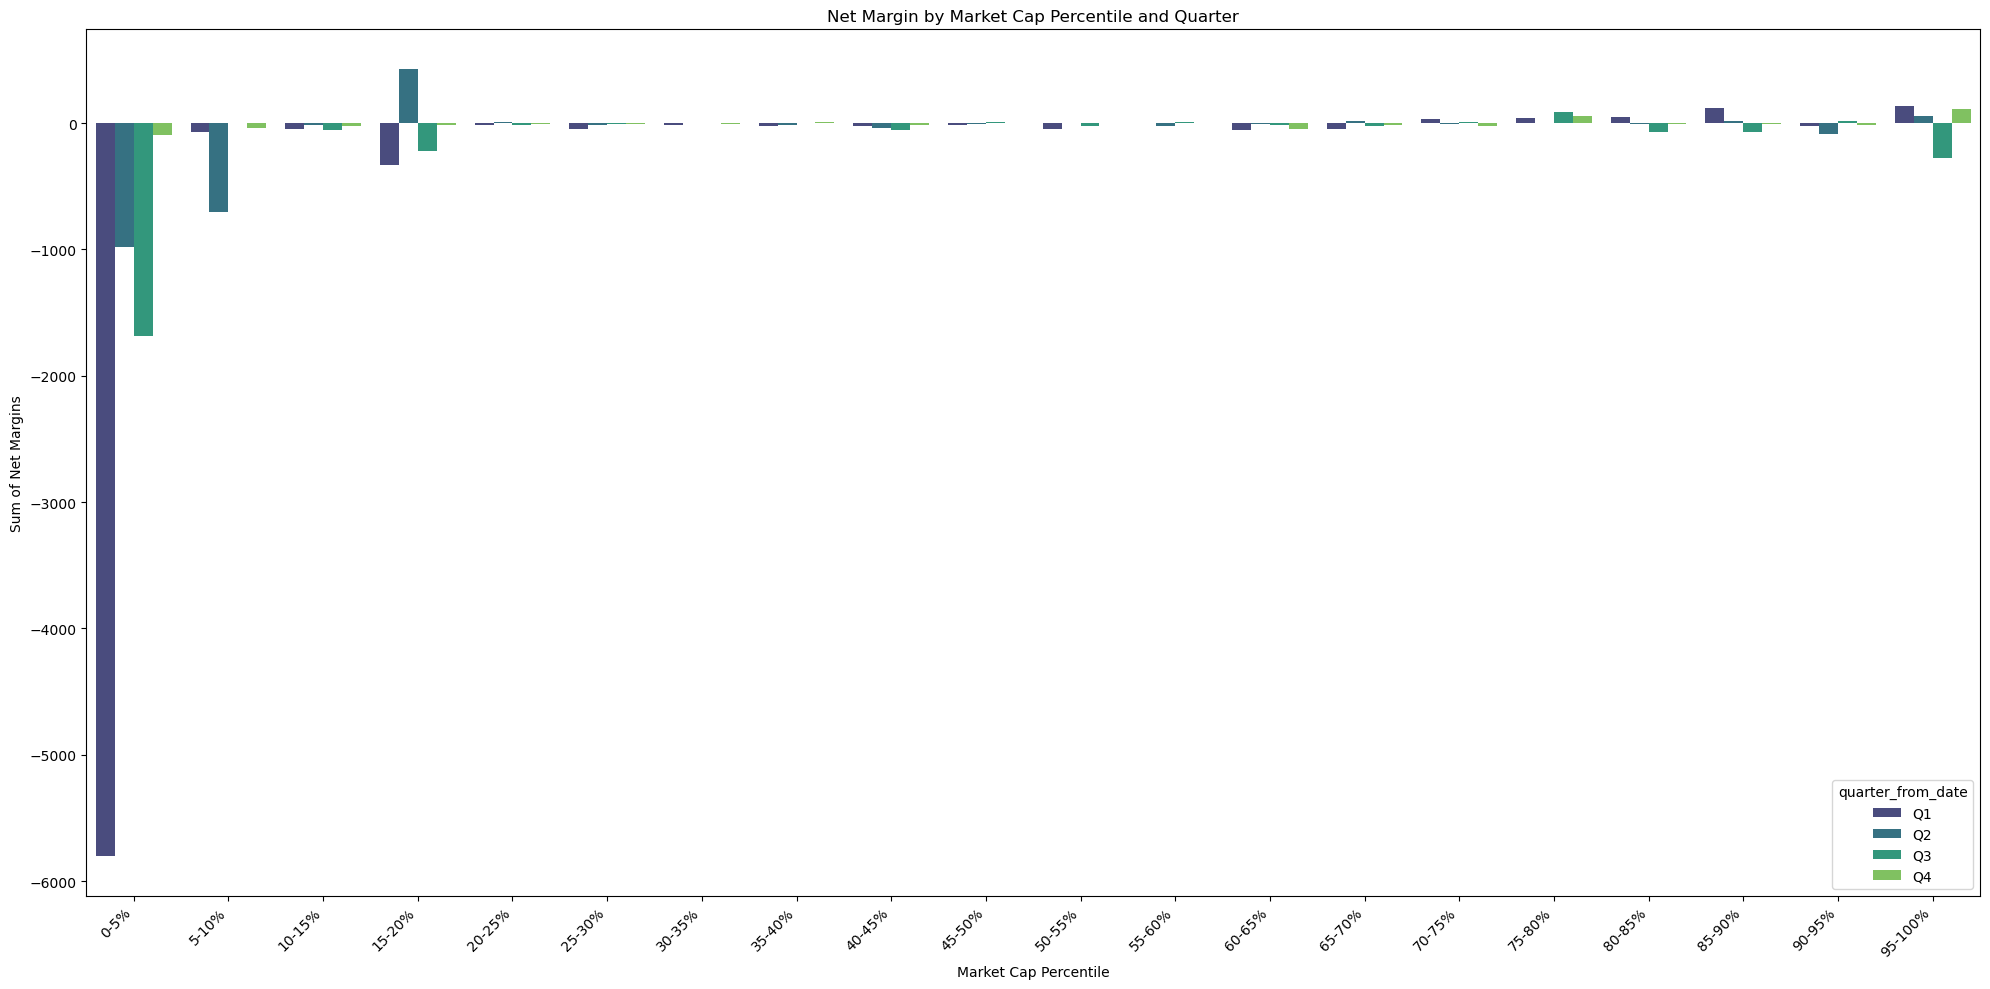

In [26]:
print("Quarter distribution in the data:")
print(merged_df['quarter_from_date'].value_counts())

def convert_market_cap(value):
    value = str(value).replace('$', '').strip()
    if value.endswith('B'):
        return float(value[:-1]) * 1e9
    elif value.endswith('M'):
        return float(value[:-1]) * 1e6
    elif value.endswith('T'):
        return float(value[:-1]) * 1e12
    else:
        return float(value)

merged_df['marketCap_numeric'] = merged_df['marketCap'].apply(convert_market_cap)

median_mcap = merged_df.groupby('ticker')['marketCap_numeric'].median()
percentile_labels = [f'{i*5}-{(i+1)*5}%' for i in range(20)]
mcap_bins = pd.qcut(median_mcap, q=20, labels=percentile_labels)

merged_df['marketCap_percentile'] = merged_df['ticker'].map(mcap_bins)

grouped_data = merged_df.groupby(['marketCap_percentile', 'quarter_from_date'])['net_margin'].sum().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(data=grouped_data, 
           x='marketCap_percentile', 
           y='net_margin',
           hue='quarter_from_date',
           palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Net Margin by Market Cap Percentile and Quarter')
plt.xlabel('Market Cap Percentile')
plt.ylabel('Sum of Net Margins')

plt.tight_layout()

print("\nNumber of companies in each marketCap percentile by quarter:")
company_counts = merged_df.groupby(['marketCap_percentile', 'quarter_from_date'])['ticker'].nunique().unstack()
print(company_counts)

print("\nSum of net margins in each marketCap percentile by quarter:")
margin_sums = grouped_data.pivot(index='marketCap_percentile', 
                               columns='quarter_from_date', 
                               values='net_margin')
print(margin_sums)

Number of unique sectors: 13
Number of unique industries: 129


Sector: Real Estate

Sum of Net Margins by Quarter:
quarter_from_date                   Q1       Q2       Q3      Q4
industry                                                        
Other Consumer Services       -14.0035  -1.7583   6.3912  7.0975
Real Estate                    -0.8058  -0.0352   0.4419 -0.3878
Real Estate Investment Trusts -19.3010  11.1896 -38.4851 -0.7490

Number of Companies by Quarter:
quarter_from_date                Q1    Q2    Q3    Q4
industry                                             
Other Consumer Services         7.0   8.0   7.0   7.0
Real Estate                     1.0   1.0   1.0   1.0
Real Estate Investment Trusts  15.0  15.0  15.0  15.0

Mean Net Margins by Quarter:
quarter_from_date                  Q1      Q2      Q3      Q4
industry                                                     
Other Consumer Services       -2.0005 -0.2198  0.9130  1.0139
Real Estate                   -0.8058 -0

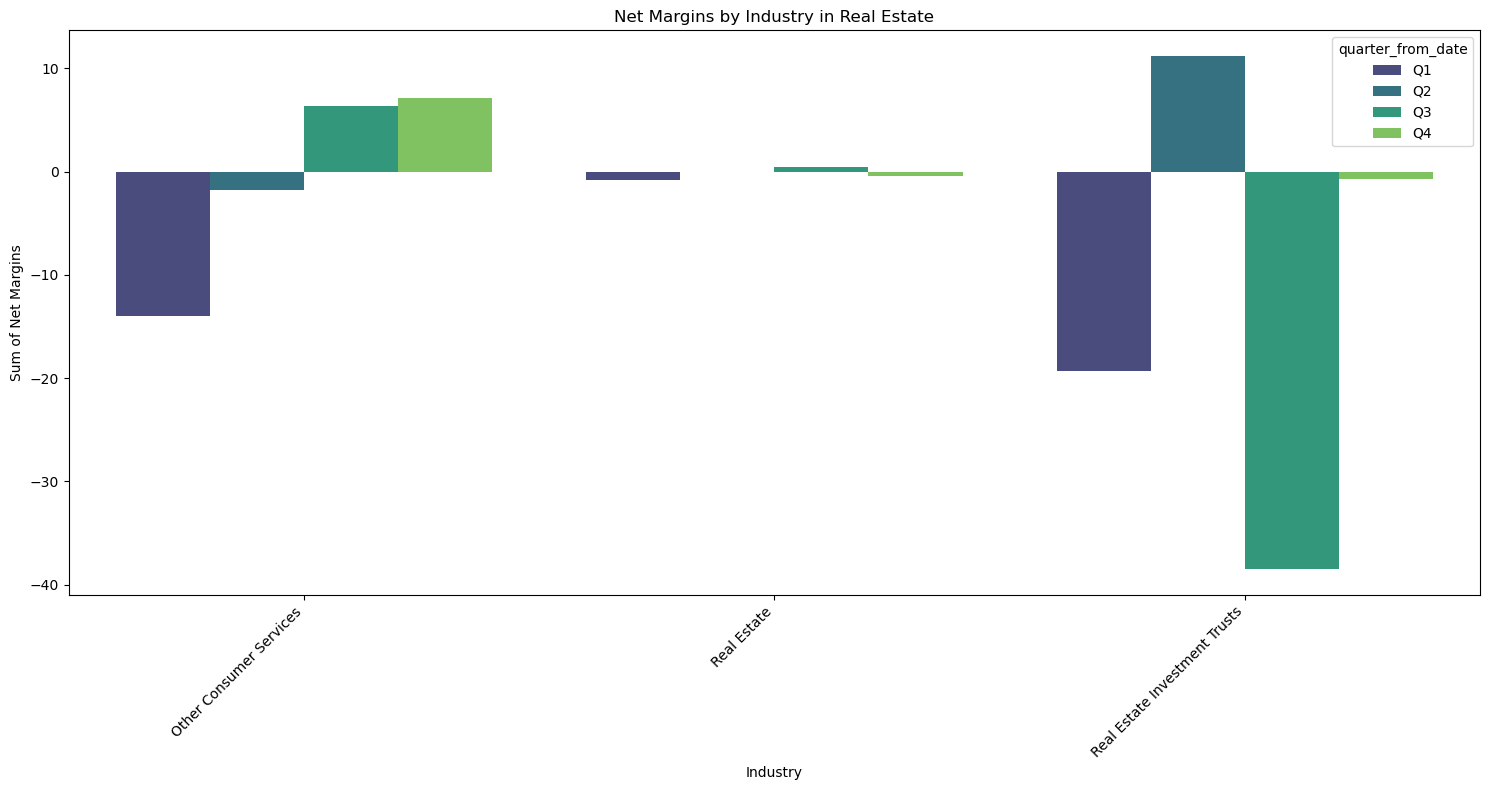

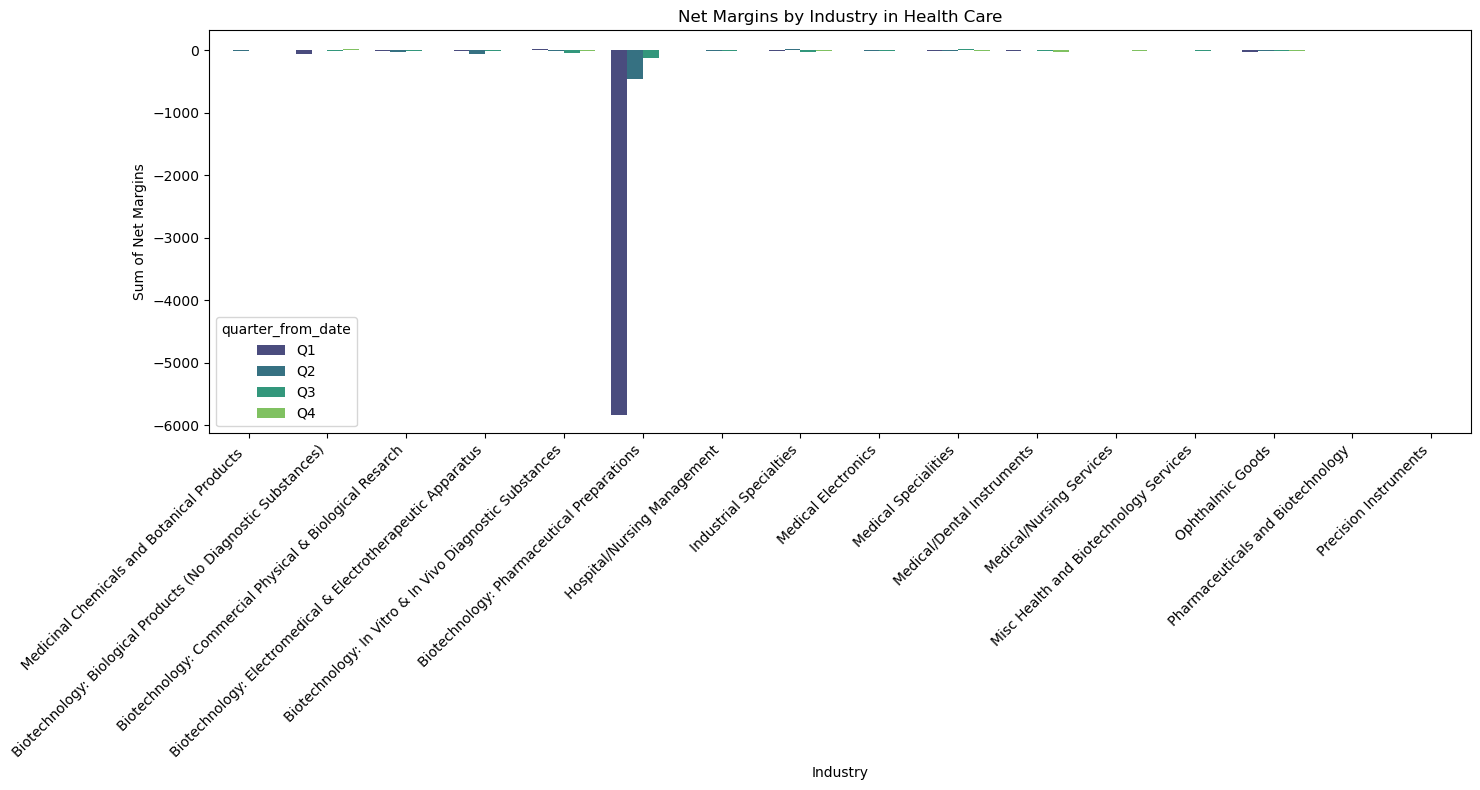

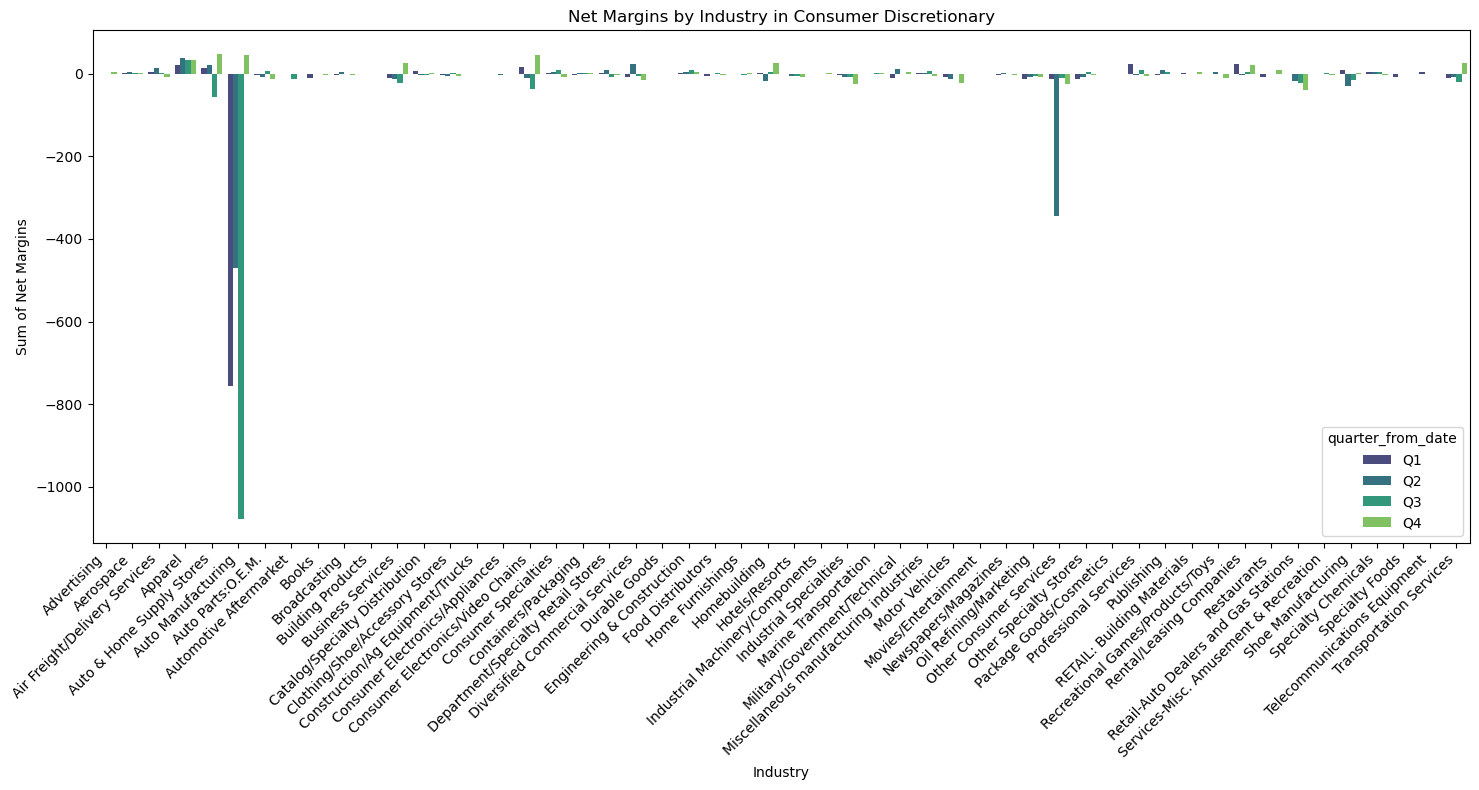

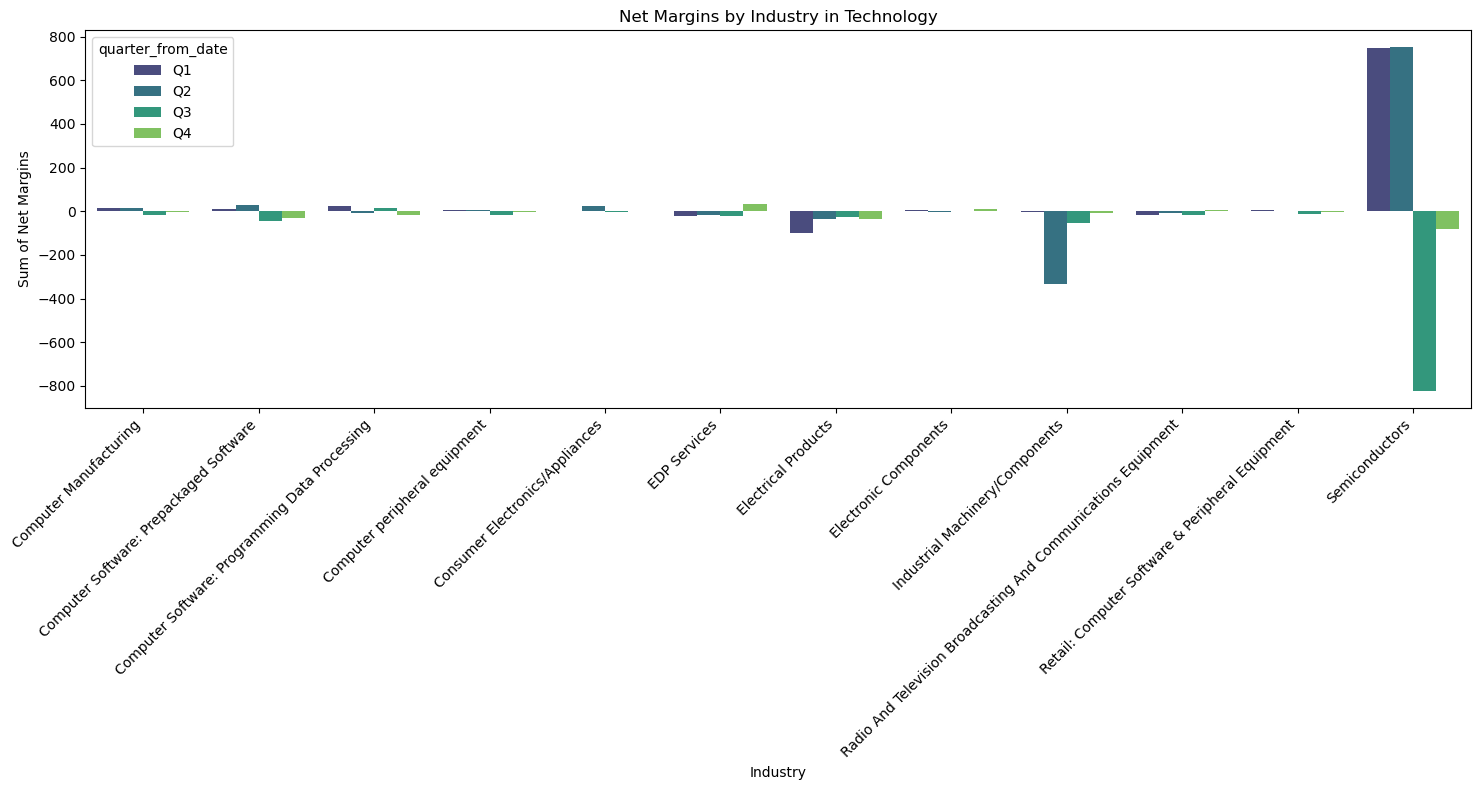

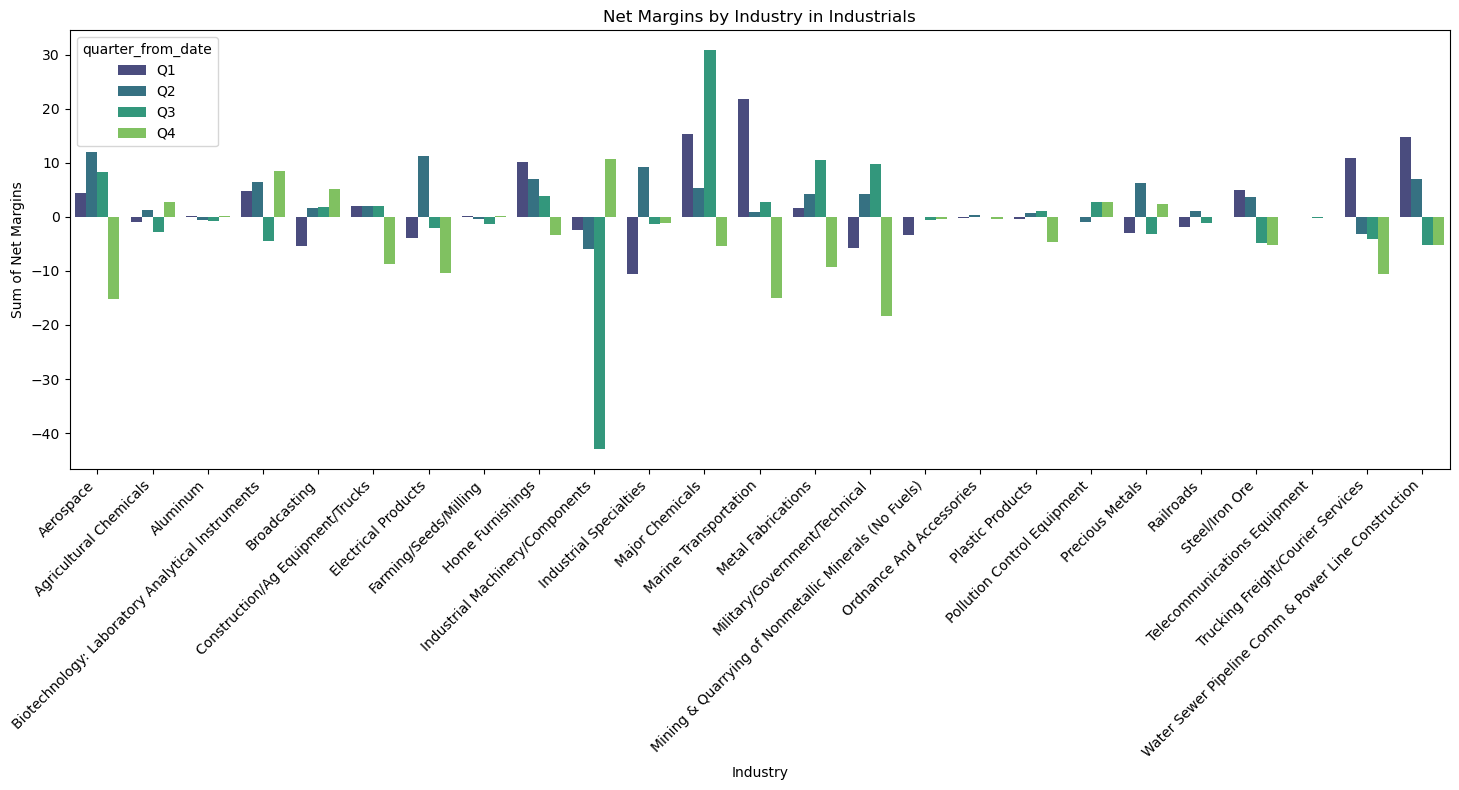

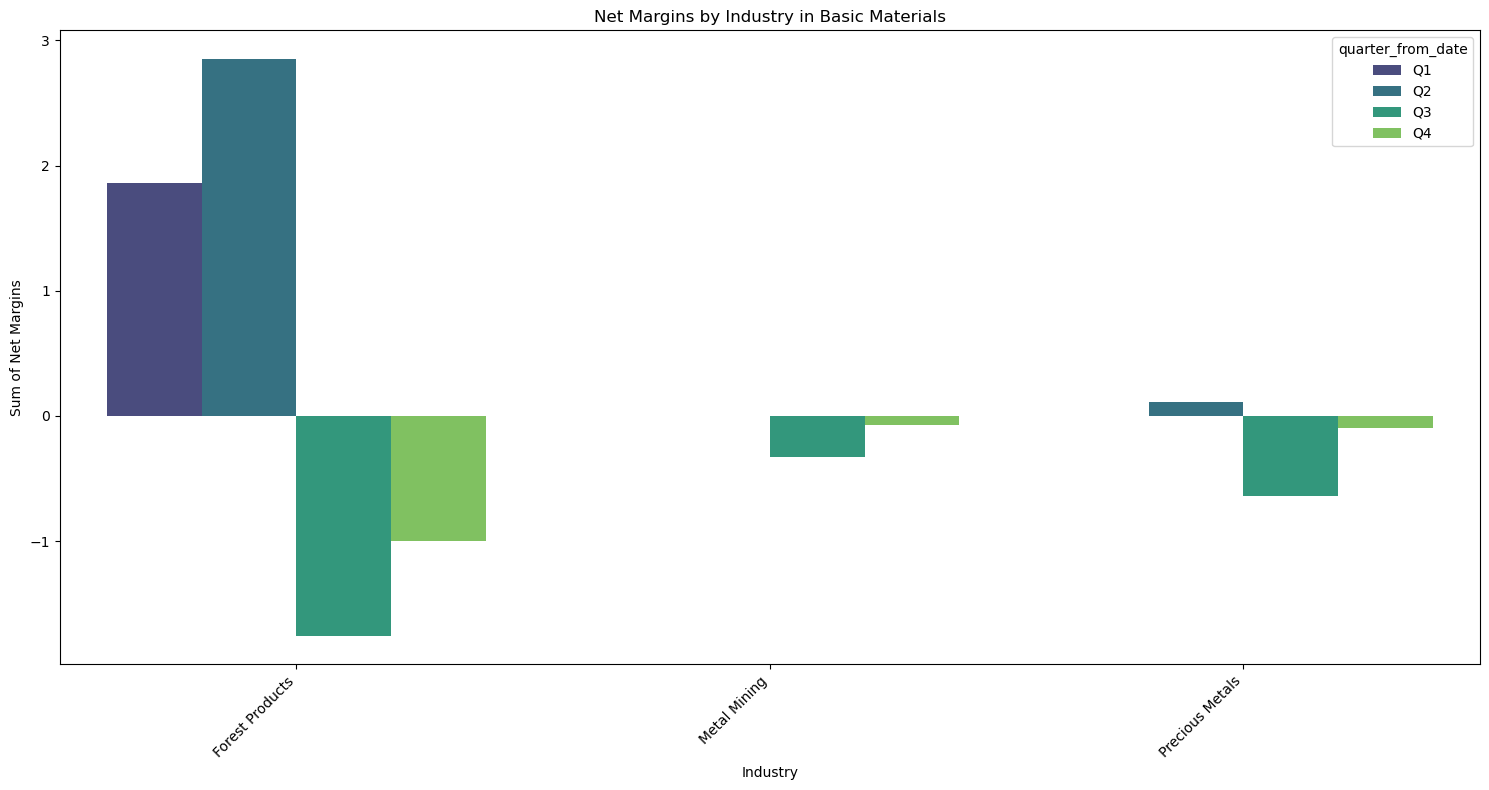

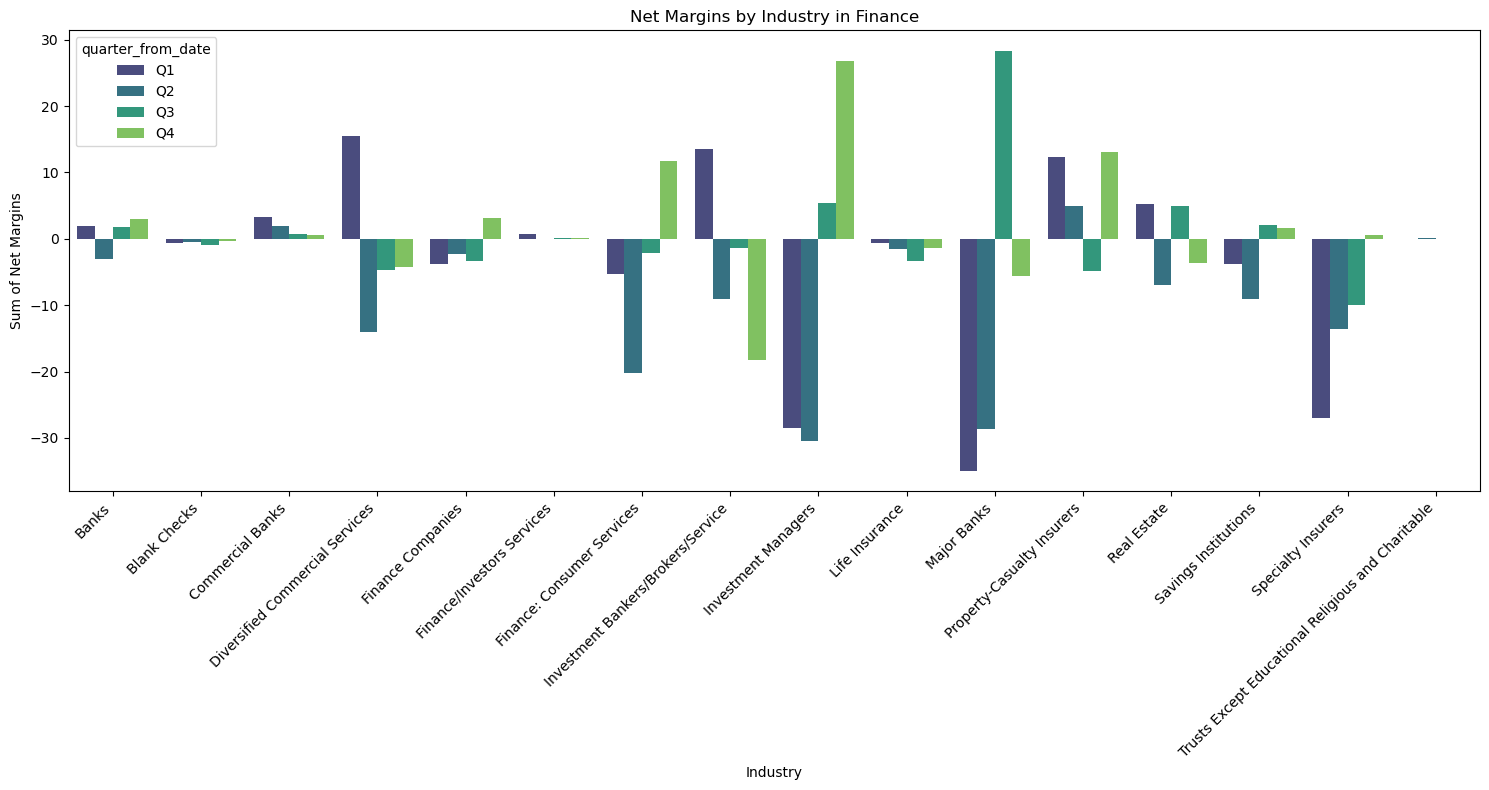

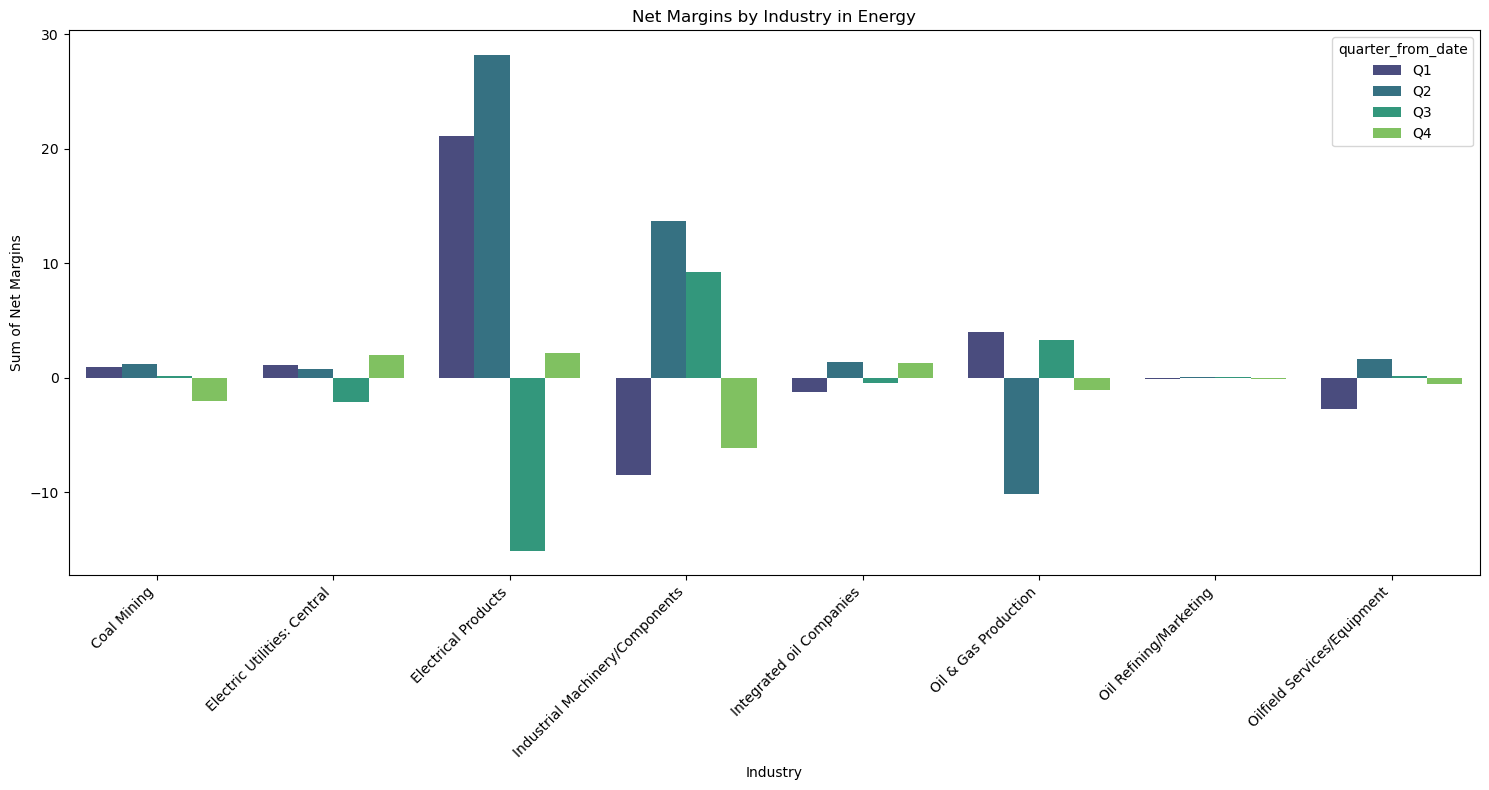

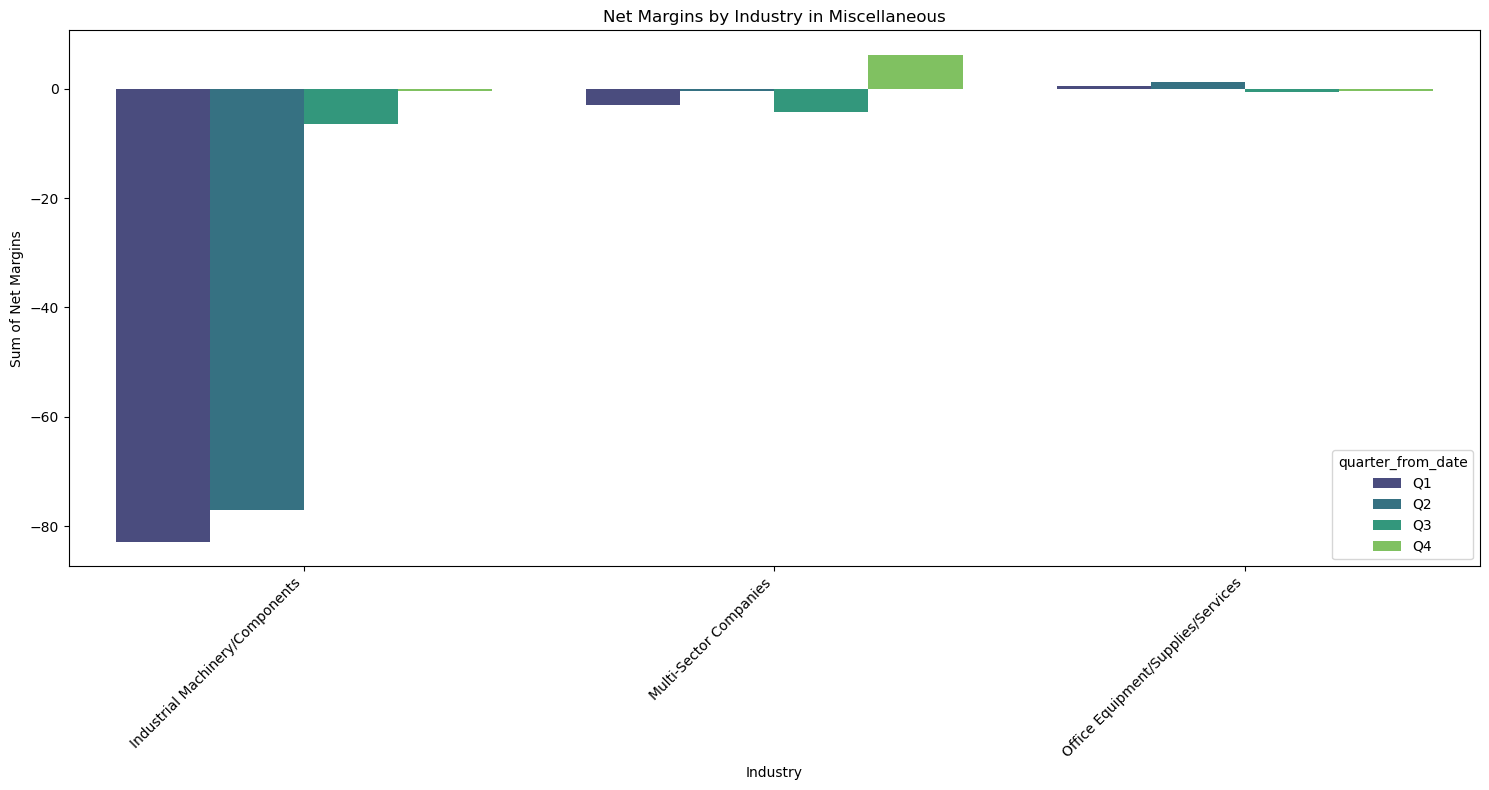

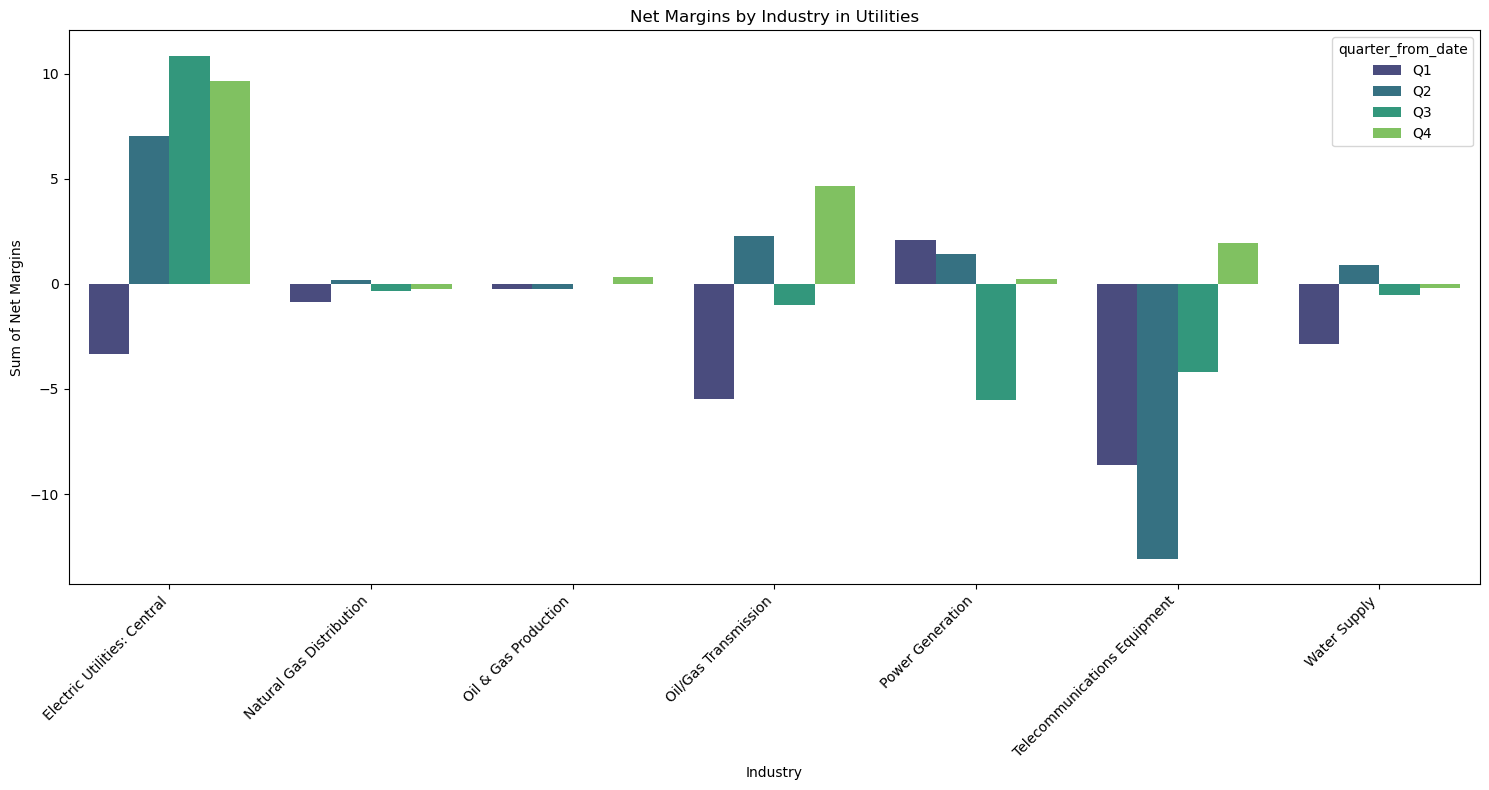

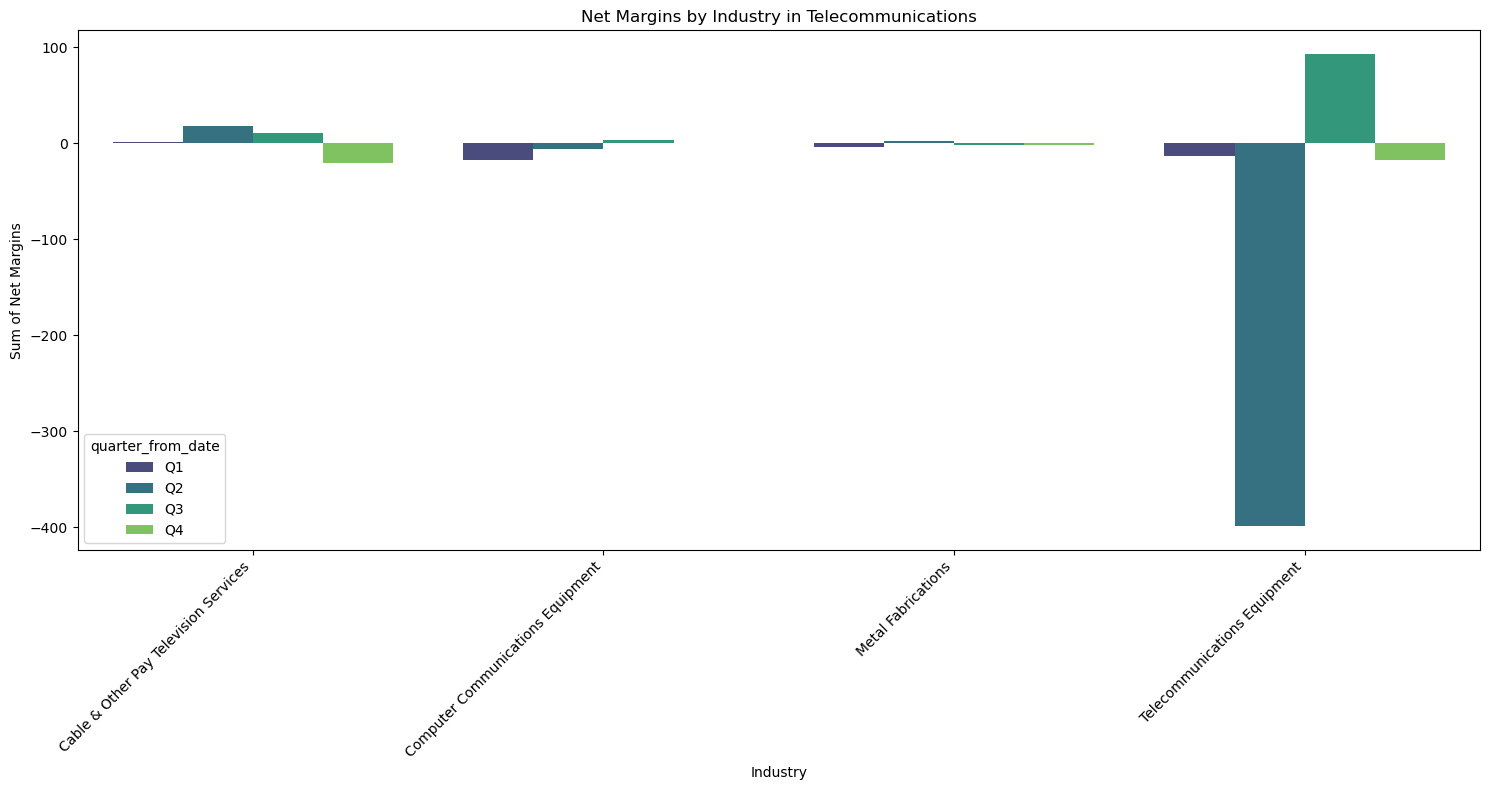

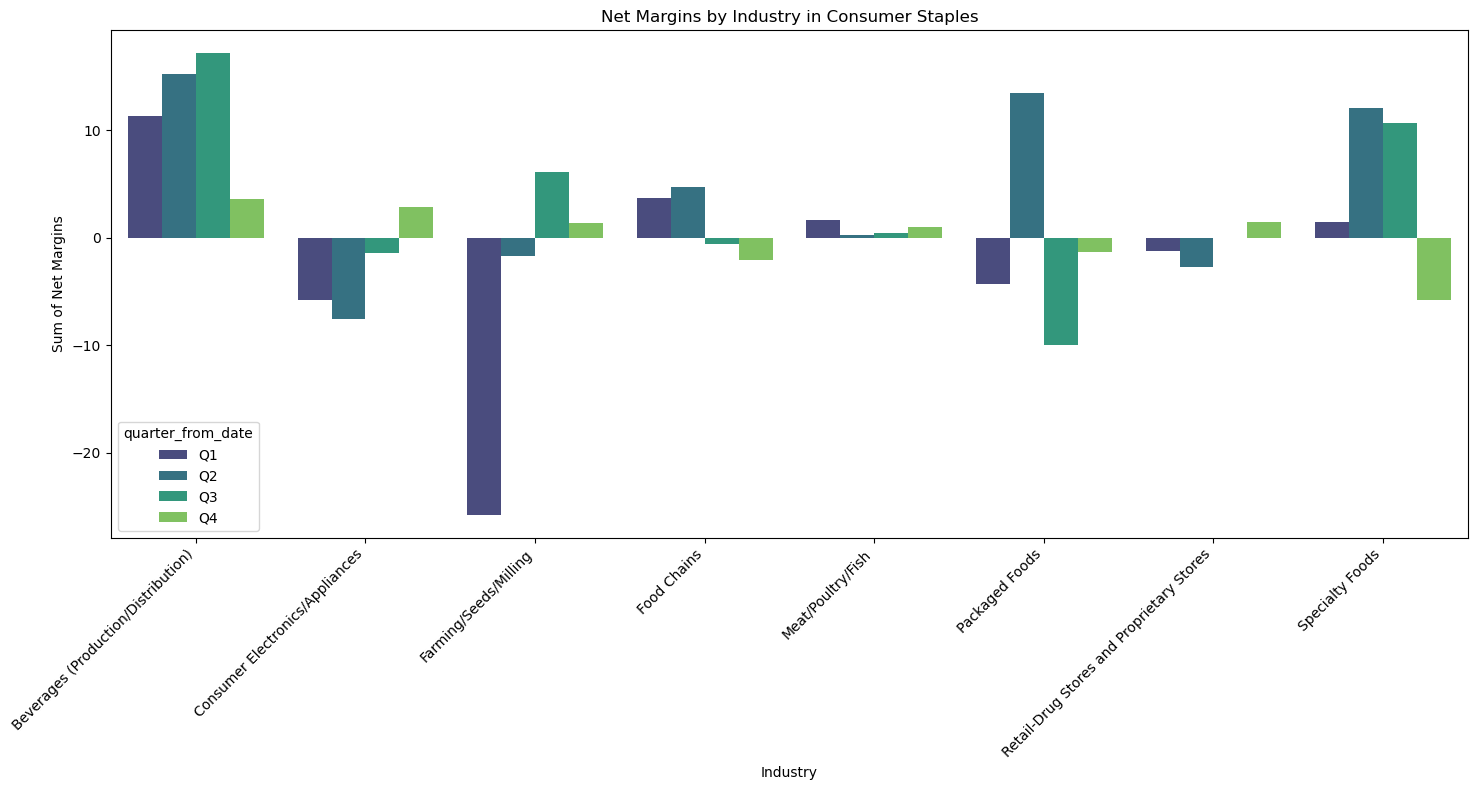

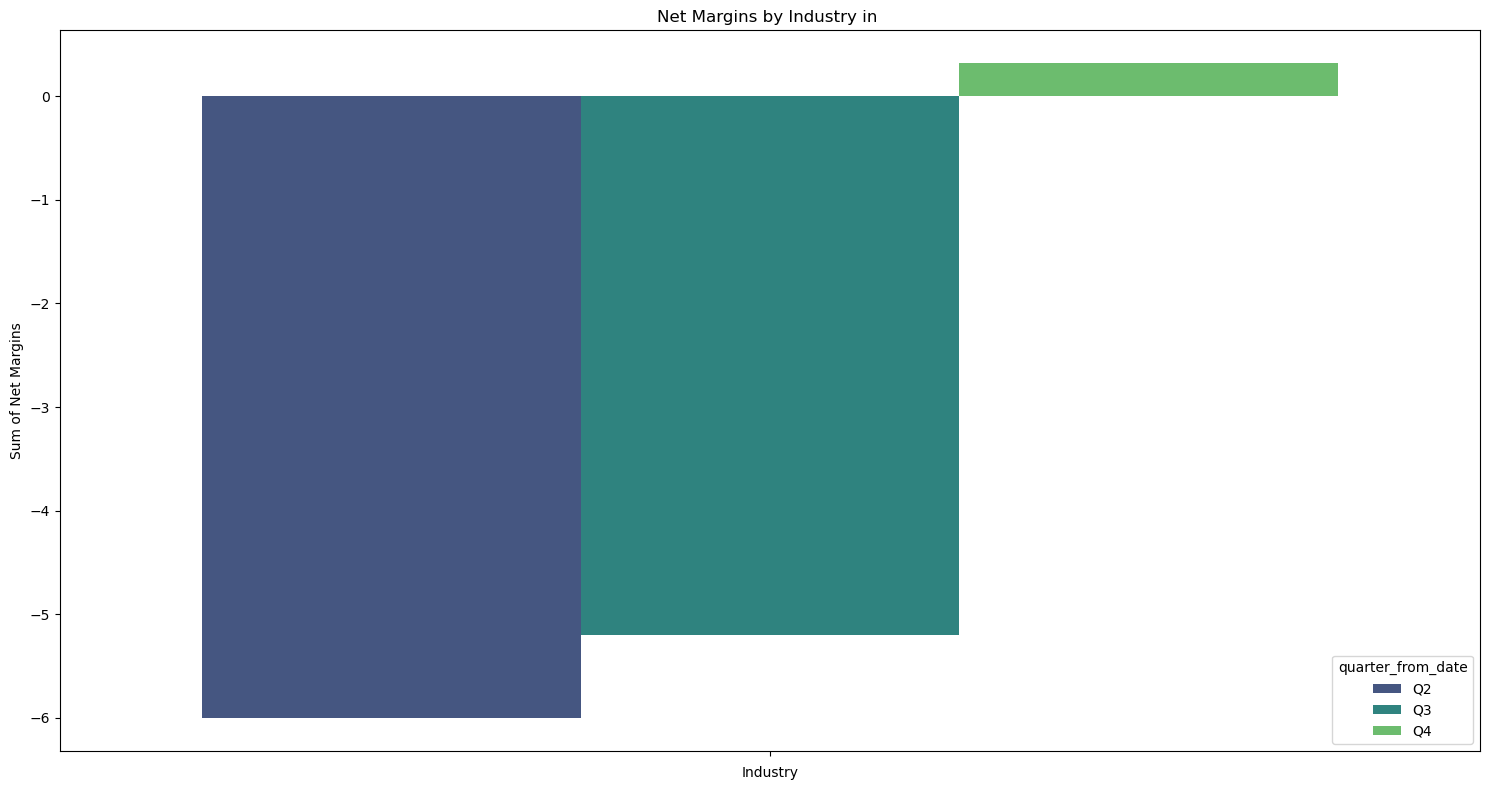

In [27]:
print("Number of unique sectors:", merged_df['sector'].nunique())
print("Number of unique industries:", merged_df['industry'].nunique())

sector_industry_margins = merged_df.groupby(
    ['sector', 'industry', 'quarter_from_date'])['net_margin'].agg(['sum', 'count', 'mean']).round(4)

sector_industry_margins = sector_industry_margins.reset_index()

sum_margins = sector_industry_margins.pivot_table(
    index=['sector', 'industry'],
    columns='quarter_from_date',
    values='sum'
).round(4)

company_counts = sector_industry_margins.pivot_table(
    index=['sector', 'industry'],
    columns='quarter_from_date',
    values='count'
).round(4)

mean_margins = sector_industry_margins.pivot_table(
    index=['sector', 'industry'],
    columns='quarter_from_date',
    values='mean'
).round(4)

for sector in merged_df['sector'].unique():
    print(f"\n{'='*80}")
    print(f"\nSector: {sector}")
    print(f"{'='*80}")
    
    sector_industries = merged_df[merged_df['sector'] == sector]['industry'].unique()
    
    print("\nSum of Net Margins by Quarter:")
    print(sum_margins.loc[sector])
    
    print("\nNumber of Companies by Quarter:")
    print(company_counts.loc[sector])
    
    print("\nMean Net Margins by Quarter:")
    print(mean_margins.loc[sector])
    
    plt.figure(figsize=(15, 8))
    sector_data = sector_industry_margins[sector_industry_margins['sector'] == sector]
    
    sns.barplot(data=sector_data,
               x='industry',
               y='sum',
               hue='quarter_from_date',
               palette='viridis')
    
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Net Margins by Industry in {sector}')
    plt.xlabel('Industry')
    plt.ylabel('Sum of Net Margins')
    plt.tight_layout()

print("\nSector-Level Summary:")
sector_summary = merged_df.groupby(['sector', 'quarter_from_date'])['net_margin'].agg([
    'mean', 'sum', 'count', 'std'
]).round(4)

print("\nSector-Level Summary Statistics:")
print(sector_summary)